1. age = age in years
2. sex = (1 = male, 0 = female)
3. cp = chest pain type (0 - 3)
4. trestbps = 静息血压 resting blood pressure
5. chol = 血清胆固醇 serum cholestoral
6. fbs = 空腹血糖 fasting blood sugar (1 = true, 0 = false)
7. restecg = 静电心电图 resting electrocardiographic (0 - 2)
8. thalach = 最大心率 maximum heart rate achieved
9. exang = 运动诱发心绞痛 exercise induced angina (1 = true, 0 = false)
10. oldpeak = 运动引起的ST段抑制 ST depression induced by exercise relative to rest
11. slope = 峰值运动ST段斜率 the slope of the peak exercise ST segment (0 - 2)
12. ca = 主要血管数量 number of major vessels colored by flourosopy (0 - 4)
13. thal = 地中海贫血类型 (0 = no, 1 = normal, 2 = fixed defect, 3 = reversable defect)
14. target = 是否患有心脏病 (1 = Yes, 0 = No)

**Stage 1: EDA**

**Understanding the characteristics of original dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/HeartAssign2.csv')

rows, columns = df.shape
print(f"Dataset shape: {rows} rows × {columns} columns")

df.head()

Dataset shape: 1027 rows × 14 columns


age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0001    1   0       125  212.0  0.0      1.0    168.0      0      1.0   
1  53.0002    1   0       140  203.0  1.0      0.0    155.0      1      3.1   
2  70.0003    1   0       145  174.0  0.0      1.0    125.0      1      2.6   
3  61.0004    1   0       148  203.0  0.0      1.0    161.0      0      0.0   
4  62.0005    0   0       138  294.0  1.0      1.0    106.0      0      1.9   

   slope  ca  thal  target  
0      2   2     3     0.0  
1      0   0     3     0.0  
2      0   0     3     0.0  
3      2   1     3     0.0  
4      1   3     2     0.0

In [ ]:
df = pd.read_csv('/content/HeartAssign2.csv')
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 10]
continuous_cols.describe().T

count        mean        std    min    25%       50%       75%  \
age       1025.0   54.468657   9.075495   29.0   48.0   56.0171   61.0521   
trestbps  1027.0  132.247322  27.240879   94.0  120.0  130.0000  140.0000   
chol      1026.0  245.877193  51.514152  126.0  211.0  240.0000  275.0000   
thalach   1026.0  149.798246  29.624565   71.0  132.0  152.0000  166.0000   
oldpeak   1026.0    1.107797   1.781657    0.0    0.0    0.8000    1.8000   

               max  
age        77.0385  
trestbps  800.0000  
chol      564.0000  
thalach   746.0000  
oldpeak    44.0000

In [ ]:
import pandas as pd

df = pd.read_csv('/content/HeartAssign2.csv')

df.info()
print("\n% of missing values per column")
print(df.isnull().sum() / df.shape[0] * 100)
print("\nDetailed missing values (Row numbers): ")
for column in df.columns:
    missing_rows = df[df[column].isnull()].index.tolist()
    if missing_rows:
        raw_numbers = [row + 1 for row in missing_rows]
        print(f"{column} -> Missing Raw Numbers: {raw_numbers}, Total: {len(raw_numbers)}")

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])

all_duplicates = df[df.duplicated(keep=False)]
print("\nAll Duplicated rows: \n")
print(all_duplicates.sort_values(df.columns.tolist()))

numeric_cols = df.select_dtypes(include=['int64', 'float64'])
print("\nContinuous columns: ")
print(numeric_cols.loc[:, numeric_cols.nunique() > 10].nunique())
print("\nCategorical columns: ")
print(numeric_cols.loc[:, numeric_cols.nunique() <= 10].nunique())

#Create new features
df['cardiac_load'] = df['trestbps'] * df['age'] / (df['thalach'] + 1e-6)
df['st_angina_index'] = df['oldpeak'] * (df['exang'] + 1)
bins = [20, 40, 55, 65, 100]
labels = ['1', '2', '3', '4']
df['age_risk'] = pd.cut(df['age'], bins=bins, labels=labels)

#Arrange the new features
original_cols = [col for col in df.columns if col not in ['cardiac_load', 'st_angina_index', 'age_risk', 'target']]
df = df[original_cols + ['cardiac_load', 'st_angina_index', 'age_risk', 'target']]

#Save to a new file
df.to_csv('/content/HeartAssign2_more_features.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1027 non-null   int64  
 2   cp        1027 non-null   int64  
 3   trestbps  1027 non-null   int64  
 4   chol      1026 non-null   float64
 5   fbs       1026 non-null   float64
 6   restecg   1026 non-null   float64
 7   thalach   1026 non-null   float64
 8   exang     1027 non-null   int64  
 9   oldpeak   1026 non-null   float64
 10  slope     1027 non-null   int64  
 11  ca        1027 non-null   int64  
 12  thal      1027 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 112.5 KB

% of missing values per column
age         0.194742
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.097371
fbs         0.097371
restecg     0.097371
thalach     0.097371
exang       0.000

In [ ]:
continuous_cols.corr()

age  trestbps      chol   thalach   oldpeak
age       1.000000  0.181538  0.221443 -0.286033  0.142407
trestbps  0.181538  1.000000  0.103330 -0.034832  0.657851
chol      0.221443  0.103330  1.000000 -0.023200  0.061900
thalach  -0.286033 -0.034832 -0.023200  1.000000 -0.185106
oldpeak   0.142407  0.657851  0.061900 -0.185106  1.000000

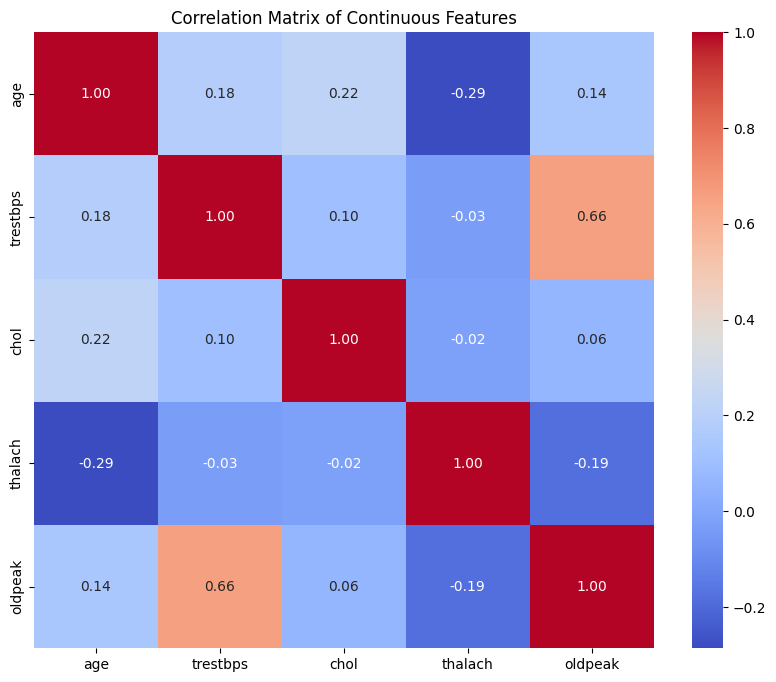

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(continuous_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Continuous Features")
plt.show()

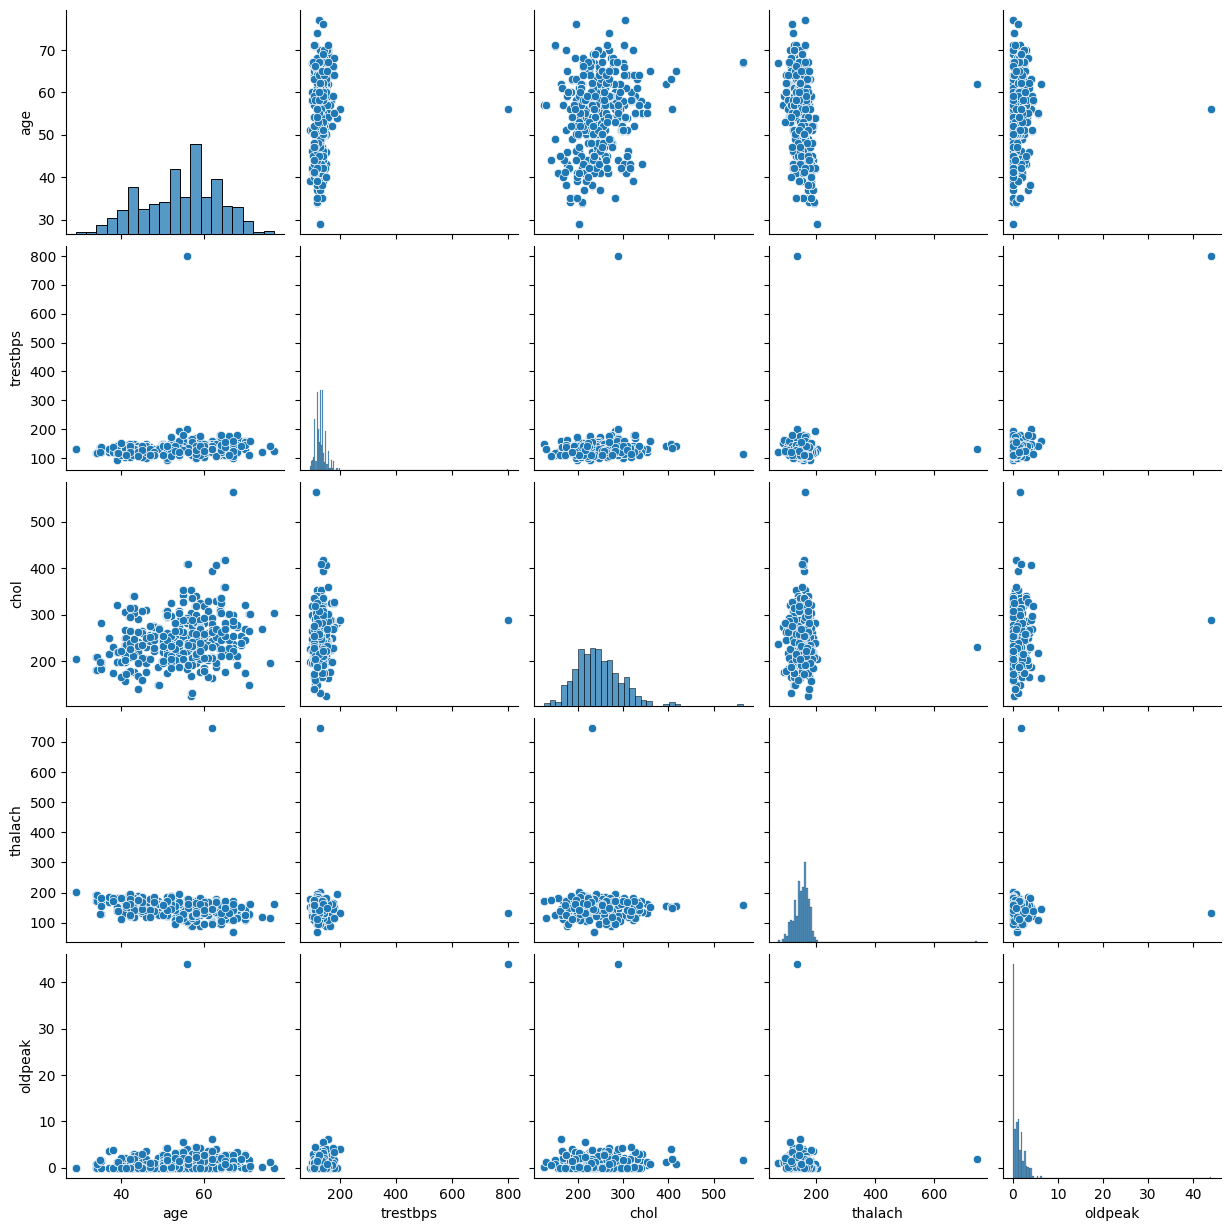

In [ ]:
sns.pairplot(continuous_cols)
plt.show()

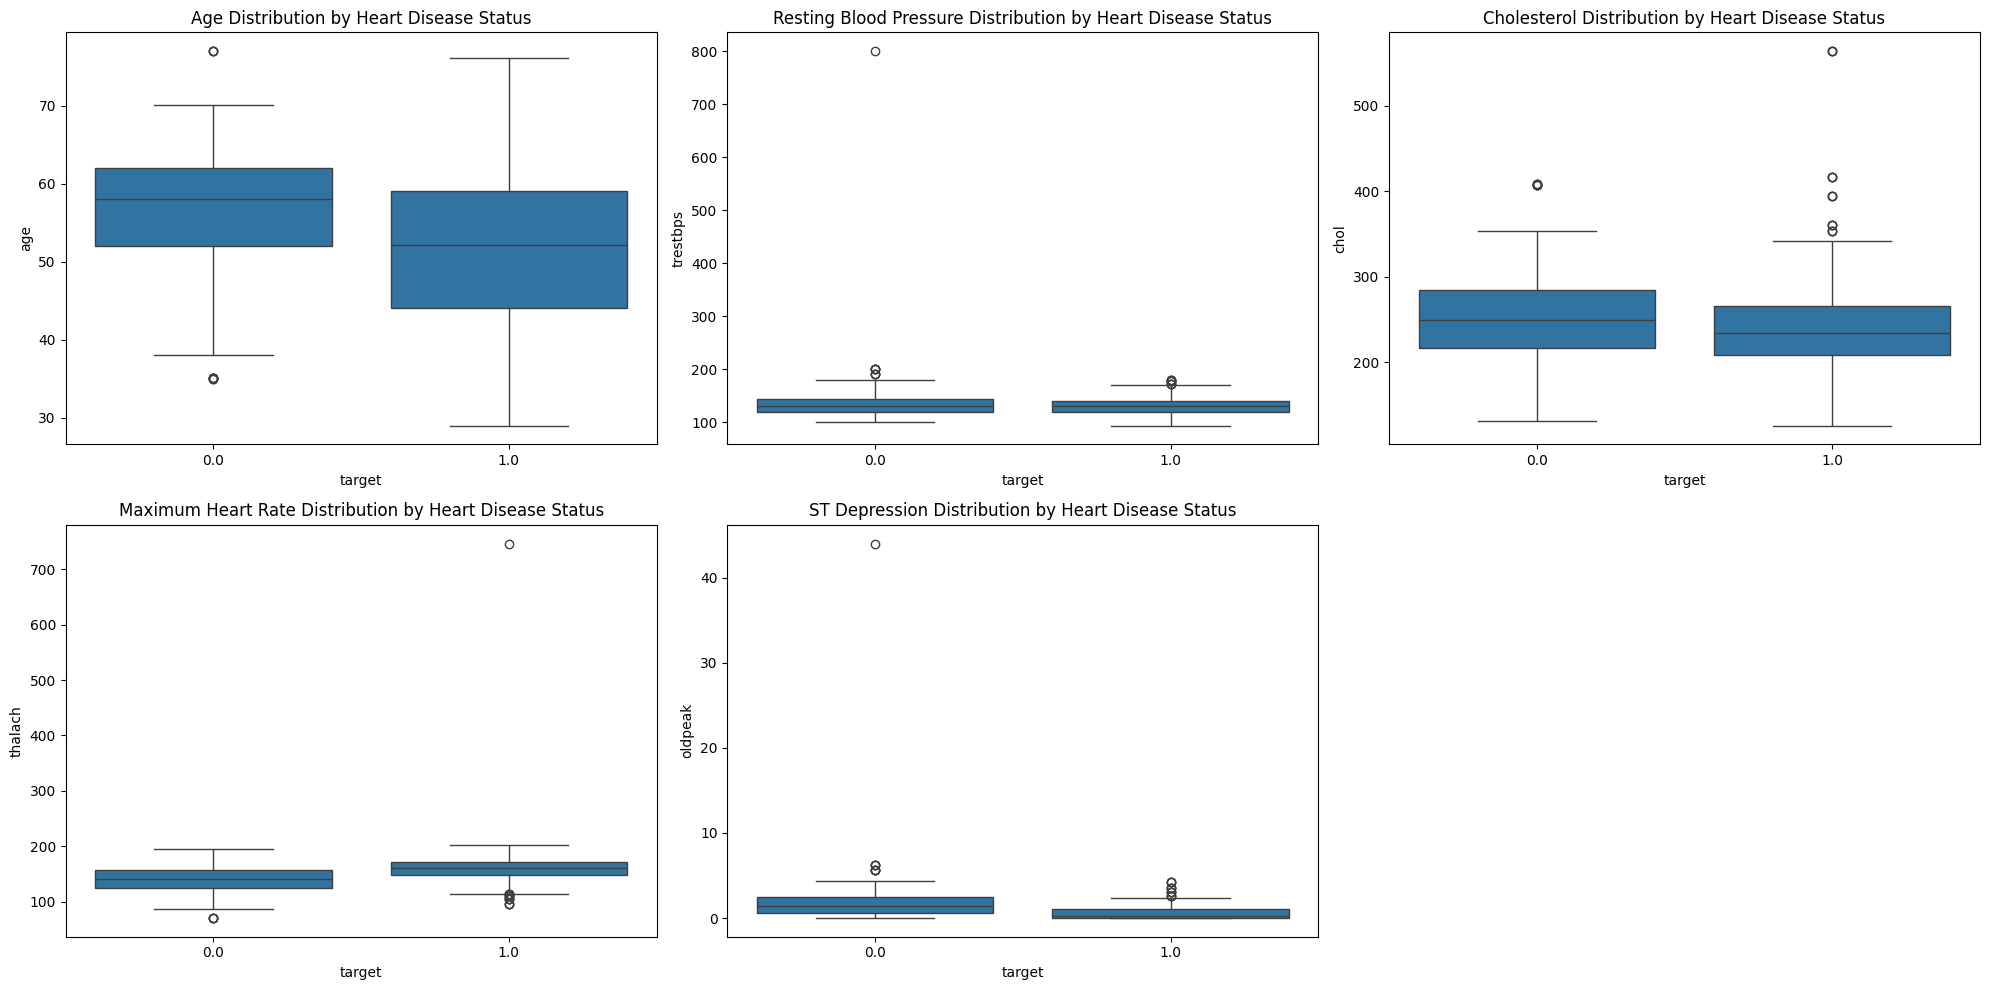

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/HeartAssign2.csv')

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
titles = [
    'Age Distribution by Heart Disease Status',
    'Resting Blood Pressure Distribution by Heart Disease Status',
    'Cholesterol Distribution by Heart Disease Status',
    'Maximum Heart Rate Distribution by Heart Disease Status',
    'ST Depression Distribution by Heart Disease Status'
]

for i, col in enumerate(columns):
    sns.boxplot(x='target', y=col, data=df, ax=axes[i])
    axes[i].set_title(titles[i])

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

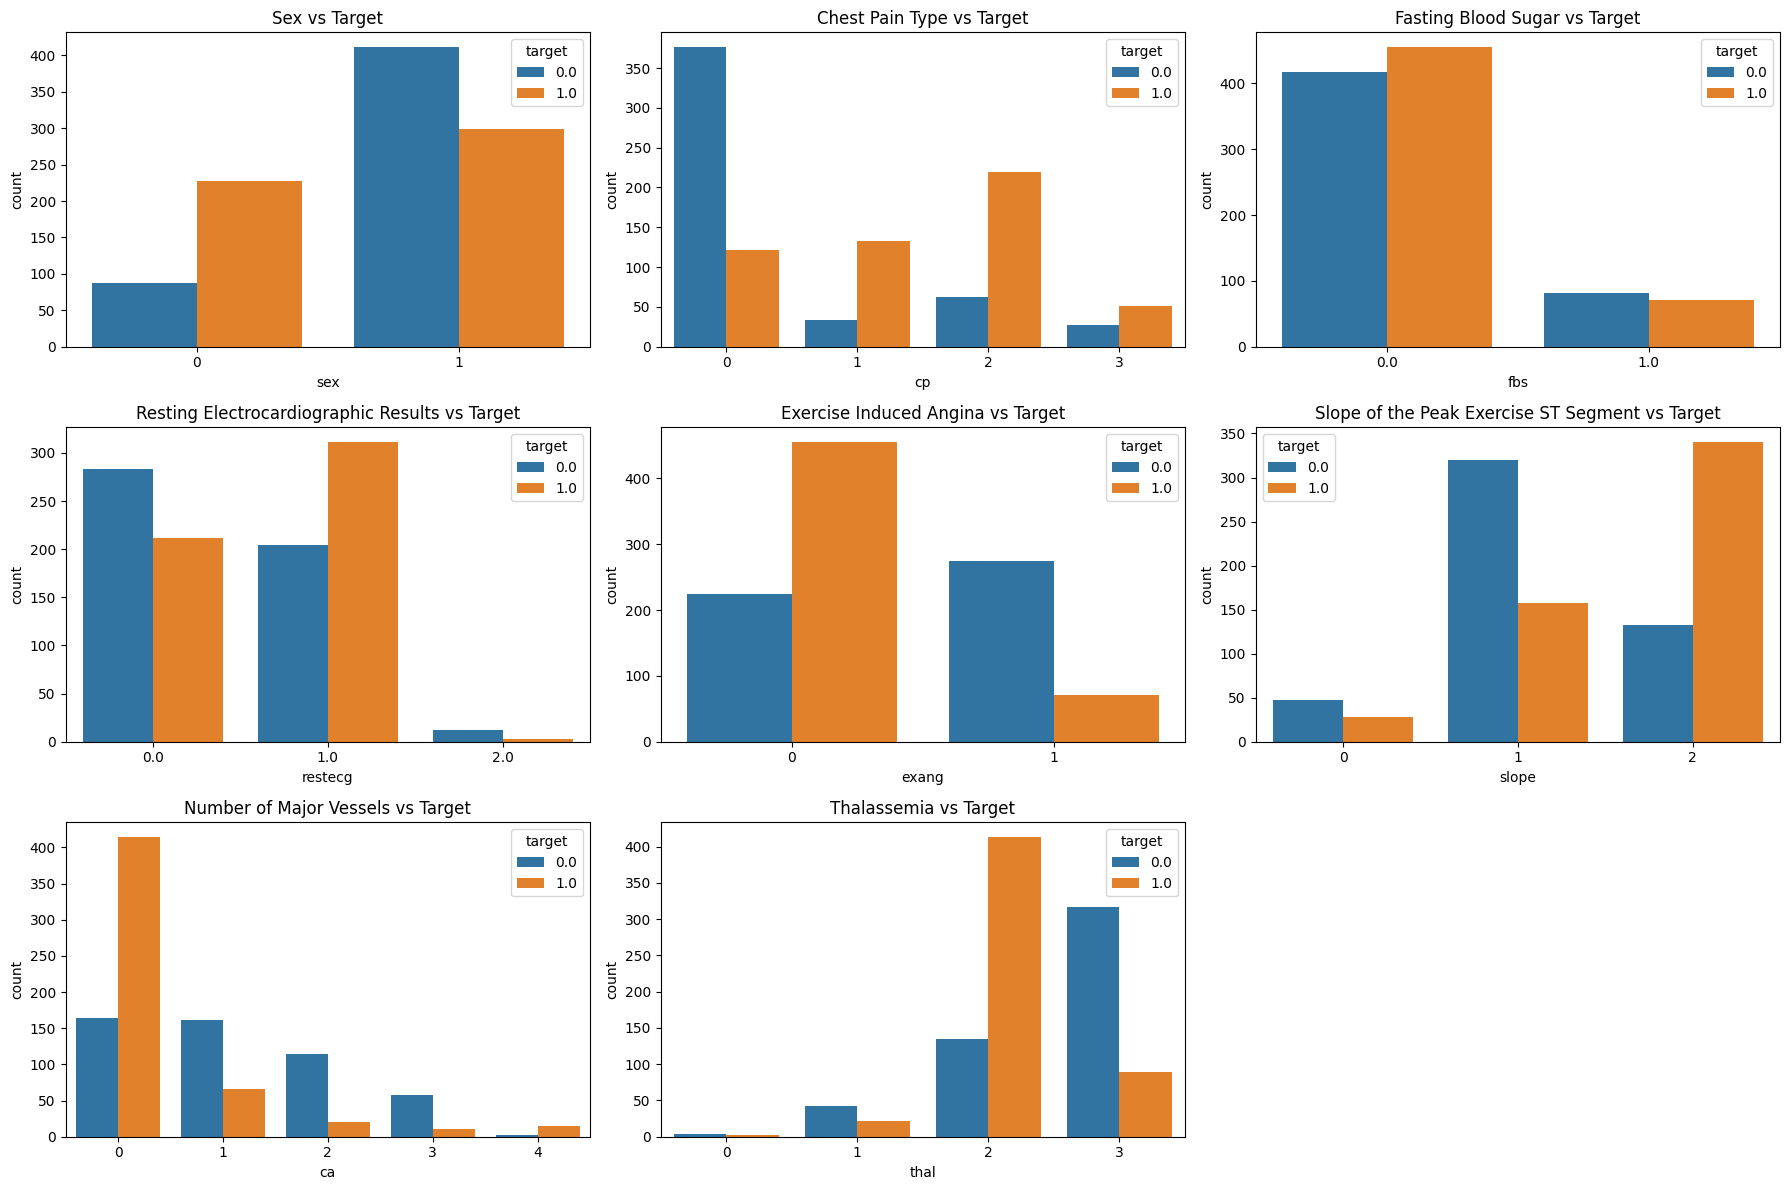

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/HeartAssign2.csv')

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
titles = [
    'Sex vs Target', 'Chest Pain Type vs Target', 'Fasting Blood Sugar vs Target',
    'Resting Electrocardiographic Results vs Target', 'Exercise Induced Angina vs Target',
    'Slope of the Peak Exercise ST Segment vs Target', 'Number of Major Vessels vs Target',
    'Thalassemia vs Target'
]

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='target', data=df, ax=axes[i])
    axes[i].set_title(titles[i])

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


**Base on domain knowledge and existing features, create new features**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/HeartAssign2_more_features.csv')

rows, columns = df.shape
print(f"Dataset shape: {rows} rows × {columns} columns")

df.head()

Dataset shape: 1027 rows × 17 columns


age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0001    1   0       125  212.0  0.0      1.0    168.0      0      1.0   
1  53.0002    1   0       140  203.0  1.0      0.0    155.0      1      3.1   
2  70.0003    1   0       145  174.0  0.0      1.0    125.0      1      2.6   
3  61.0004    1   0       148  203.0  0.0      1.0    161.0      0      0.0   
4  62.0005    0   0       138  294.0  1.0      1.0    106.0      0      1.9   

   slope  ca  thal  cardiac_load  st_angina_index  age_risk  target  
0      2   2     3     38.690550              1.0       2.0     0.0  
1      0   0     3     47.871148              6.2       2.0     0.0  
2      0   0     3     81.200347              5.2       4.0     0.0  
3      2   1     3     56.074902              0.0       3.0     0.0  
4      1   3     2     80.717631              1.9       3.0     0.0

**Understanding the characteristics of new dataset**

age Skewness: -0.25


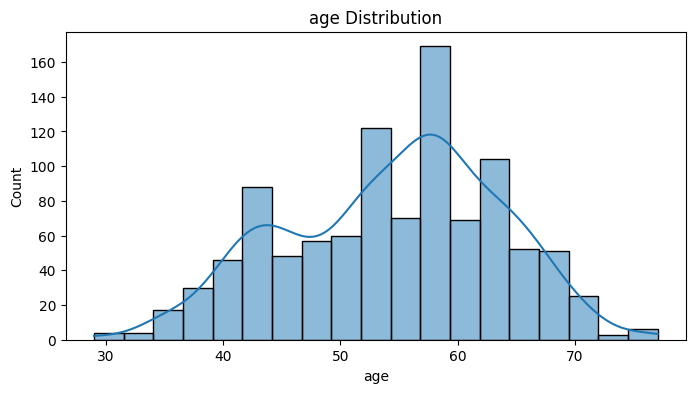

trestbps Skewness: 14.55


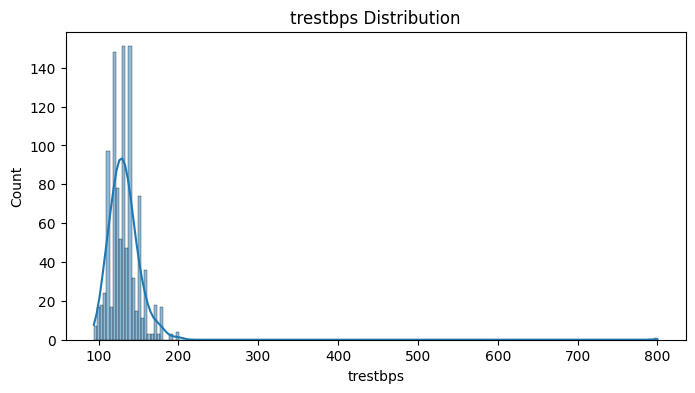

chol Skewness: 1.08


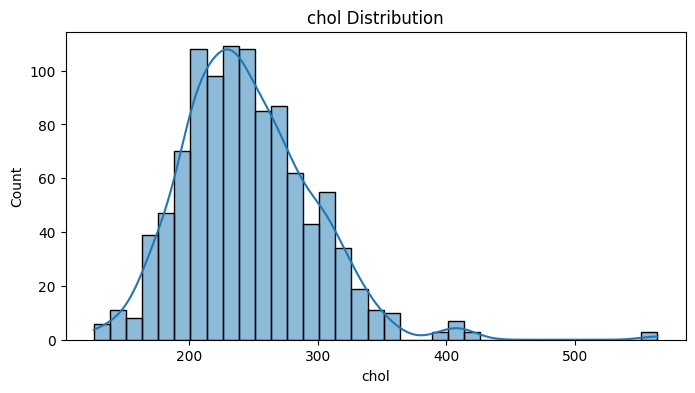

thalach Skewness: 7.69


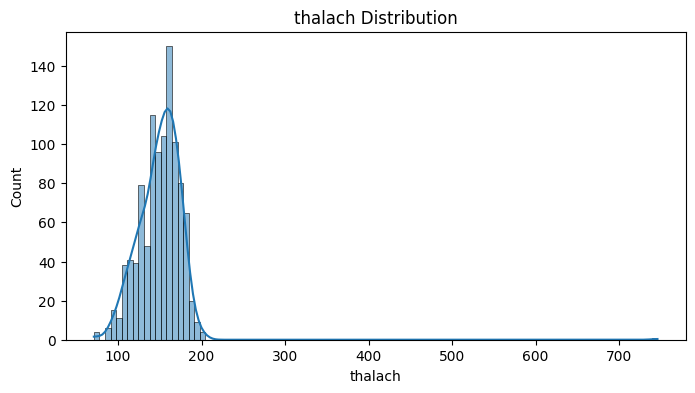

oldpeak Skewness: 13.96


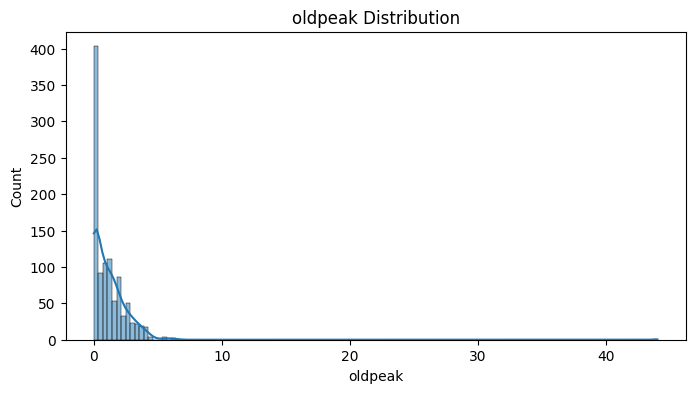

cardiac_load Skewness: 3.80


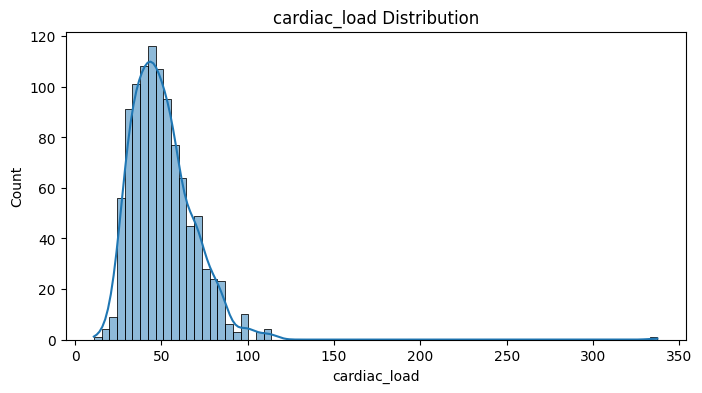

st_angina_index Skewness: 16.83


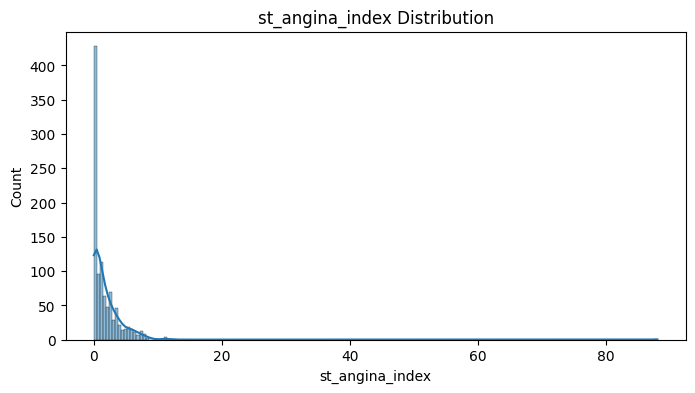

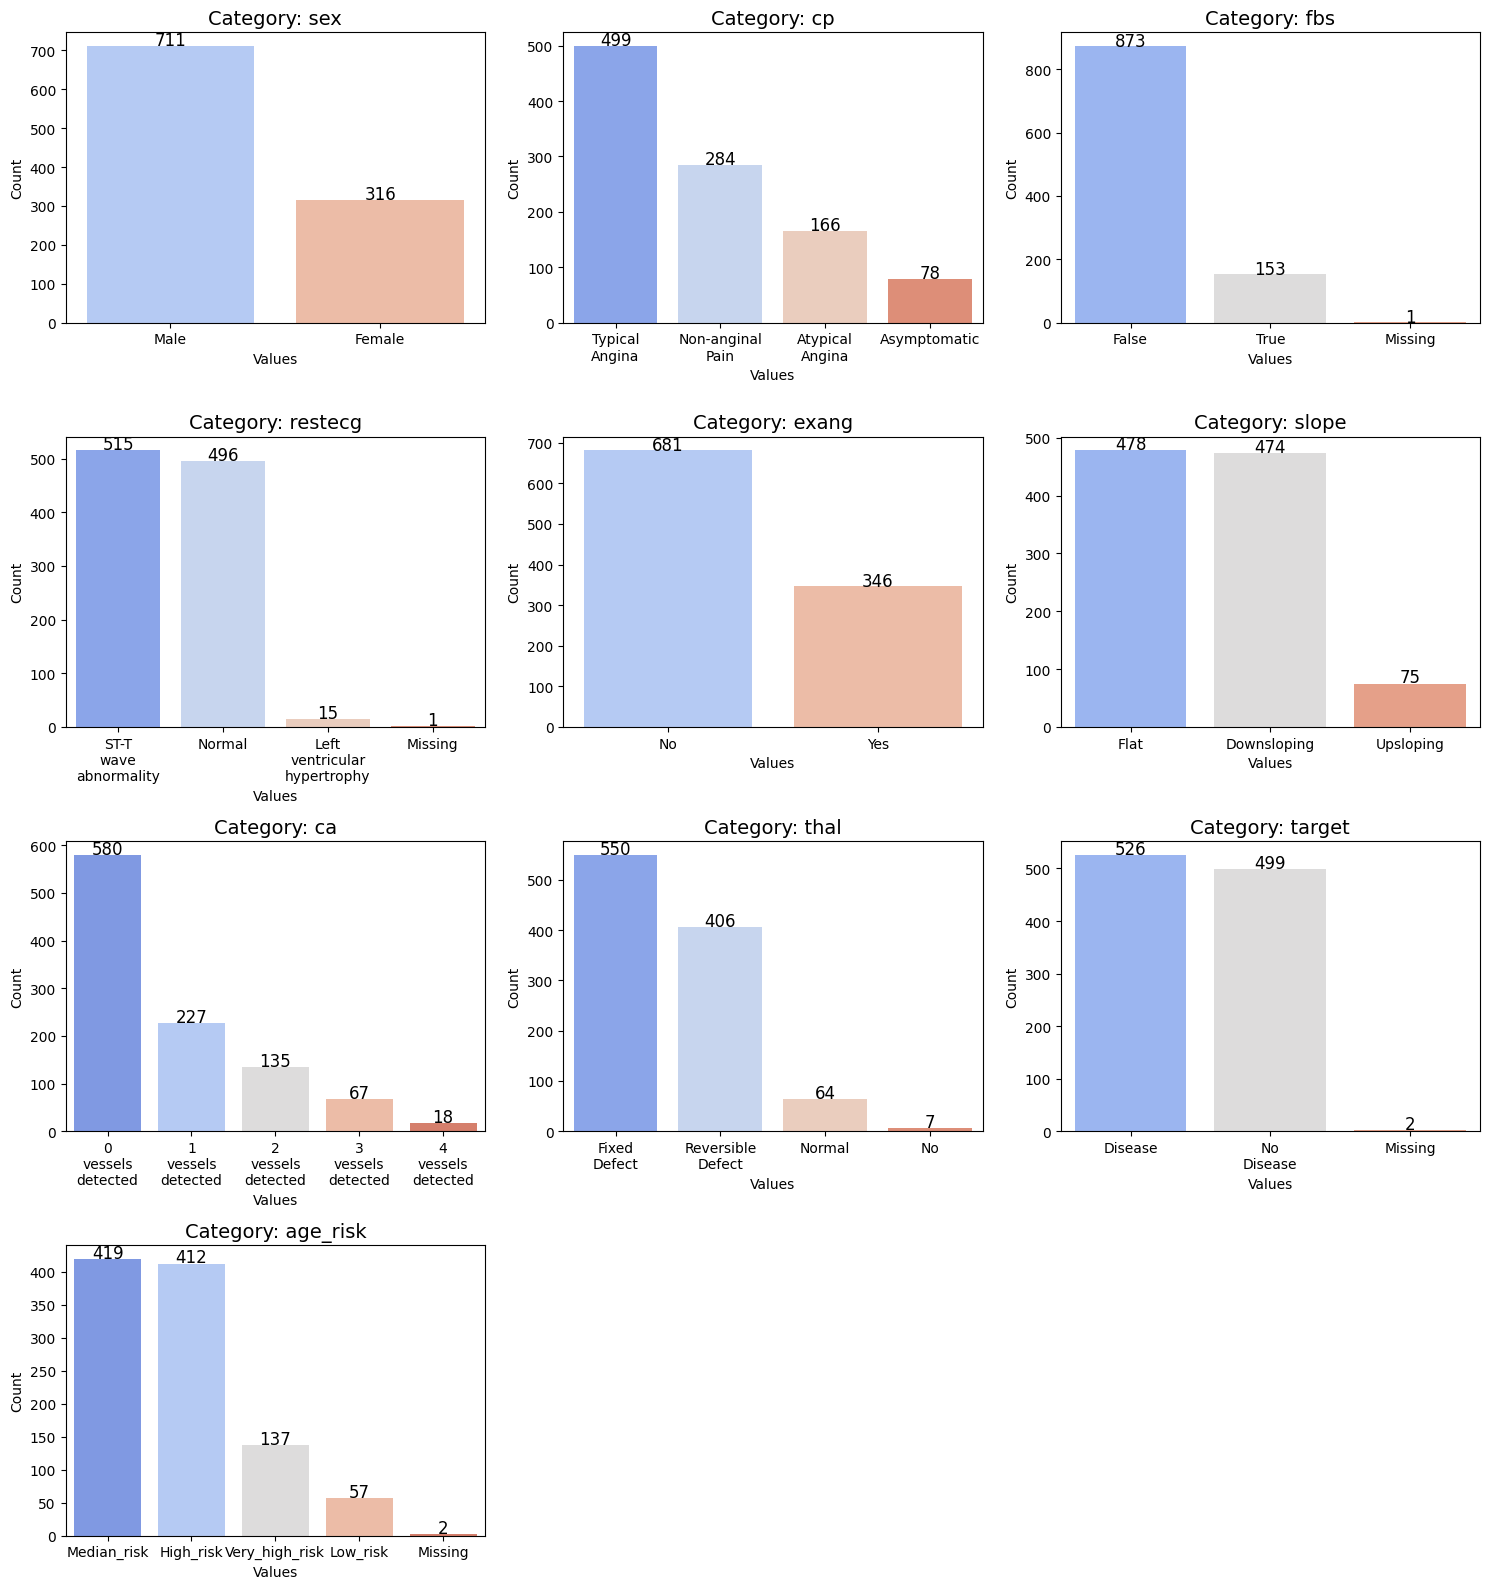

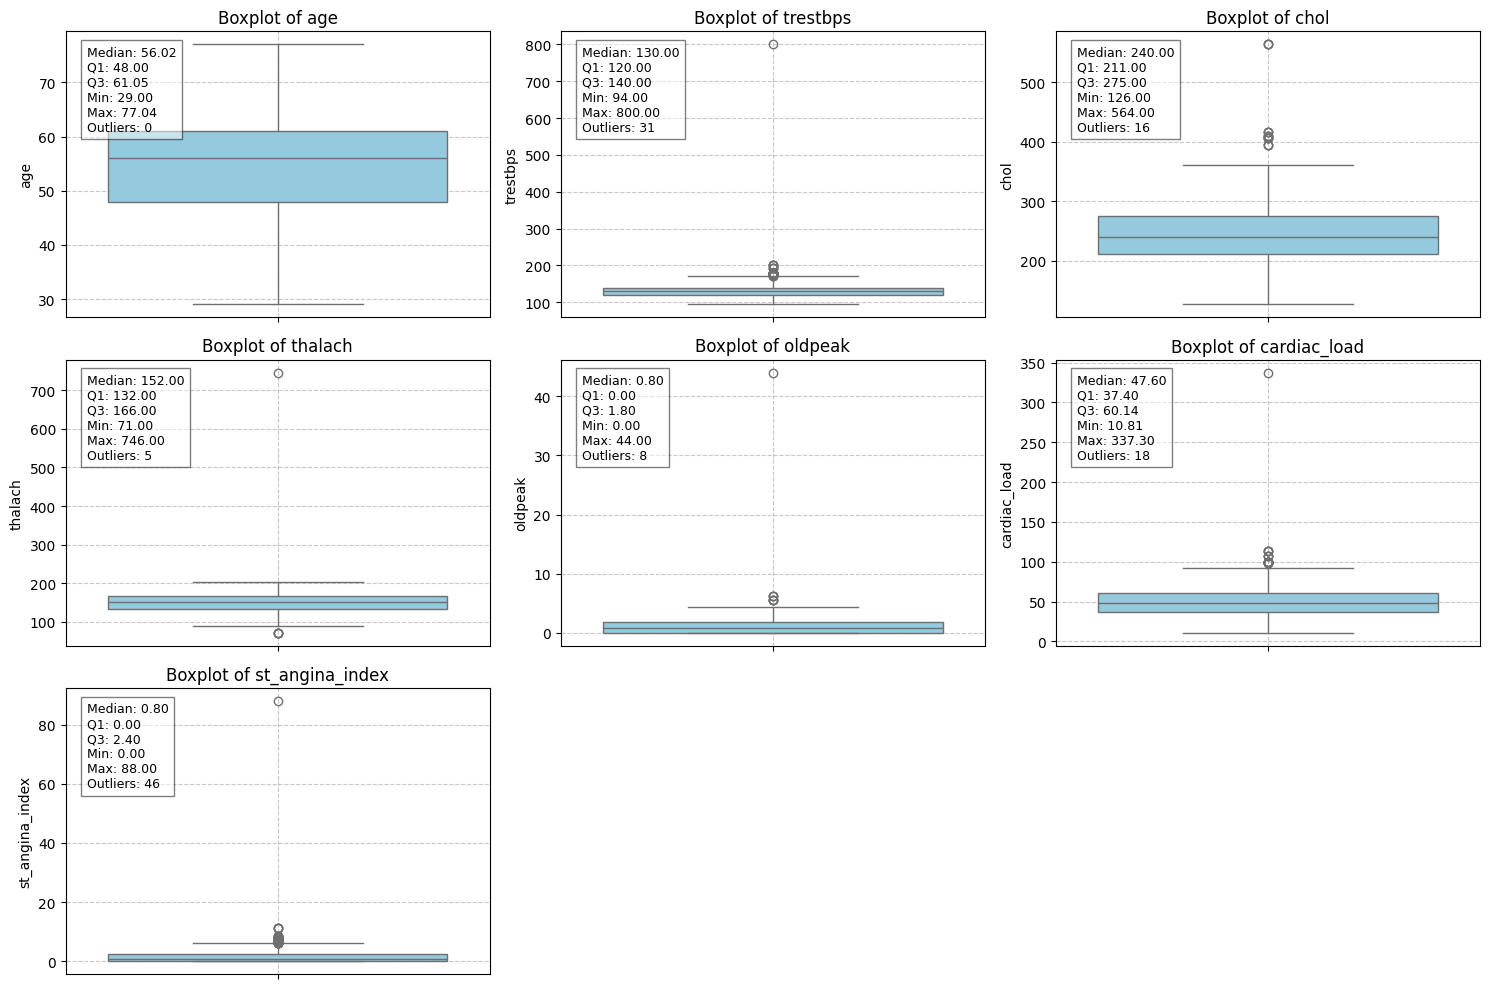

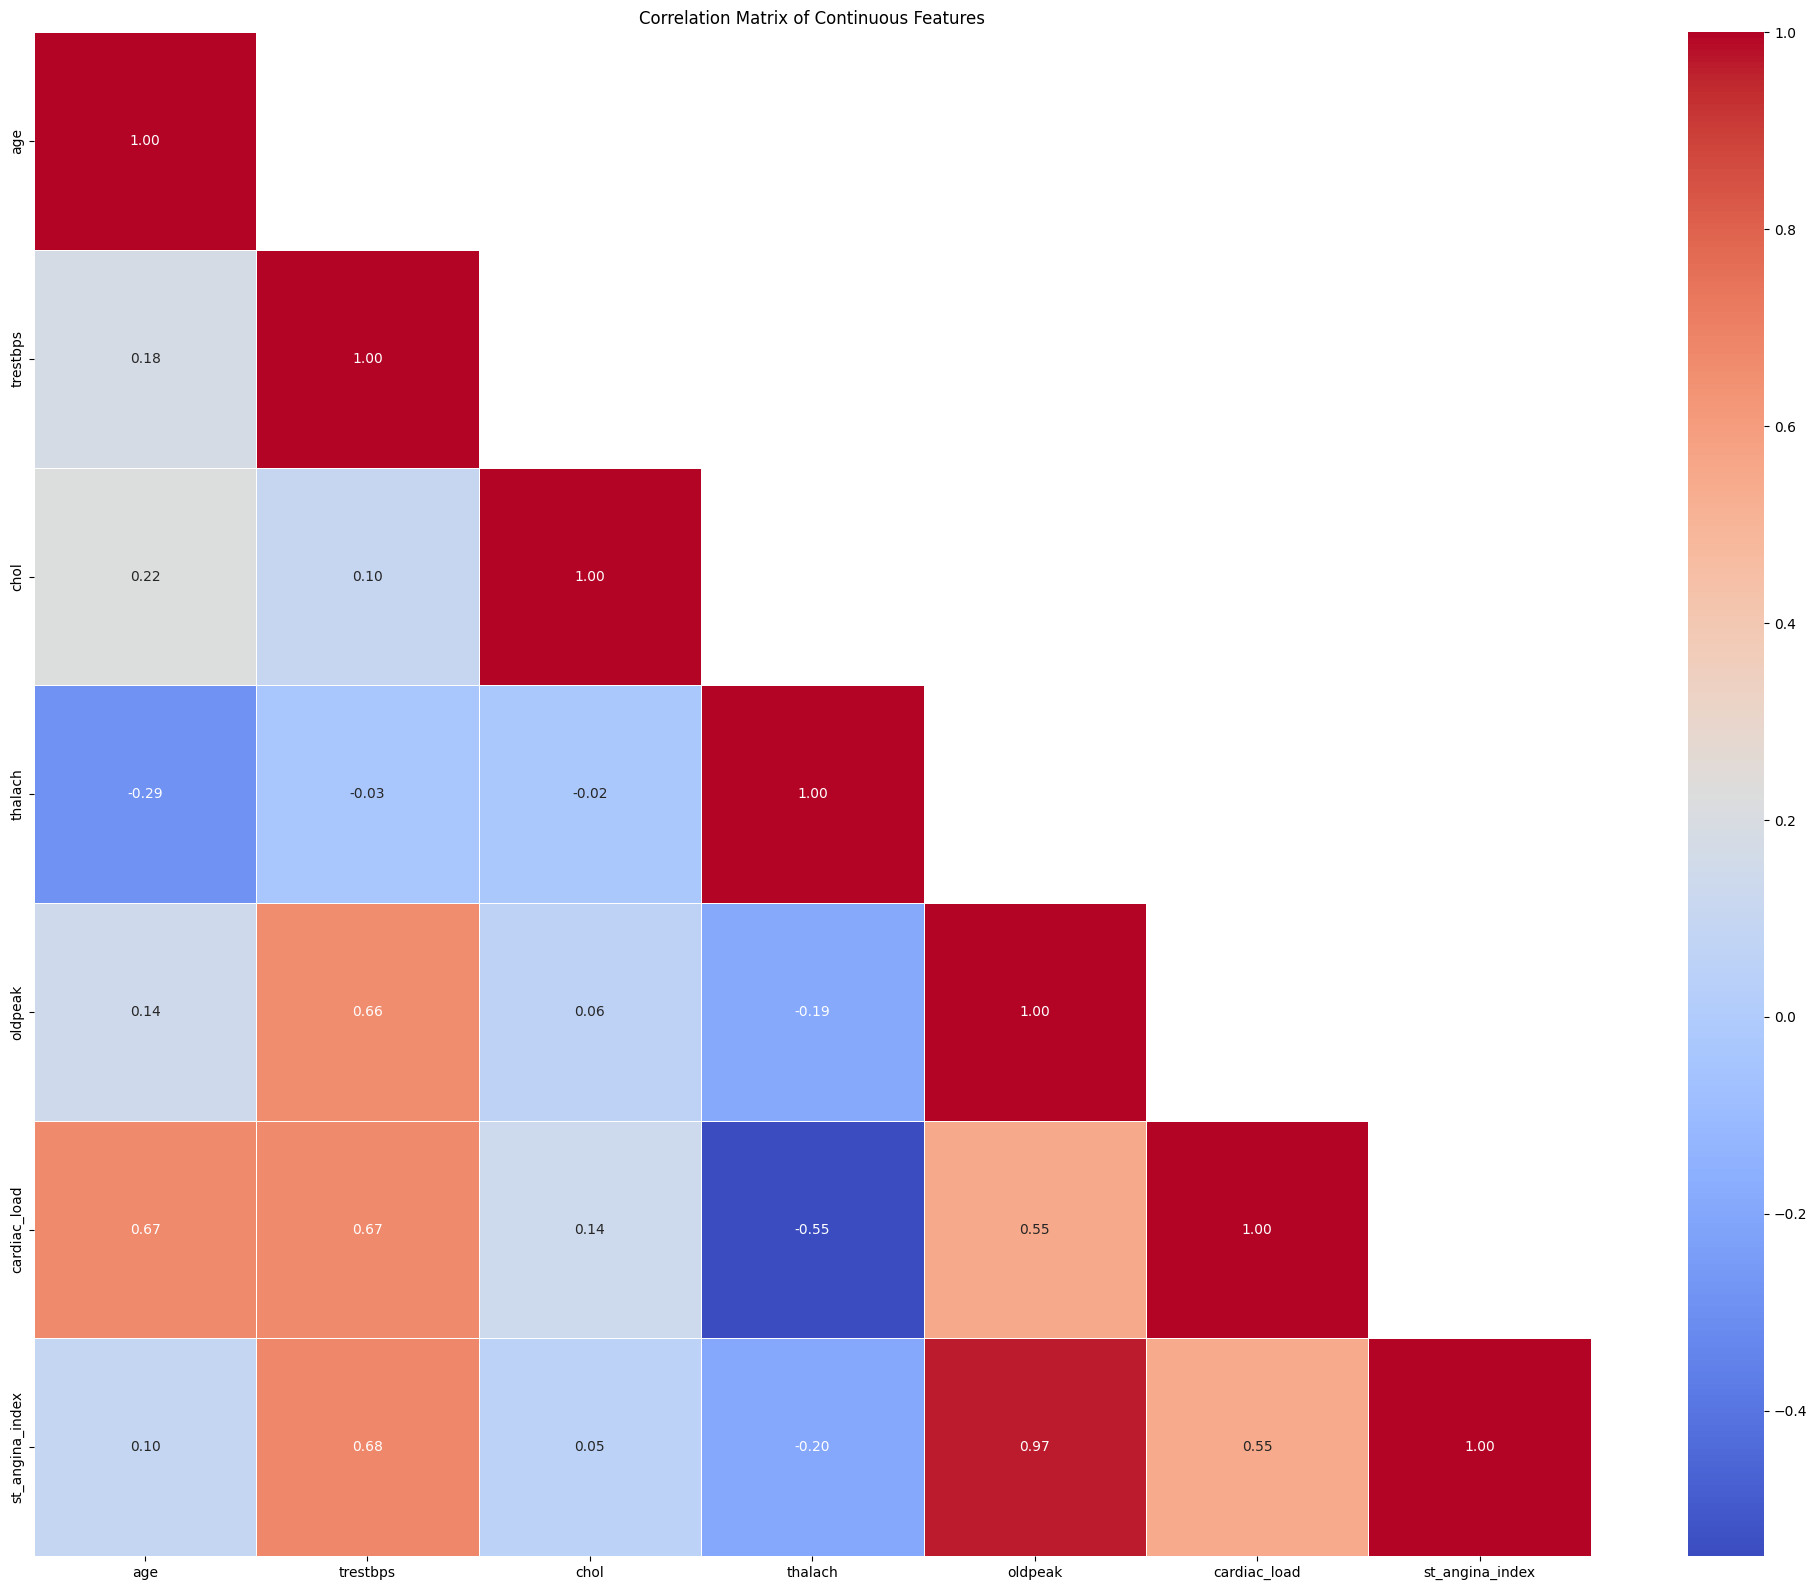

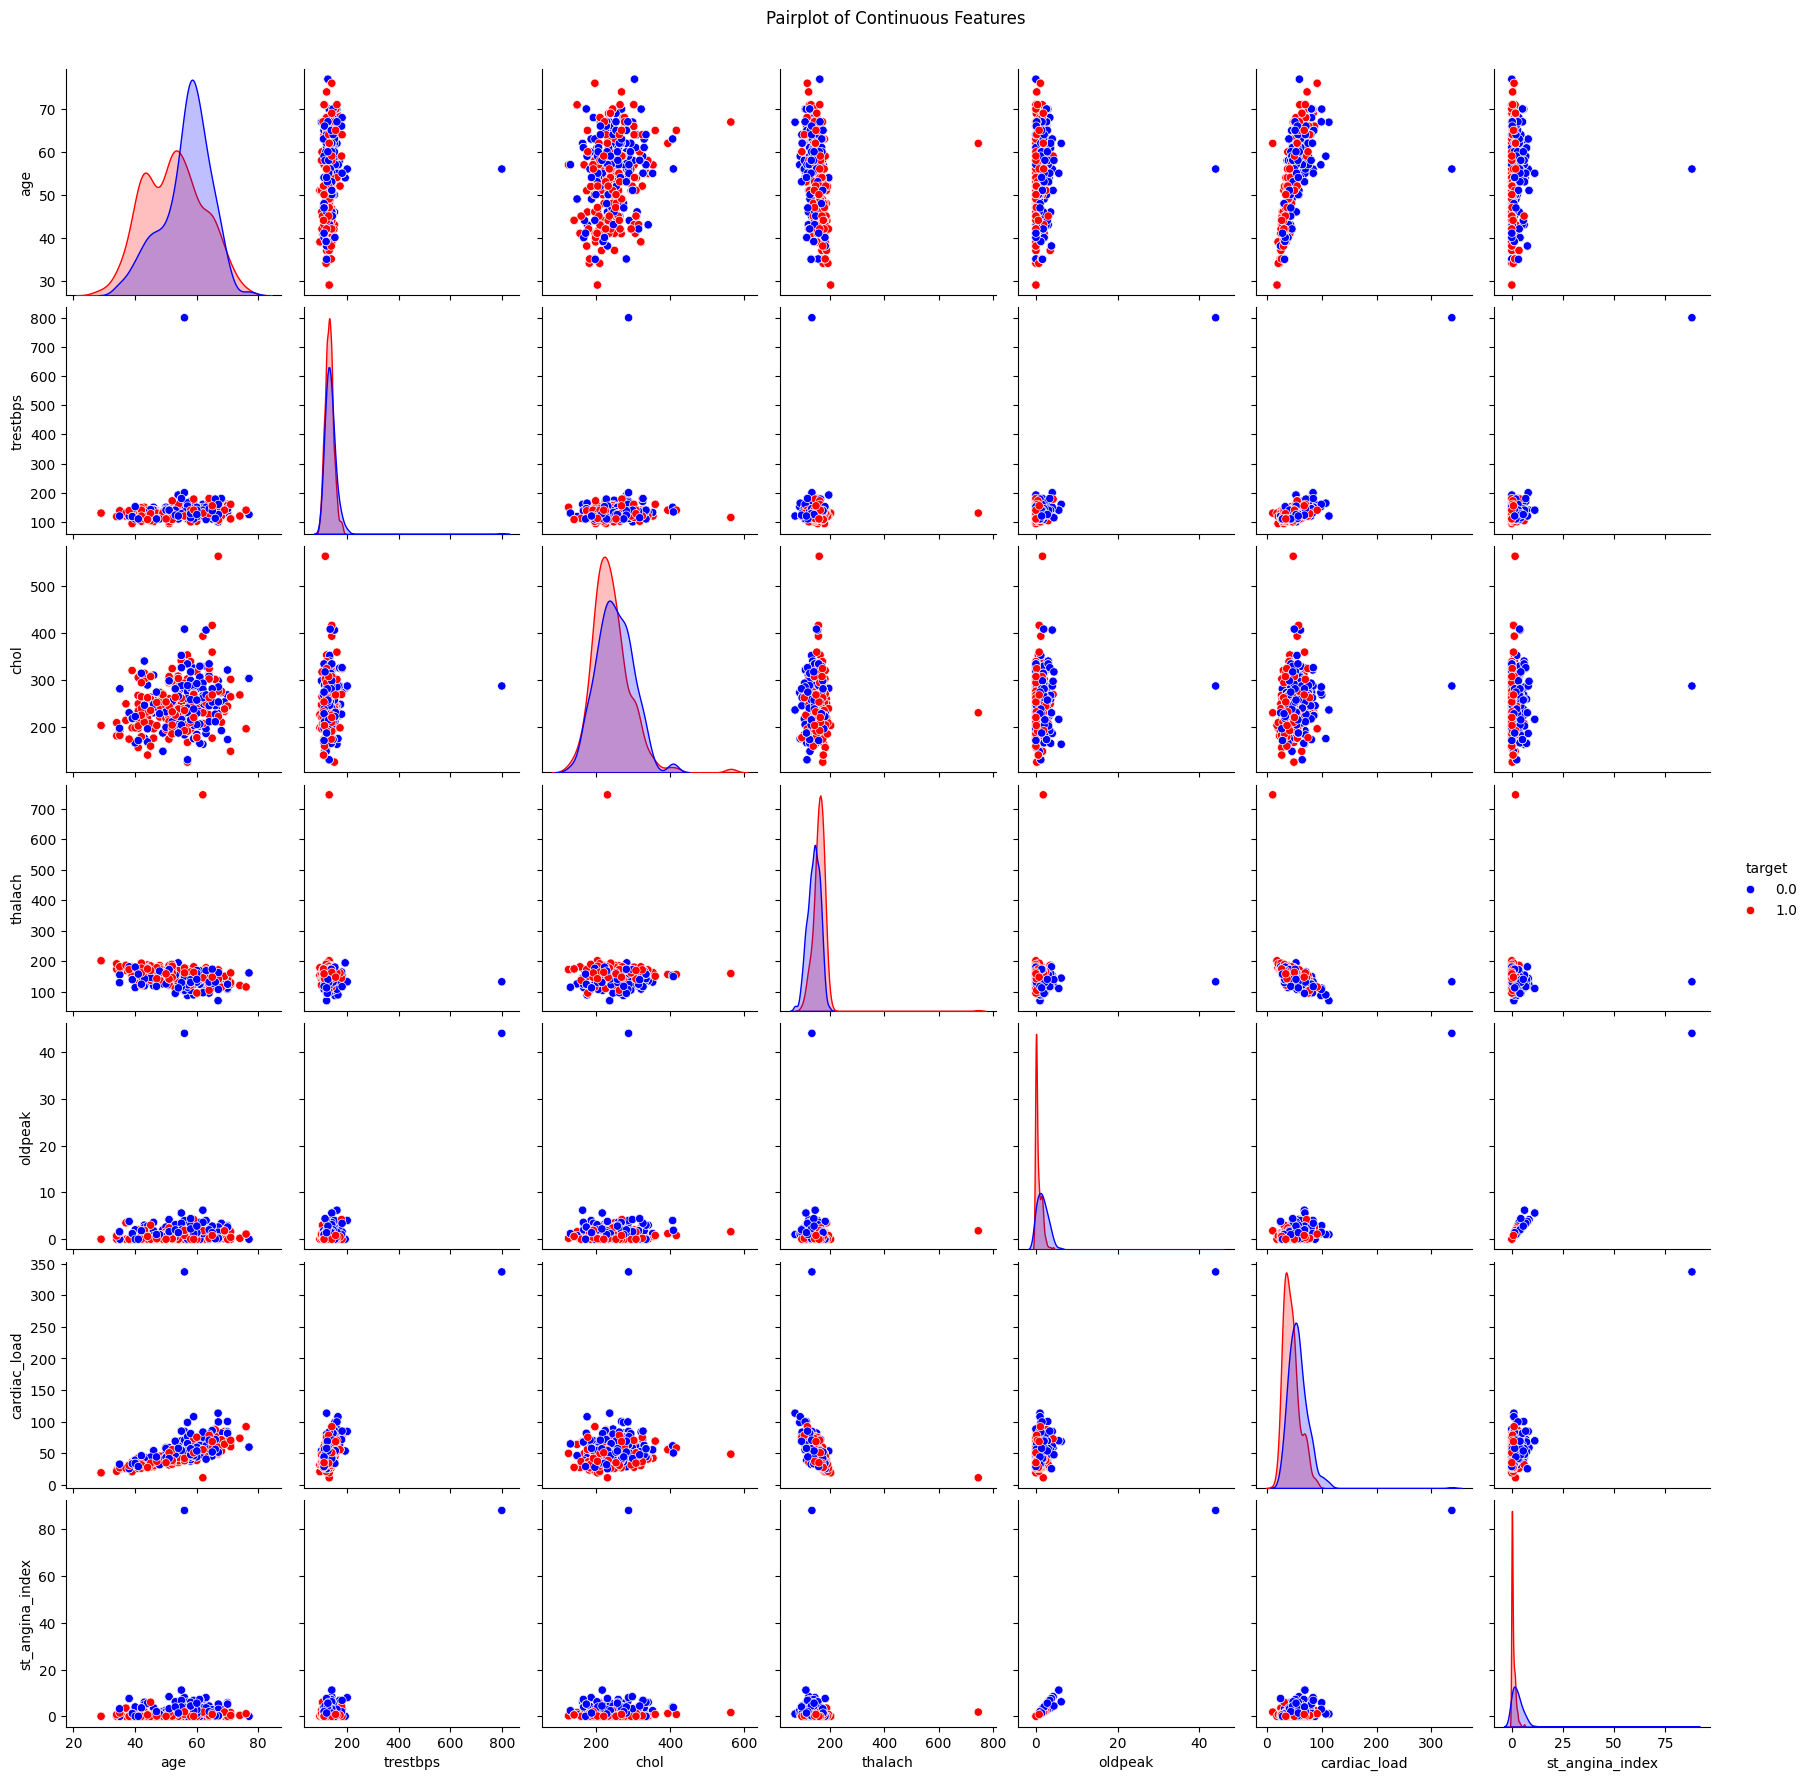

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/HeartAssign2_more_features.csv')

numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "cardiac_load", "st_angina_index"]
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins='auto')
    plt.title(f"{column} Distribution")
    print(f"{column} Skewness: {df[column].skew():.2f}")
    plt.show()

category_mappings = {
    "sex": {1: "Male", 0: "Female"},
    "cp": {0: "Typical Angina", 1: "Atypical Angina", 2: "Non-anginal Pain", 3: "Asymptomatic"},
    "fbs": {1: "True", 0: "False"},
    "restecg": {0: "Normal", 1: "ST-T wave abnormality", 2: "Left ventricular hypertrophy"},
    "exang": {1: "Yes", 0: "No"},
    "slope": {0: "Upsloping", 1: "Flat", 2: "Downsloping"},
    "ca": {0: "0 vessels detected", 1: "1 vessels detected", 2: "2 vessels detected", 3: "3 vessels detected", 4: "4 vessels detected"},
    "thal": {0: "No", 1: "Normal", 2: "Fixed Defect", 3: "Reversible Defect"},
    "target": {1: "Disease", 0: "No Disease"},
    "age_risk": {1: "Low_risk", 2: "Median_risk", 3: "High_risk", 4: "Very_high_risk"}
}

df_display = df.copy()

for col, mapping in category_mappings.items():
    df_display[col] = df_display[col].map(mapping)

fig, axes = plt.subplots(4, 3, figsize=(15, 16))
for i, col in enumerate(category_mappings.keys()):
  if i < len(category_mappings):
    ax = axes[i // 3, i % 3]
    counts = df_display[col].value_counts(dropna=False)

    counts.index = counts.index.astype(str)
    counts.index = ["Missing" if val == "nan" else val for val in counts.index]
    counts.index = [text.replace(" ", "\n") for text in counts.index]

    sns.barplot(x=counts.index, y=counts.values, ax=ax, hue=counts.index, palette="coolwarm")
    ax.set_title(f"Category: {col}", fontsize=14)
    ax.set_xlabel("Values")
    ax.set_ylabel("Count")

    for j, v in enumerate(counts.values):
        ax.text(j, v + 2, str(v), ha='center', fontsize=12)

for i in range(len([col for col in category_mappings.keys() if col in df.columns]), 12):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

plt.figure(figsize = (15, 10))

for i, col in enumerate(numerical_columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.grid(True, linestyle='--', alpha=0.7)

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  median = df[col].median()
  min_val = df[col].min()
  max_val = df[col].max()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  num_outliers = outliers.count()

  stats_text = (f"Median: {median:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\n"f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nOutliers: {num_outliers}")
  plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

correlation_matrix = df[numerical_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool),k=1)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Features')
plt.tight_layout()
plt.show()

sns.pairplot(df[numerical_columns + ["target"]], hue="target", palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot of Continuous Features', y=1.02)
plt.show()


**Stage** **2: Splitting Data**

**Remove duplicated data before data splitting to prevent data leakage**

In [ ]:
df = pd.read_csv('/content/HeartAssign2_more_features.csv')
df = df.drop_duplicates()
df.to_csv('/content/HeartAssign2_more_features.csv', index=False)

duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows:")
    print(df[duplicates])

rows, columns = df.shape
print(f"Dataset shape: {rows} rows × {columns} columns")

df.head()

Number of duplicate rows: 0
Dataset shape: 1017 rows × 17 columns


age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0001    1   0       125  212.0  0.0      1.0    168.0      0      1.0   
1  53.0002    1   0       140  203.0  1.0      0.0    155.0      1      3.1   
2  70.0003    1   0       145  174.0  0.0      1.0    125.0      1      2.6   
3  61.0004    1   0       148  203.0  0.0      1.0    161.0      0      0.0   
4  62.0005    0   0       138  294.0  1.0      1.0    106.0      0      1.9   

   slope  ca  thal  cardiac_load  st_angina_index  age_risk  target  
0      2   2     3     38.690550              1.0       2.0     0.0  
1      0   0     3     47.871148              6.2       2.0     0.0  
2      0   0     3     81.200347              5.2       4.0     0.0  
3      2   1     3     56.074902              0.0       3.0     0.0  
4      1   3     2     80.717631              1.9       3.0     0.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats.mstats import winsorize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/HeartAssign2_more_features.csv')
X = df.drop('target', axis=1)
y = df['target']

if y.isnull().any():
    target_imputer = SimpleImputer(strategy='most_frequent')
    y_imputed = target_imputer.fit_transform(y.values.reshape(-1, 1)).flatten()
    y = pd.Series(y_imputed, name='target')

x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

train_df = pd.concat([x_train, y_train], axis=1)
train_df.to_csv('/content/heart_train.csv', index=False)

val_df = pd.concat([x_val, y_val], axis=1)
val_df.to_csv('/content/heart_val.csv', index=False)

test_df = pd.concat([x_test, y_test], axis=1)
test_df.to_csv('/content/heart_test.csv', index=False)


**Stage 3: Data Preprocessing**

**Understanding the characteristics of training, validating, testing dataset**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              607 non-null    float64
 1   sex              609 non-null    int64  
 2   cp               609 non-null    int64  
 3   trestbps         609 non-null    int64  
 4   chol             608 non-null    float64
 5   fbs              608 non-null    float64
 6   restecg          608 non-null    float64
 7   thalach          608 non-null    float64
 8   exang            609 non-null    int64  
 9   oldpeak          608 non-null    float64
 10  slope            609 non-null    int64  
 11  ca               609 non-null    int64  
 12  thal             609 non-null    int64  
 13  cardiac_load     607 non-null    float64
 14  st_angina_index  608 non-null    float64
 15  age_risk         607 non-null    float64
 16  target           609 non-null    float64
dtypes: float64(10), 

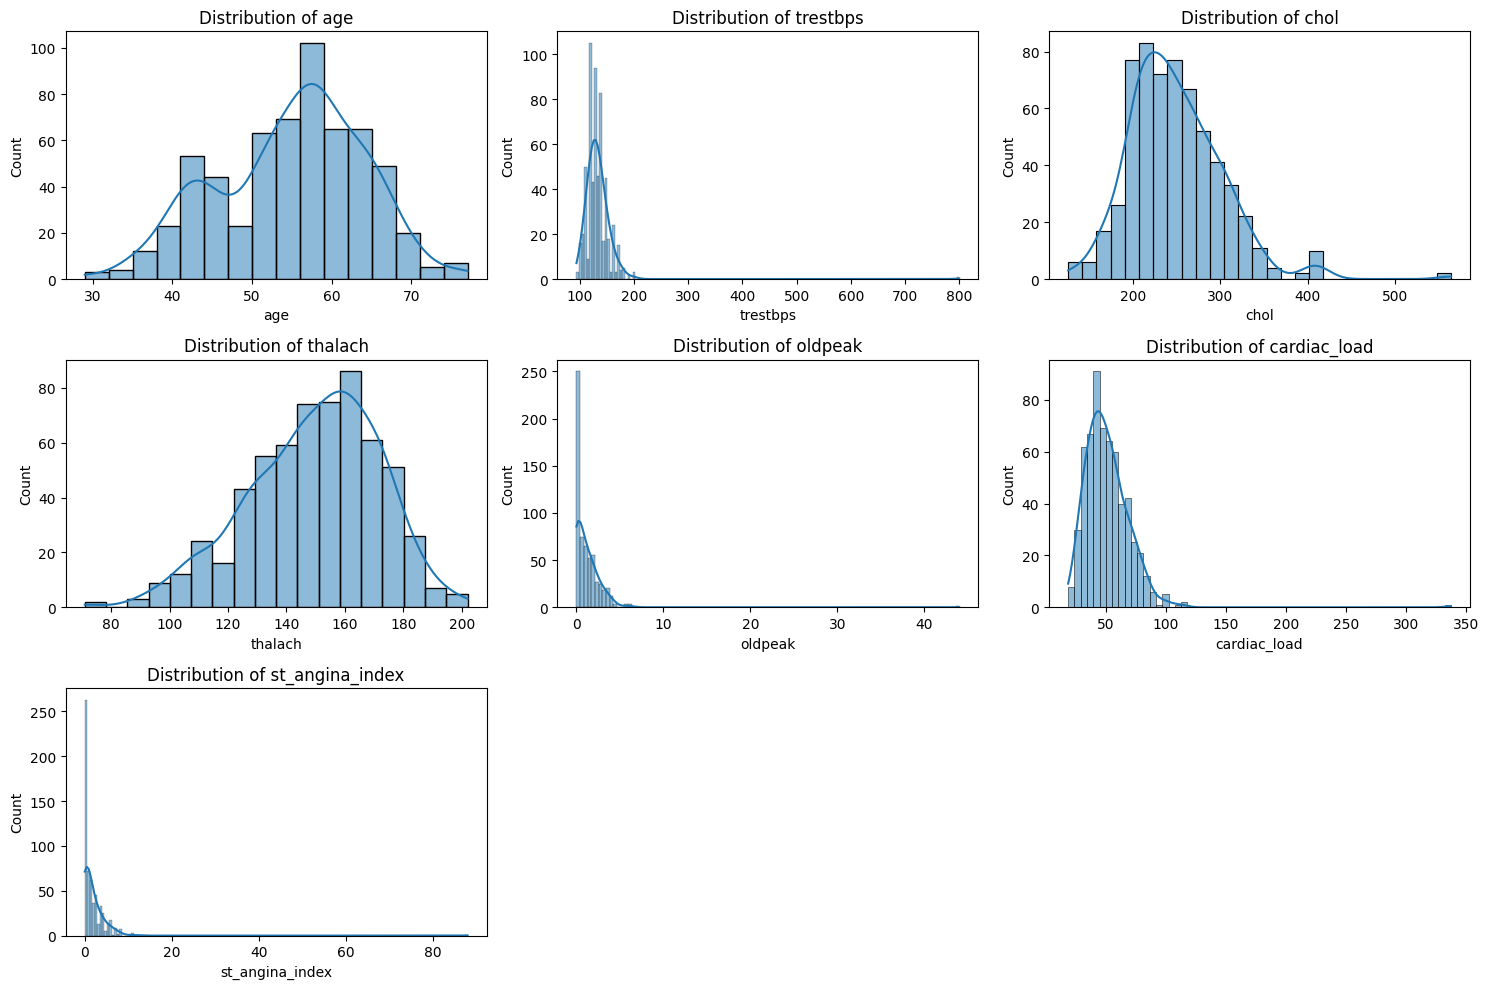

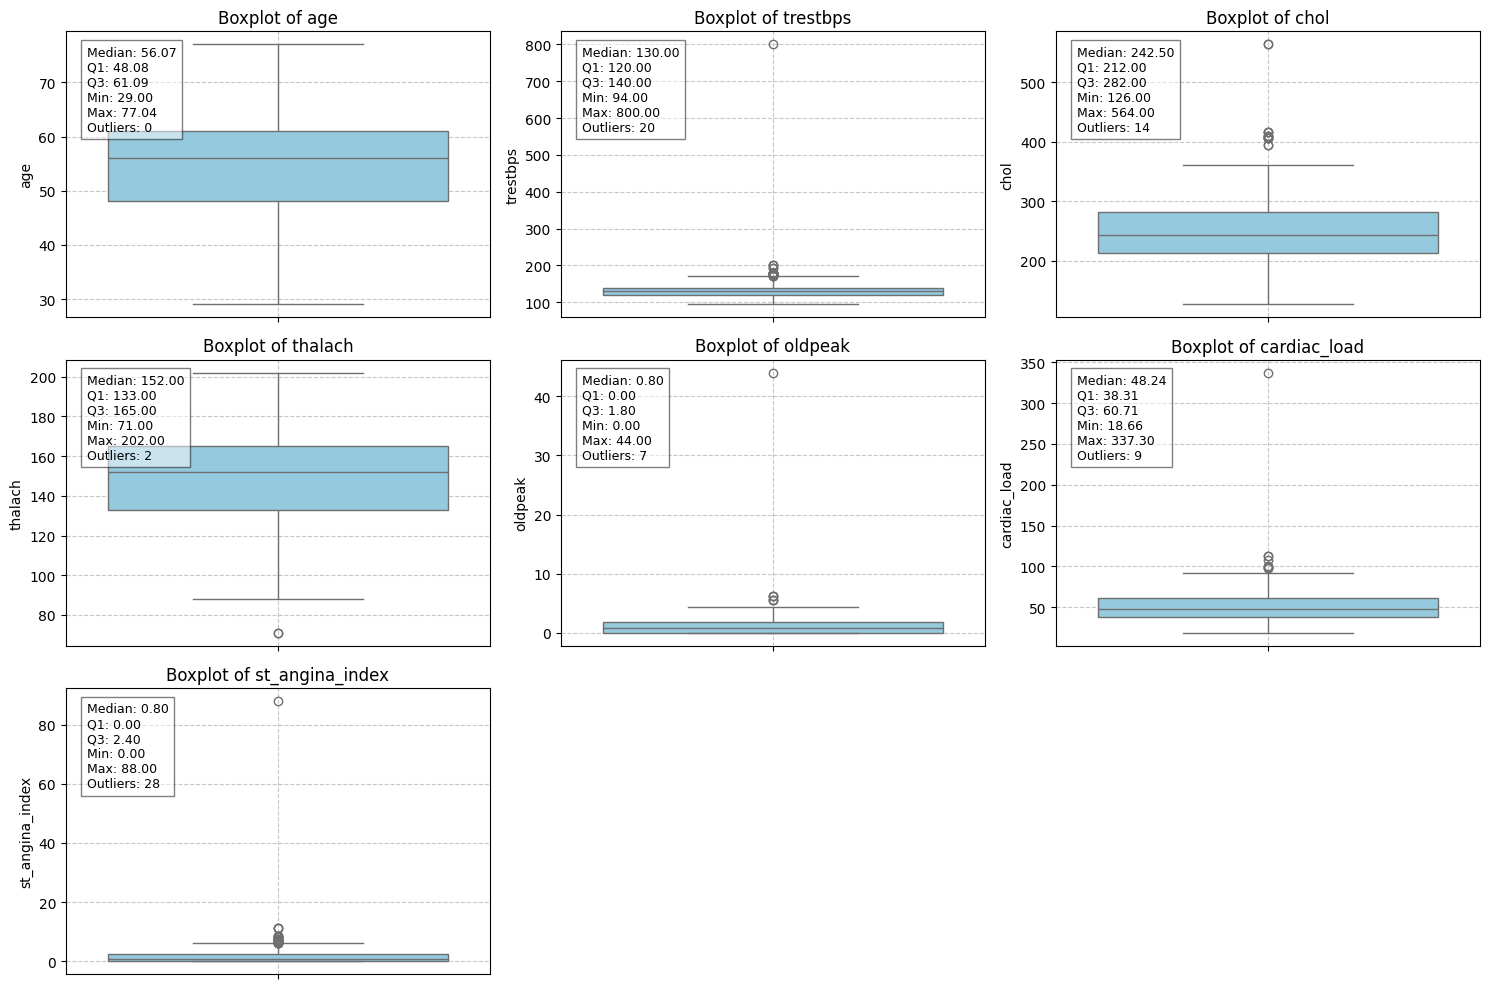

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/heart_train.csv')

df.info()
print("\n% of missing values per column")
print(df.isnull().sum() / df.shape[0] * 100)
print("\nDetailed missing values (Row numbers): ")
for column in df.columns:
    missing_rows = df[df[column].isnull()].index.tolist()
    if missing_rows:
        raw_numbers = [row + 1 for row in missing_rows]
        print(f"{column} -> Missing Raw Numbers: {raw_numbers}, Total: {len(raw_numbers)}")


numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "cardiac_load", "st_angina_index"]

print("\n")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins='auto')
    plt.title(f"Distribution of {col}")
    print(f"{col} Skewness: {df[col].skew():.2f}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.grid(True, linestyle='--', alpha=0.7)

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  median = df[col].median()
  min_val = df[col].min()
  max_val = df[col].max()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  num_outliers = outliers.count()

  stats_text = (f"Median: {median:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\n"f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nOutliers: {num_outliers}")
  plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              204 non-null    float64
 1   sex              204 non-null    int64  
 2   cp               204 non-null    int64  
 3   trestbps         204 non-null    int64  
 4   chol             204 non-null    float64
 5   fbs              204 non-null    float64
 6   restecg          204 non-null    float64
 7   thalach          204 non-null    float64
 8   exang            204 non-null    int64  
 9   oldpeak          204 non-null    float64
 10  slope            204 non-null    int64  
 11  ca               204 non-null    int64  
 12  thal             204 non-null    int64  
 13  cardiac_load     204 non-null    float64
 14  st_angina_index  204 non-null    float64
 15  age_risk         204 non-null    float64
 16  target           204 non-null    float64
dtypes: float64(10), 

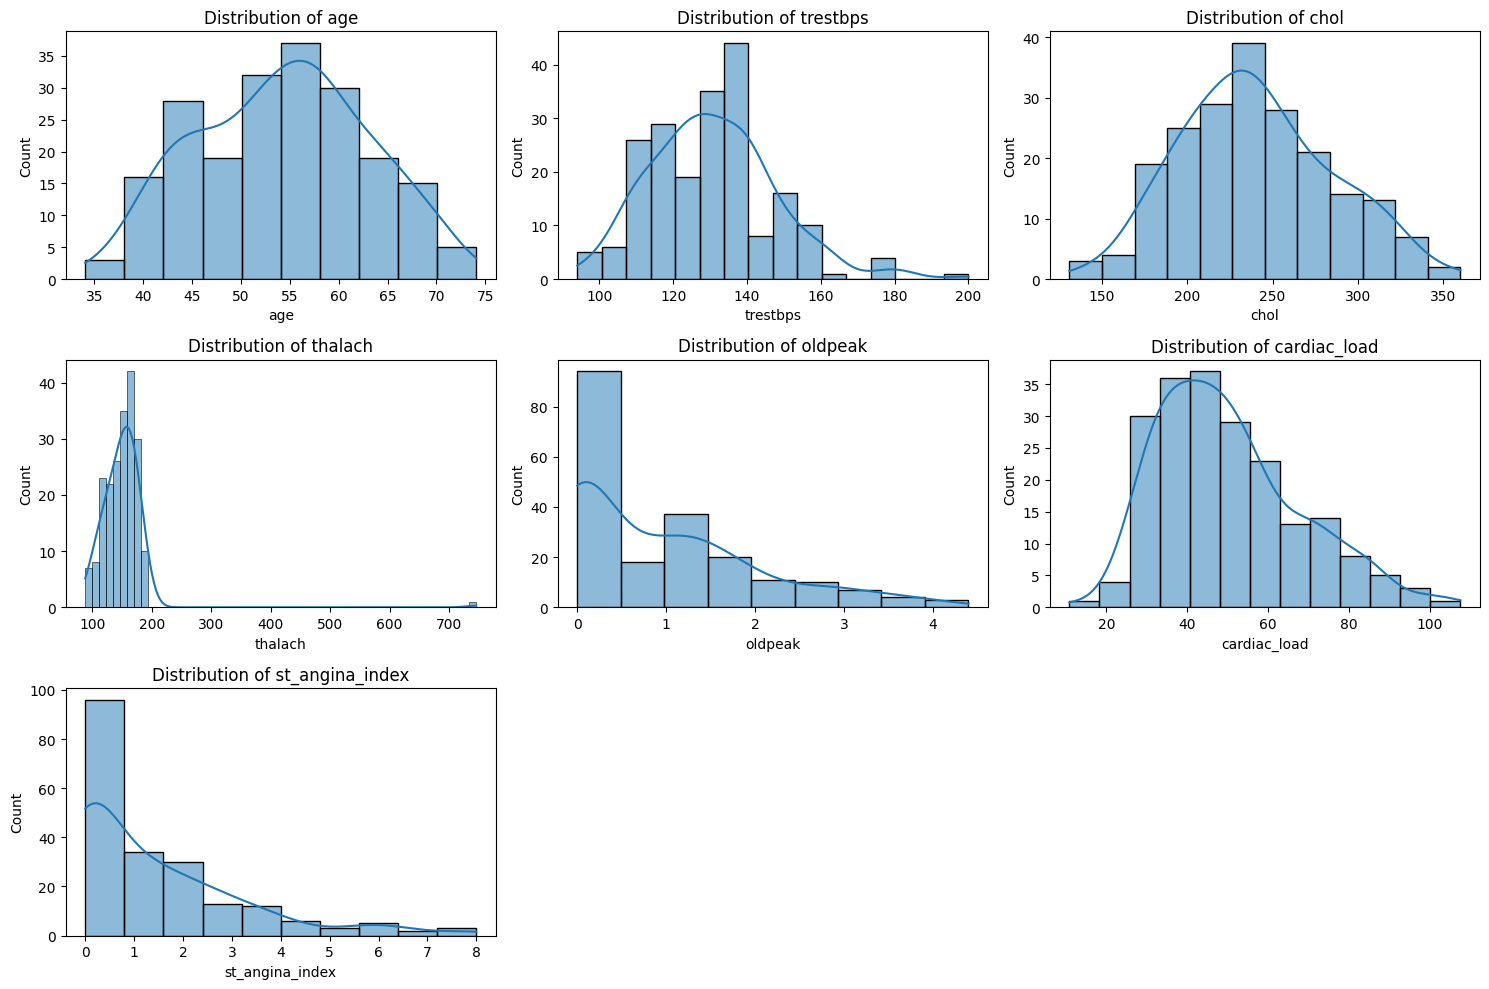

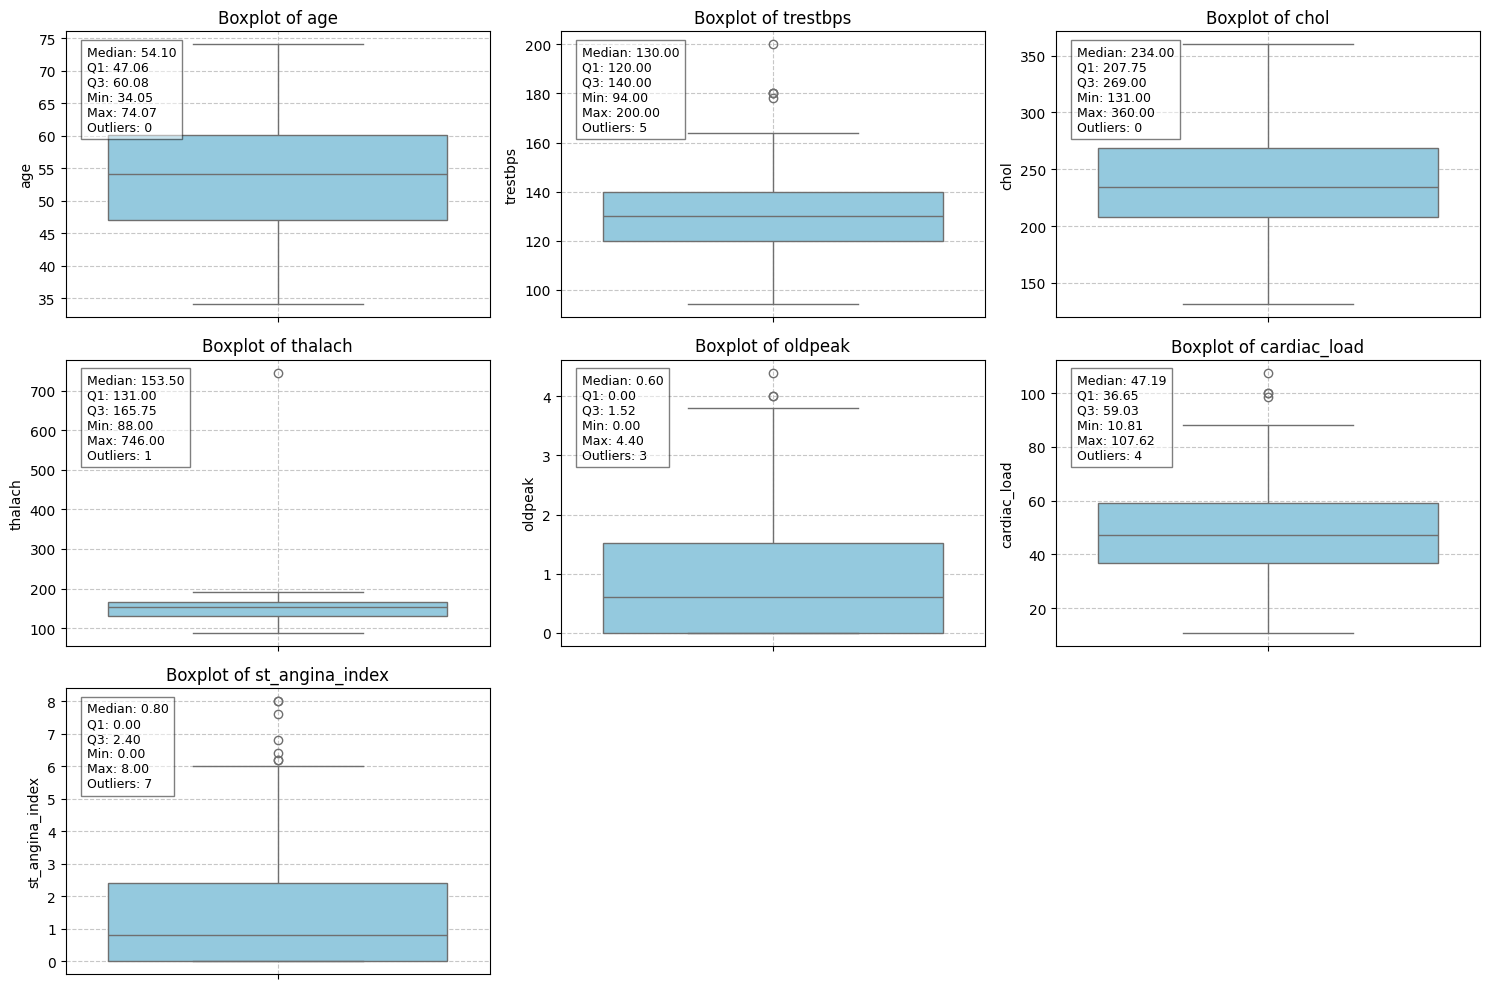

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/heart_test.csv')

df.info()
print("\n% of missing values per column")
print(df.isnull().sum() / df.shape[0] * 100)
print("\nDetailed missing values (Row numbers): ")
for column in df.columns:
    missing_rows = df[df[column].isnull()].index.tolist()
    if missing_rows:
        raw_numbers = [row + 1 for row in missing_rows]
        print(f"{column} -> Missing Raw Numbers: {raw_numbers}, Total: {len(raw_numbers)}")


numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "cardiac_load", "st_angina_index"]

print("\n")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins='auto')
    plt.title(f"Distribution of {col}")
    print(f"{col} Skewness: {df[col].skew():.2f}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.grid(True, linestyle='--', alpha=0.7)

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  median = df[col].median()
  min_val = df[col].min()
  max_val = df[col].max()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  num_outliers = outliers.count()

  stats_text = (f"Median: {median:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\n"f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nOutliers: {num_outliers}")
  plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              204 non-null    float64
 1   sex              204 non-null    int64  
 2   cp               204 non-null    int64  
 3   trestbps         204 non-null    int64  
 4   chol             204 non-null    float64
 5   fbs              204 non-null    float64
 6   restecg          204 non-null    float64
 7   thalach          204 non-null    float64
 8   exang            204 non-null    int64  
 9   oldpeak          204 non-null    float64
 10  slope            204 non-null    int64  
 11  ca               204 non-null    int64  
 12  thal             204 non-null    int64  
 13  cardiac_load     204 non-null    float64
 14  st_angina_index  204 non-null    float64
 15  age_risk         204 non-null    float64
 16  target           204 non-null    float64
dtypes: float64(10), 

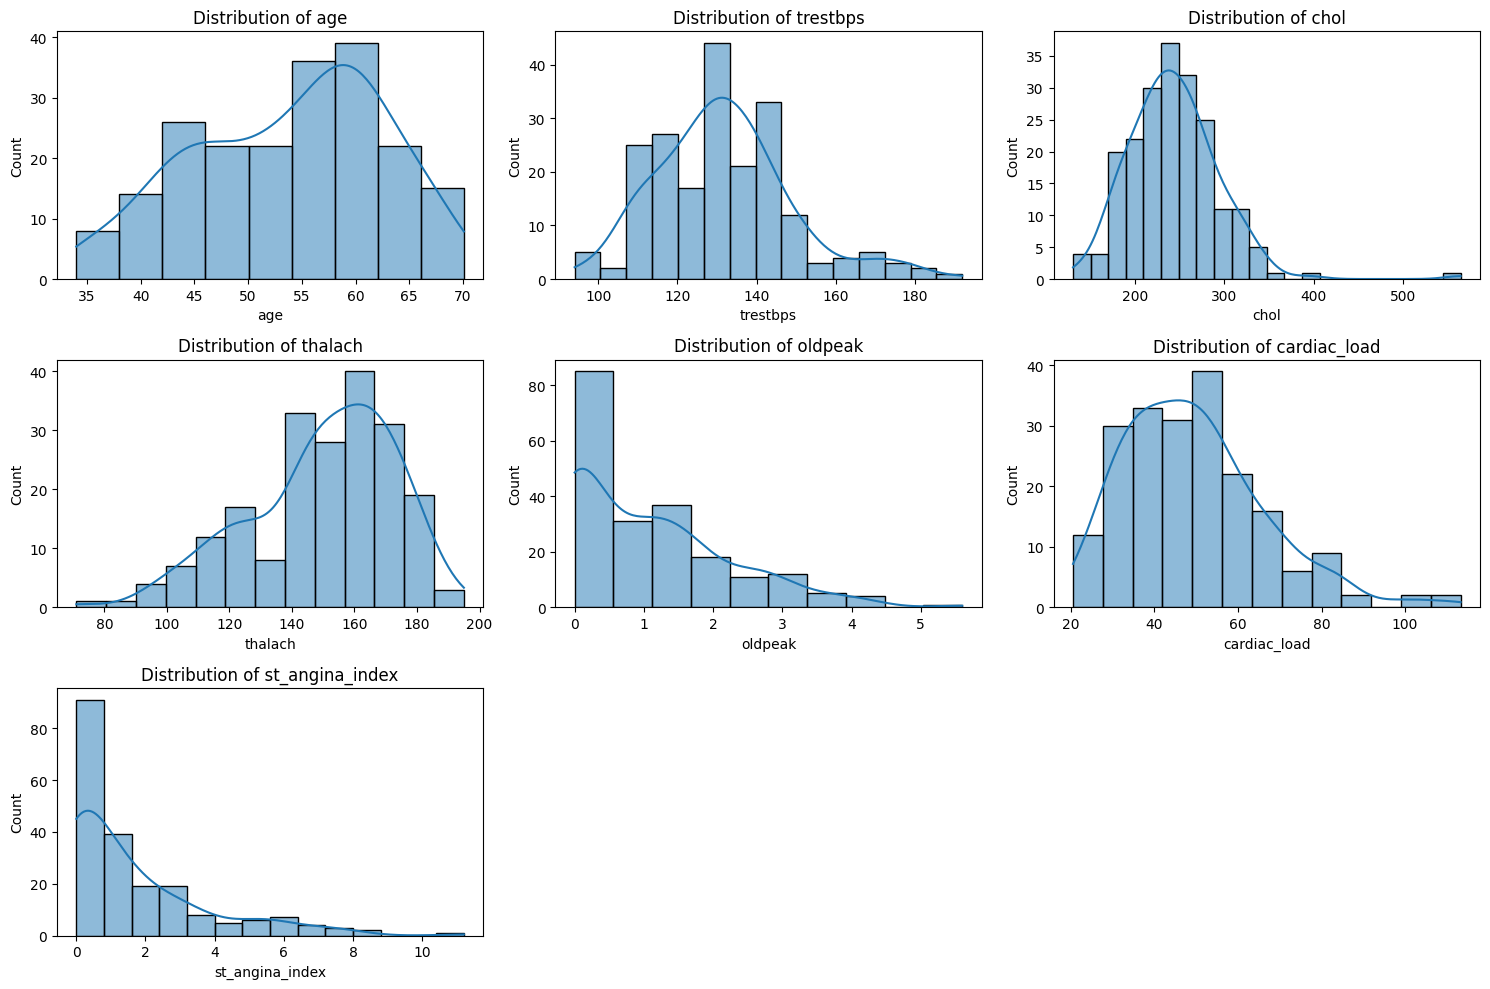

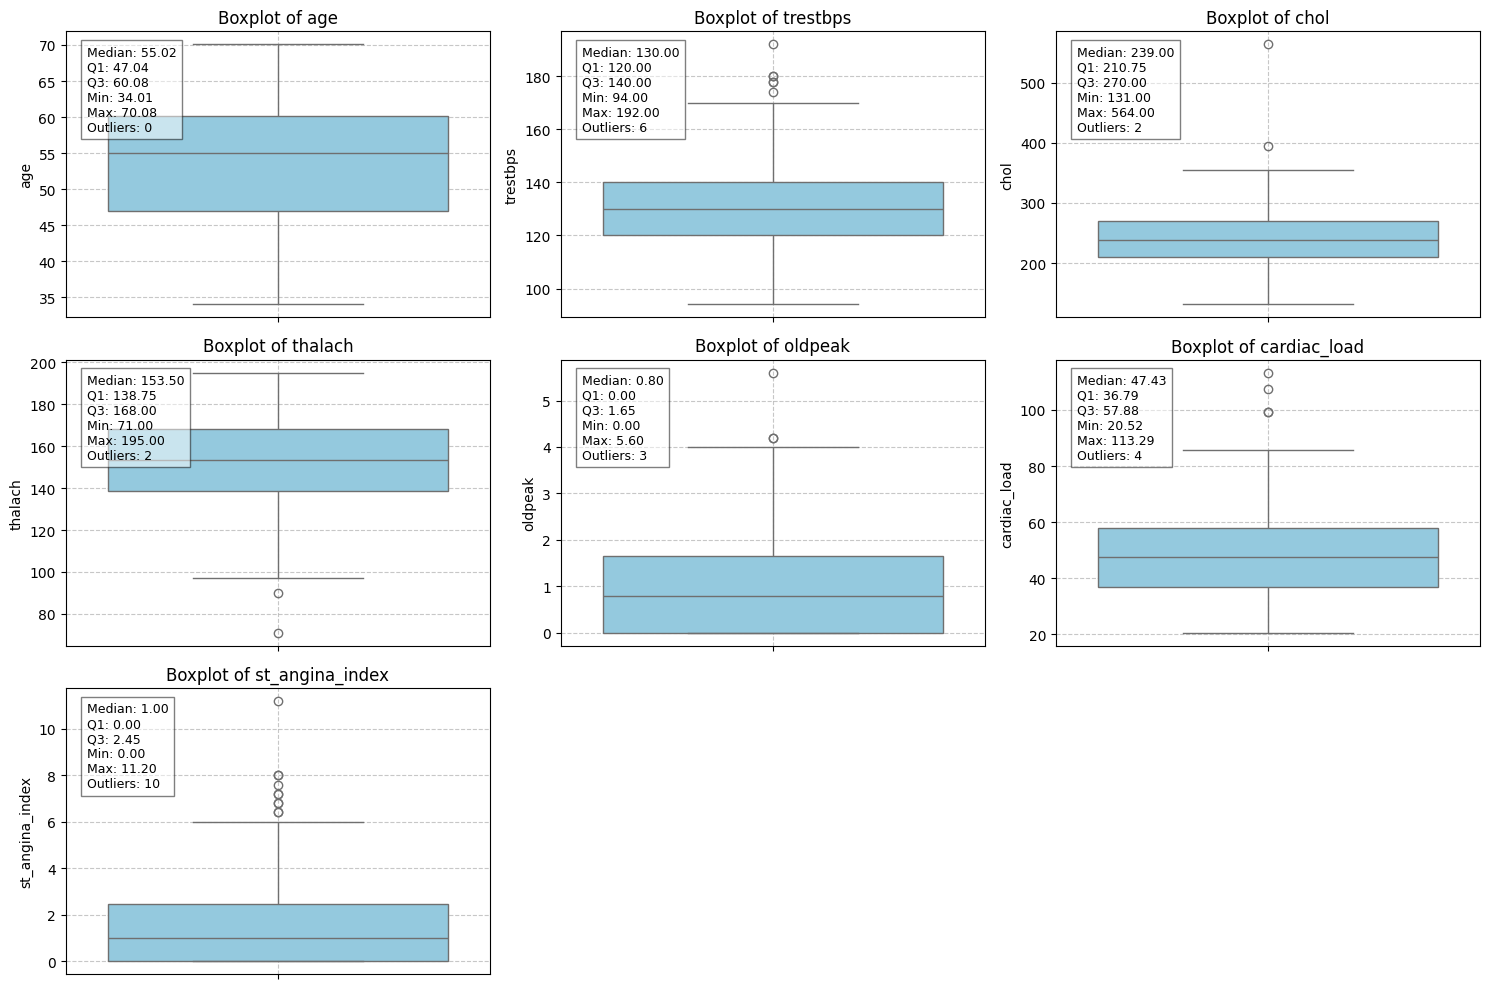

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/heart_val.csv')

df.info()
print("\n% of missing values per column")
print(df.isnull().sum() / df.shape[0] * 100)
print("\nDetailed missing values (Row numbers): ")
for column in df.columns:
    missing_rows = df[df[column].isnull()].index.tolist()
    if missing_rows:
        raw_numbers = [row + 1 for row in missing_rows]
        print(f"{column} -> Missing Raw Numbers: {raw_numbers}, Total: {len(raw_numbers)}")


numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "cardiac_load", "st_angina_index"]

print("\n")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins='auto')
    plt.title(f"Distribution of {col}")
    print(f"{col} Skewness: {df[col].skew():.2f}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.grid(True, linestyle='--', alpha=0.7)

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  median = df[col].median()
  min_val = df[col].min()
  max_val = df[col].max()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  num_outliers = outliers.count()

  stats_text = (f"Median: {median:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\n"f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nOutliers: {num_outliers}")
  plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

**Handle missing values and outliers, and scaling data of training, validating, testing dataset based on their characteristics**

In [ ]:
# #已经完成的

# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer, SimpleImputer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from scipy.stats.mstats import winsorize

# #Differentiate categorical features
# ordinal_cols = ["age_risk", "slope"] #Ordered categorical variables (Order is important)
# nominal_cols = ["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"] #Unordered categorical variables （Order is not important)

# #Replace the extreme values of the top 7% and bottom 7% of the data with more reasonable values
# def winsorize_outliers(data):
#     return np.apply_along_axis(lambda x: winsorize(x, limits=(0.07, 0.07)), 0, data)

# def preprocess_data(input_file, output_file):
#     df = pd.read_csv(input_file)

#     #Seperate independent variables and dependent variable
#     y = df["target"]
#     X = df.drop(columns=["target"])

#     numerical_cols = [col for col in X.columns if col not in ordinal_cols + nominal_cols]

#     #Choose scaling method based on the distribution of data (If -0.5 <= skewness <= 0.5 is approximately normal, use StandardScaler(), else use MinMaxScaler())
#     scaler_type = StandardScaler() if abs(X[numerical_cols].skew()).mean() < 0.5 else MinMaxScaler()

#     numerical_pipeline = Pipeline([
#         ("imputer", KNNImputer(n_neighbors=5)),
#         ("winsorizer", FunctionTransformer(winsorize_outliers, validate=False)),
#         ("scaler", scaler_type)
#     ])

#     ordinal_pipeline = Pipeline([
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
#     ])

#     nominal_pipeline = Pipeline([
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("to_int", FunctionTransformer(lambda x: x.astype(int))),
#         ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
#     ])

#     preprocessor = ColumnTransformer([
#         ("num", numerical_pipeline, numerical_cols),
#         ("ord", ordinal_pipeline, ordinal_cols),
#         ("nom", nominal_pipeline, nominal_cols)
#     ], remainder='passthrough')

#     X_processed = preprocessor.fit_transform(X)

#     num_feature_names = numerical_cols
#     ord_feature_names = ordinal_cols

#     nom_encoder = preprocessor.named_transformers_['nom'].named_steps['encoder']
#     nom_feature_names = []
#     for col, categories in zip(nominal_cols, nom_encoder.categories_):
#       for cat in categories:
#         nom_feature_names.append(f"{col}_{int(cat)}")

#     feature_names = num_feature_names + ord_feature_names + nom_feature_names

#     processed_df = pd.DataFrame(X_processed, columns=feature_names)

#     processed_df["target"] = y.values

#     processed_df.to_csv(output_file, index=False)
#     print(f"{output_file} Done")

# preprocess_data('/content/heart_train.csv', 'processed_train.csv')
# preprocess_data('/content/heart_val.csv', 'processed_val.csv')
# preprocess_data('/content/heart_test.csv', 'processed_test.csv')


**After data preprocessing, check the training, validating, testing dataset**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              615 non-null    float64
 1   trestbps         615 non-null    float64
 2   chol             615 non-null    float64
 3   thalach          615 non-null    float64
 4   oldpeak          615 non-null    float64
 5   cardiac_load     615 non-null    float64
 6   st_angina_index  615 non-null    float64
 7   age_risk         615 non-null    float64
 8   slope            615 non-null    float64
 9   target           615 non-null    float64
 10  sex              615 non-null    int64  
 11  cp               615 non-null    int64  
 12  fbs              615 non-null    int64  
 13  restecg          615 non-null    int64  
 14  exang            615 non-null    int64  
 15  ca               615 non-null    int64  
 16  thal             615 non-null    int64  
dtypes: float64(10), 

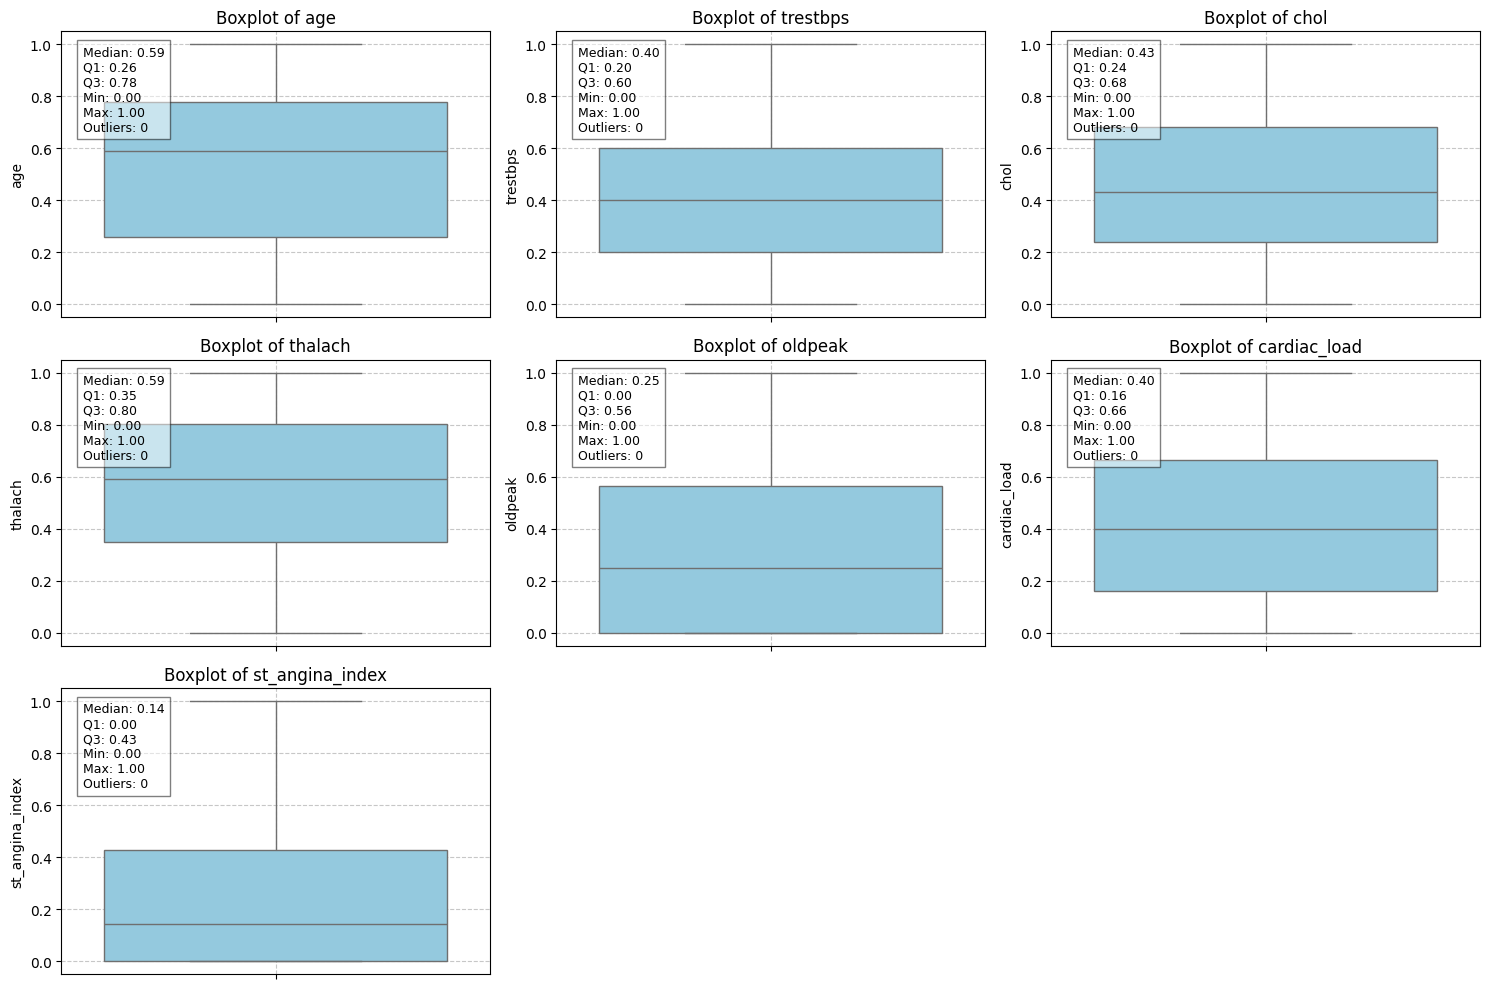

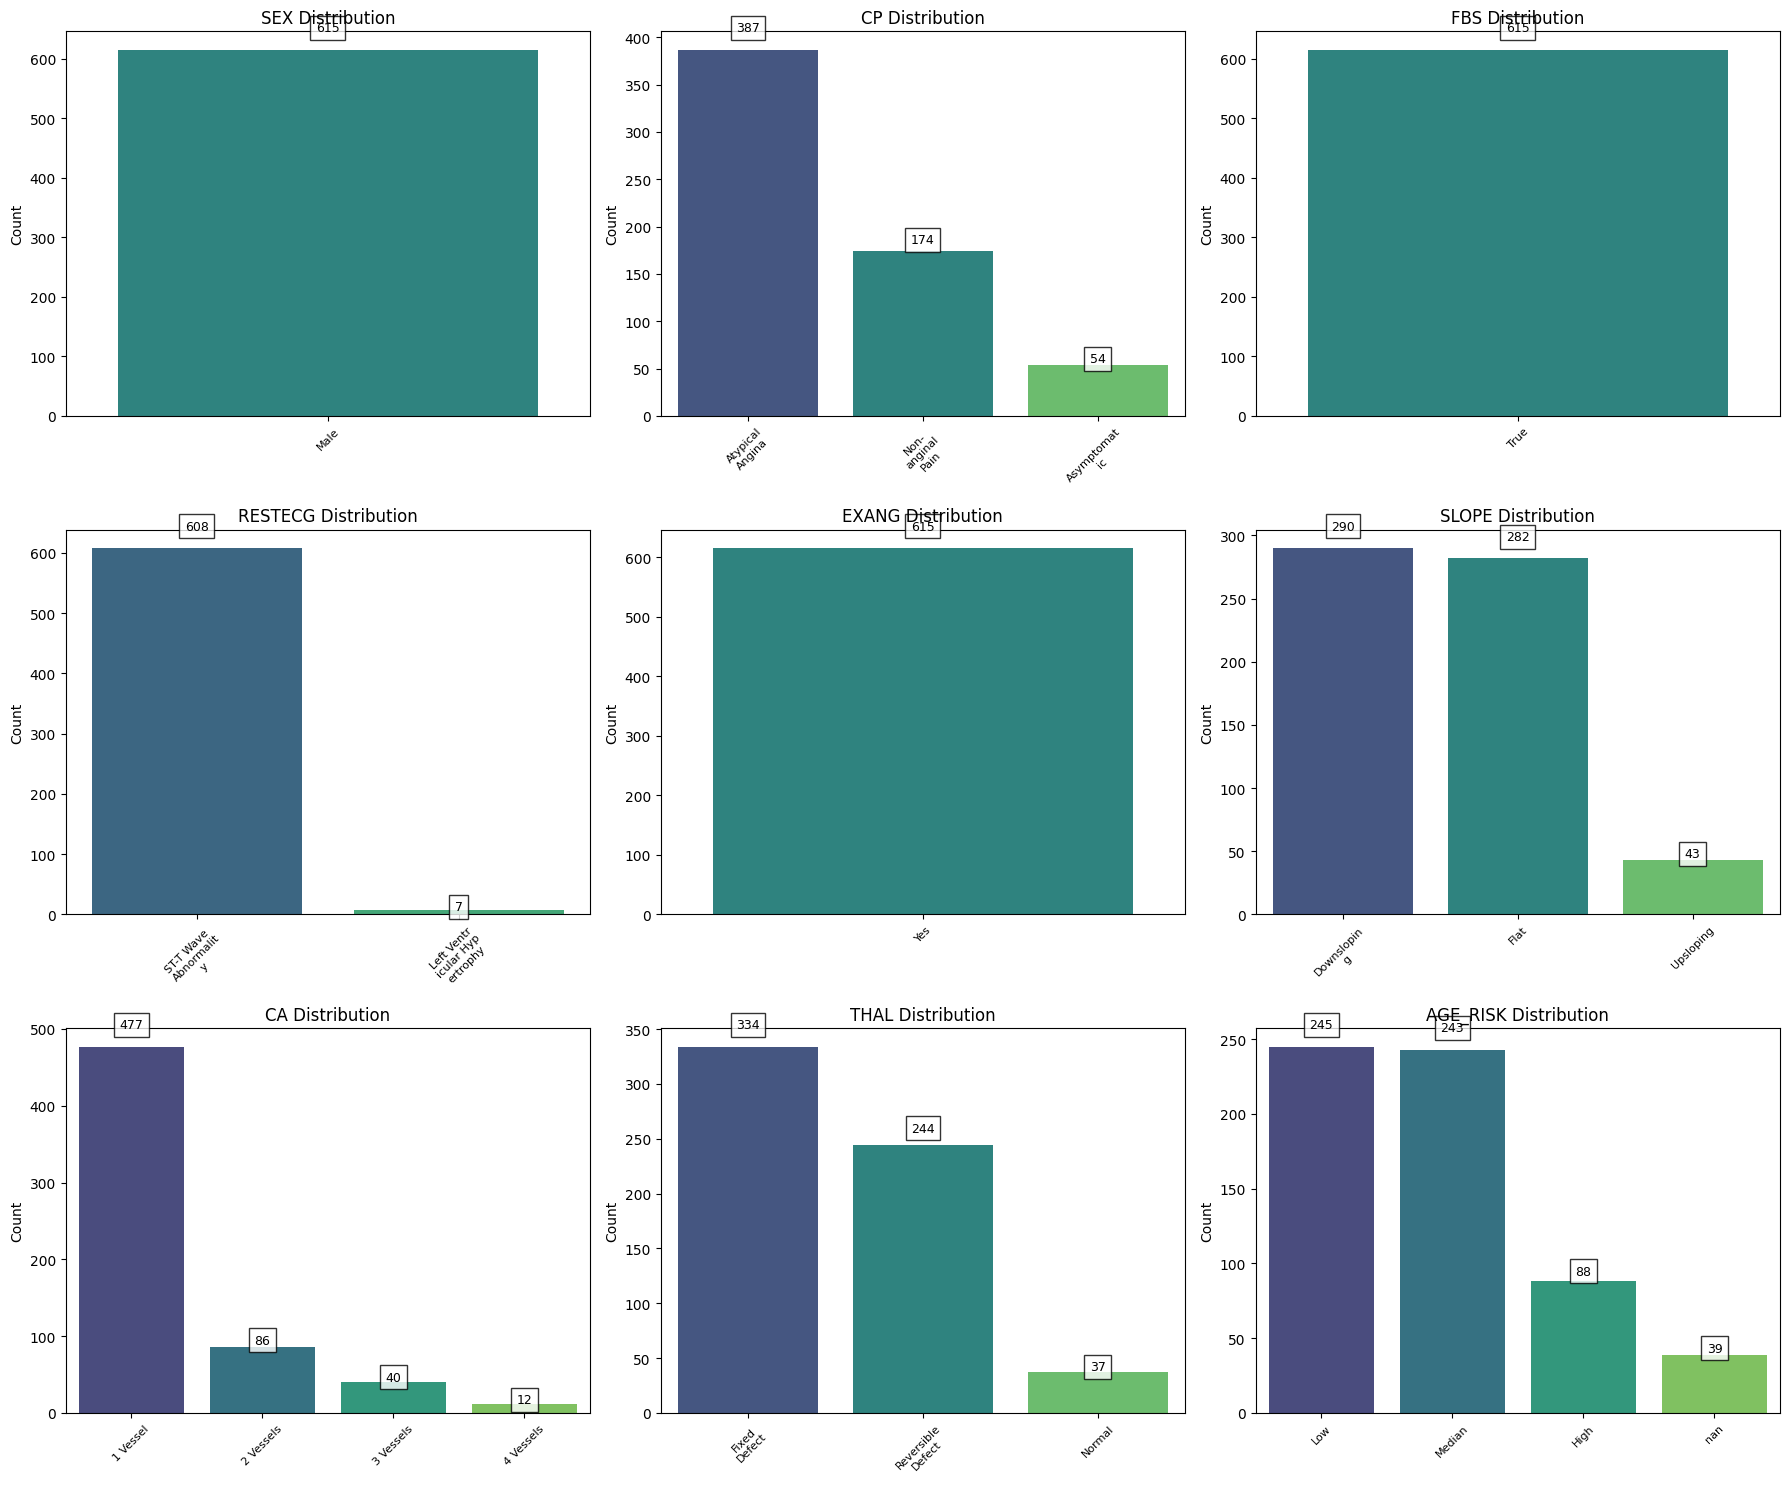

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

def decode_onehot_columns(df, nominal_cols):
    df_decoded = df.copy()
    for col in nominal_cols:
        encoded_cols = [c for c in df.columns if c.startswith(f"{col}_")]
        if encoded_cols:
            df_decoded[col] = (
                df[encoded_cols]
                .idxmax(axis=1)
                .str.replace(f"{col}_", "")
                .astype(float)
                .astype(int)
            )
            df_decoded.drop(columns=encoded_cols, inplace=True)
    return df_decoded

df = pd.read_csv('/content/processed_train.csv')
df = decode_onehot_columns(df, nominal_cols=["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"])


df.info()
print("\n% of missing values per column")
print(df.isnull().sum() / df.shape[0] * 100)
print("\nDetailed missing values (Row numbers): ")
for column in df.columns:
    missing_rows = df[df[column].isnull()].index.tolist()
    if missing_rows:
        raw_numbers = [row + 1 for row in missing_rows]
        print(f"{column} -> Missing Raw Numbers: {raw_numbers}, Total: {len(raw_numbers)}")

numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "cardiac_load", "st_angina_index"]

df_display = df.copy()

plt.figure(figsize = (15, 10))

for i, col in enumerate(numerical_columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.grid(True, linestyle='--', alpha=0.7)

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  median = df[col].median()
  min_val = df[col].min()
  max_val = df[col].max()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  num_outliers = outliers.count()

  stats_text = (f"Median: {median:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\n"f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nOutliers: {num_outliers}")
  plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

category_mappings = {
    "sex": {1: "Male", 0: "Female"},
    "cp": {0: "Typical\nAngina", 1: "Atypical\nAngina", 2: "Non-anginal\nPain", 3: "Asymptomatic"},
    "fbs": {1: "True", 0: "False"},
    "restecg": {0: "Normal", 1: "ST-T Wave\nAbnormality", 2: "Left Ventricular\nHypertrophy"},
    "exang": {1: "Yes", 0: "No"},
    "slope": {0: "Upsloping", 1: "Flat", 2: "Downsloping"},
    "ca": {0: "0 Vessels", 1: "1 Vessel", 2: "2 Vessels", 3: "3 Vessels", 4: "4 Vessels"},
    "thal": {0: "No", 1: "Normal", 2: "Fixed\nDefect", 3: "Reversible\nDefect"},
    "target": {1: "Disease", 0: "No Disease"},
    "age_risk": {1: "Low", 2: "Median", 3: "High", 4: "Very High"}
}

df_display = df.copy()
for col, mapping in category_mappings.items():
    if col in df_display.columns:
        df_display[col] = df_display[col].map(mapping)

cat_cols = [col for col in category_mappings if col != "target"]
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = df_display[col].value_counts(dropna=False)

    labels = ['\n'.join(wrap(str(label), 10)) for label in counts.index]

    sns.barplot(x=labels, y=counts.values, ax=ax, hue=labels, palette="viridis", legend=False)
    ax.set_title(f"{col.upper()} Distribution", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', labelsize=8, rotation=45)

    for j, v in enumerate(counts.values):
        ax.text(j, v + 0.05*v, str(v), ha='center',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8))

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              206 non-null    float64
 1   trestbps         206 non-null    float64
 2   chol             206 non-null    float64
 3   thalach          206 non-null    float64
 4   oldpeak          206 non-null    float64
 5   cardiac_load     206 non-null    float64
 6   st_angina_index  206 non-null    float64
 7   age_risk         206 non-null    float64
 8   slope            206 non-null    float64
 9   target           206 non-null    float64
 10  sex              206 non-null    int64  
 11  cp               206 non-null    int64  
 12  fbs              206 non-null    int64  
 13  restecg          206 non-null    int64  
 14  exang            206 non-null    int64  
 15  ca               206 non-null    int64  
 16  thal             206 non-null    int64  
dtypes: float64(10), 

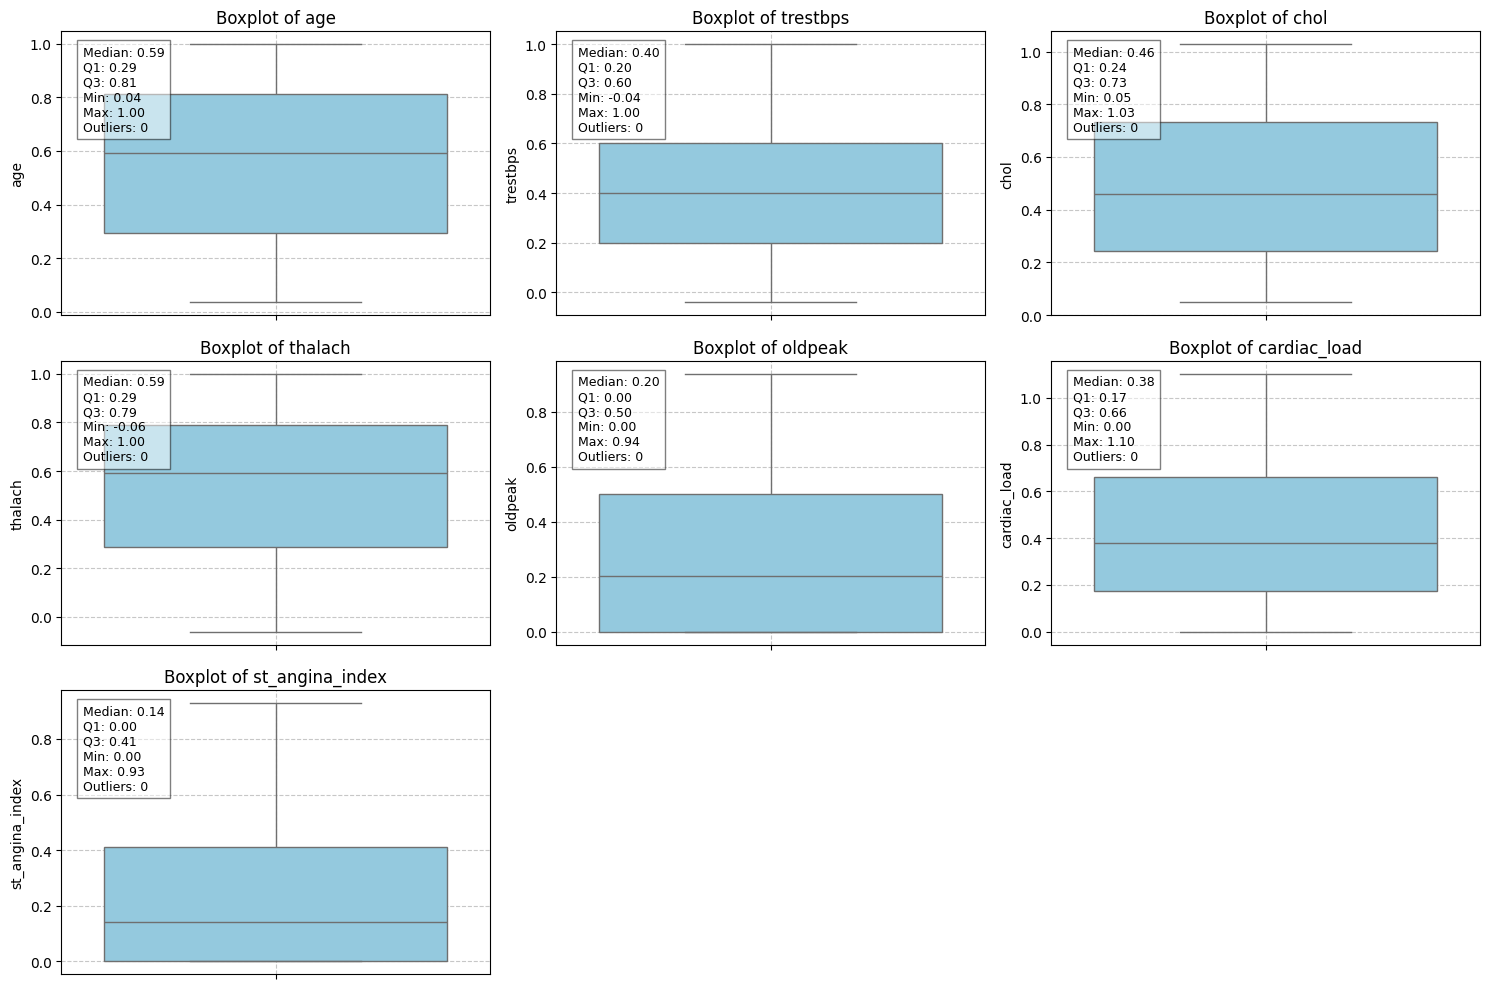

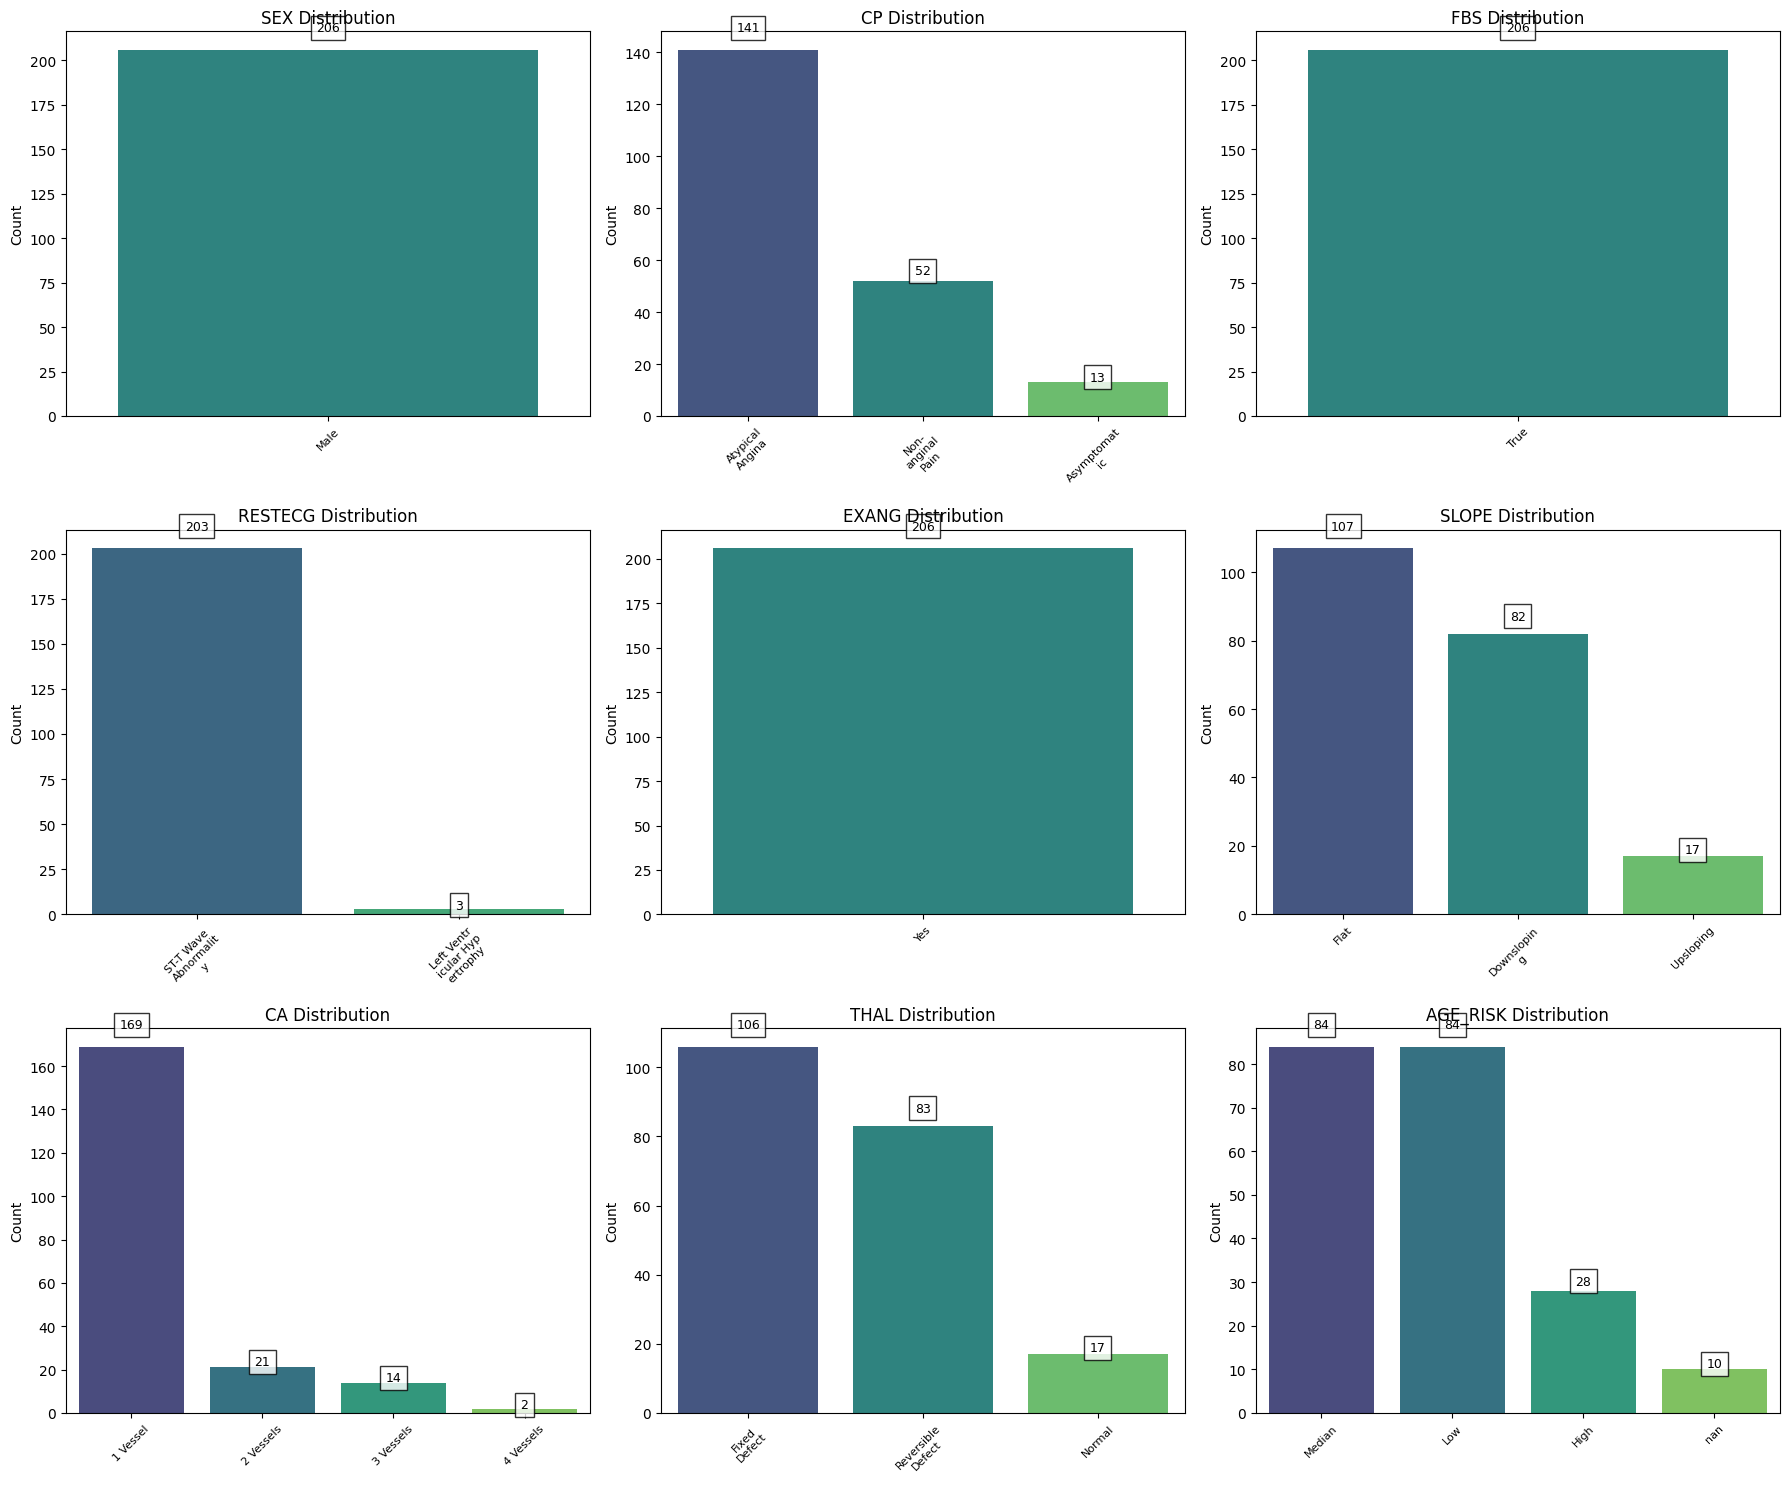

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

def decode_onehot_columns(df, nominal_cols):
    df_decoded = df.copy()
    for col in nominal_cols:
        encoded_cols = [c for c in df.columns if c.startswith(f"{col}_")]
        if encoded_cols:
            df_decoded[col] = (
                df[encoded_cols]
                .idxmax(axis=1)
                .str.replace(f"{col}_", "")
                .astype(float)
                .astype(int)
            )
            df_decoded.drop(columns=encoded_cols, inplace=True)
    return df_decoded

df = pd.read_csv('/content/processed_val.csv')
df = decode_onehot_columns(df, nominal_cols=["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"])


df.info()
print("\n% of missing values per column")
print(df.isnull().sum() / df.shape[0] * 100)
print("\nDetailed missing values (Row numbers): ")
for column in df.columns:
    missing_rows = df[df[column].isnull()].index.tolist()
    if missing_rows:
        raw_numbers = [row + 1 for row in missing_rows]
        print(f"{column} -> Missing Raw Numbers: {raw_numbers}, Total: {len(raw_numbers)}")

numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "cardiac_load", "st_angina_index"]

df_display = df.copy()

plt.figure(figsize = (15, 10))

for i, col in enumerate(numerical_columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.grid(True, linestyle='--', alpha=0.7)

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  median = df[col].median()
  min_val = df[col].min()
  max_val = df[col].max()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  num_outliers = outliers.count()

  stats_text = (f"Median: {median:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\n"f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nOutliers: {num_outliers}")
  plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

category_mappings = {
    "sex": {1: "Male", 0: "Female"},
    "cp": {0: "Typical\nAngina", 1: "Atypical\nAngina", 2: "Non-anginal\nPain", 3: "Asymptomatic"},
    "fbs": {1: "True", 0: "False"},
    "restecg": {0: "Normal", 1: "ST-T Wave\nAbnormality", 2: "Left Ventricular\nHypertrophy"},
    "exang": {1: "Yes", 0: "No"},
    "slope": {0: "Upsloping", 1: "Flat", 2: "Downsloping"},
    "ca": {0: "0 Vessels", 1: "1 Vessel", 2: "2 Vessels", 3: "3 Vessels", 4: "4 Vessels"},
    "thal": {0: "No", 1: "Normal", 2: "Fixed\nDefect", 3: "Reversible\nDefect"},
    "target": {1: "Disease", 0: "No Disease"},
    "age_risk": {1: "Low", 2: "Median", 3: "High", 4: "Very High"}
}

df_display = df.copy()
for col, mapping in category_mappings.items():
    if col in df_display.columns:
        df_display[col] = df_display[col].map(mapping)

cat_cols = [col for col in category_mappings if col != "target"]
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = df_display[col].value_counts(dropna=False)

    labels = ['\n'.join(wrap(str(label), 10)) for label in counts.index]

    sns.barplot(x=labels, y=counts.values, ax=ax, hue=labels, palette="viridis", legend=False)
    ax.set_title(f"{col.upper()} Distribution", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', labelsize=8, rotation=45)

    for j, v in enumerate(counts.values):
        ax.text(j, v + 0.05*v, str(v), ha='center',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8))

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              206 non-null    float64
 1   trestbps         206 non-null    float64
 2   chol             206 non-null    float64
 3   thalach          206 non-null    float64
 4   oldpeak          206 non-null    float64
 5   cardiac_load     206 non-null    float64
 6   st_angina_index  206 non-null    float64
 7   age_risk         206 non-null    float64
 8   slope            206 non-null    float64
 9   target           206 non-null    float64
 10  sex              206 non-null    int64  
 11  cp               206 non-null    int64  
 12  fbs              206 non-null    int64  
 13  restecg          206 non-null    int64  
 14  exang            206 non-null    int64  
 15  ca               206 non-null    int64  
 16  thal             206 non-null    int64  
dtypes: float64(10), 

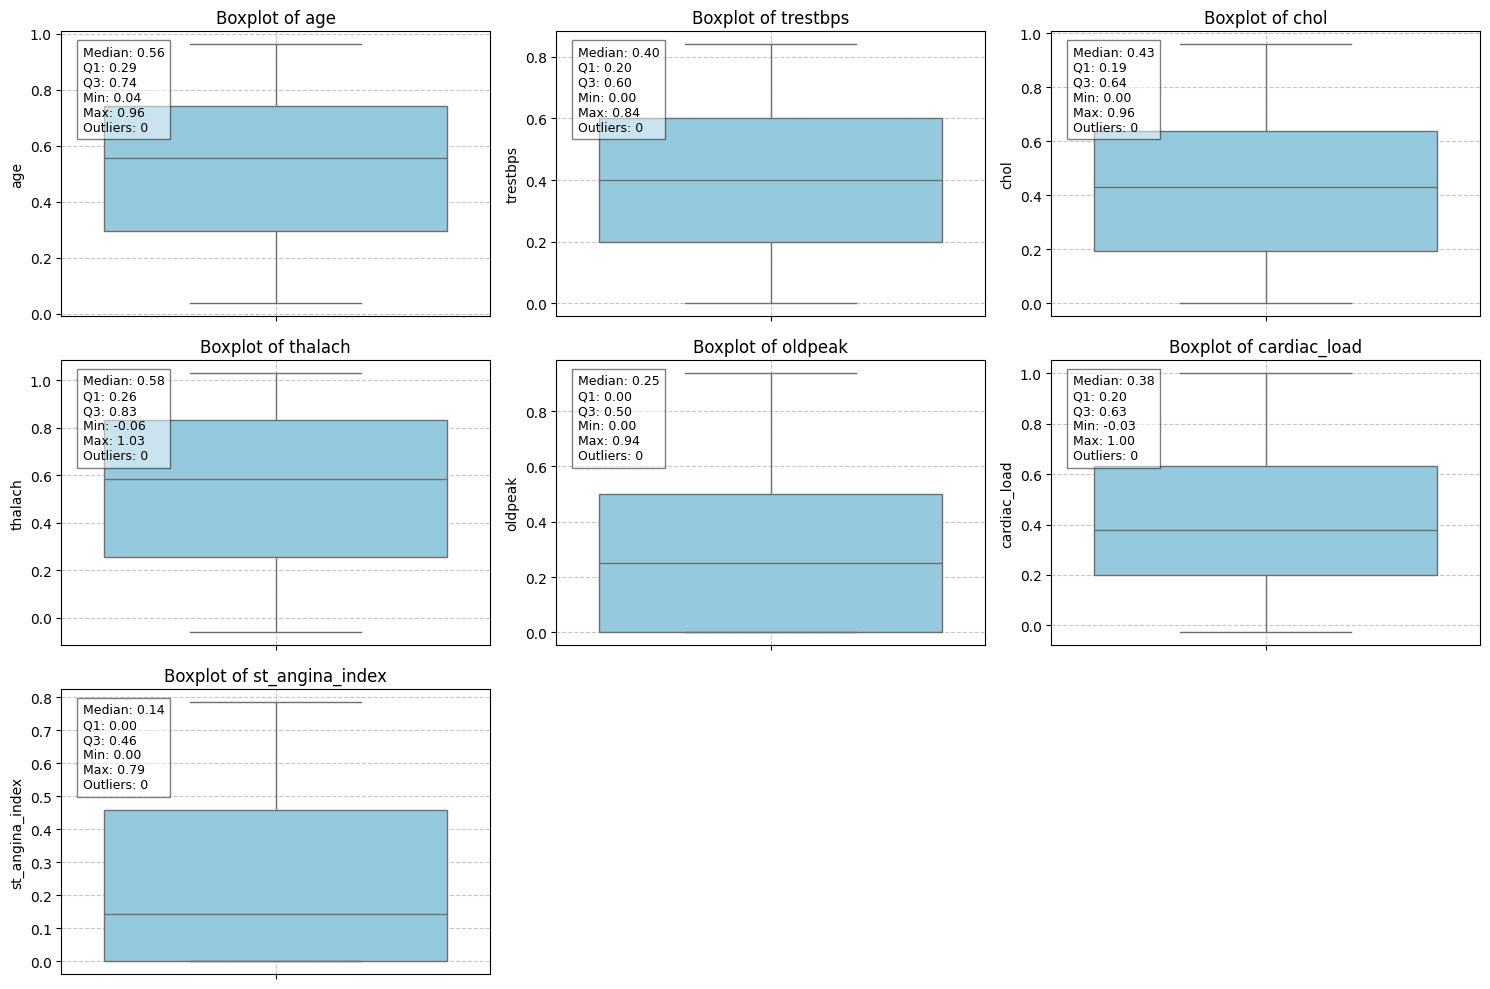

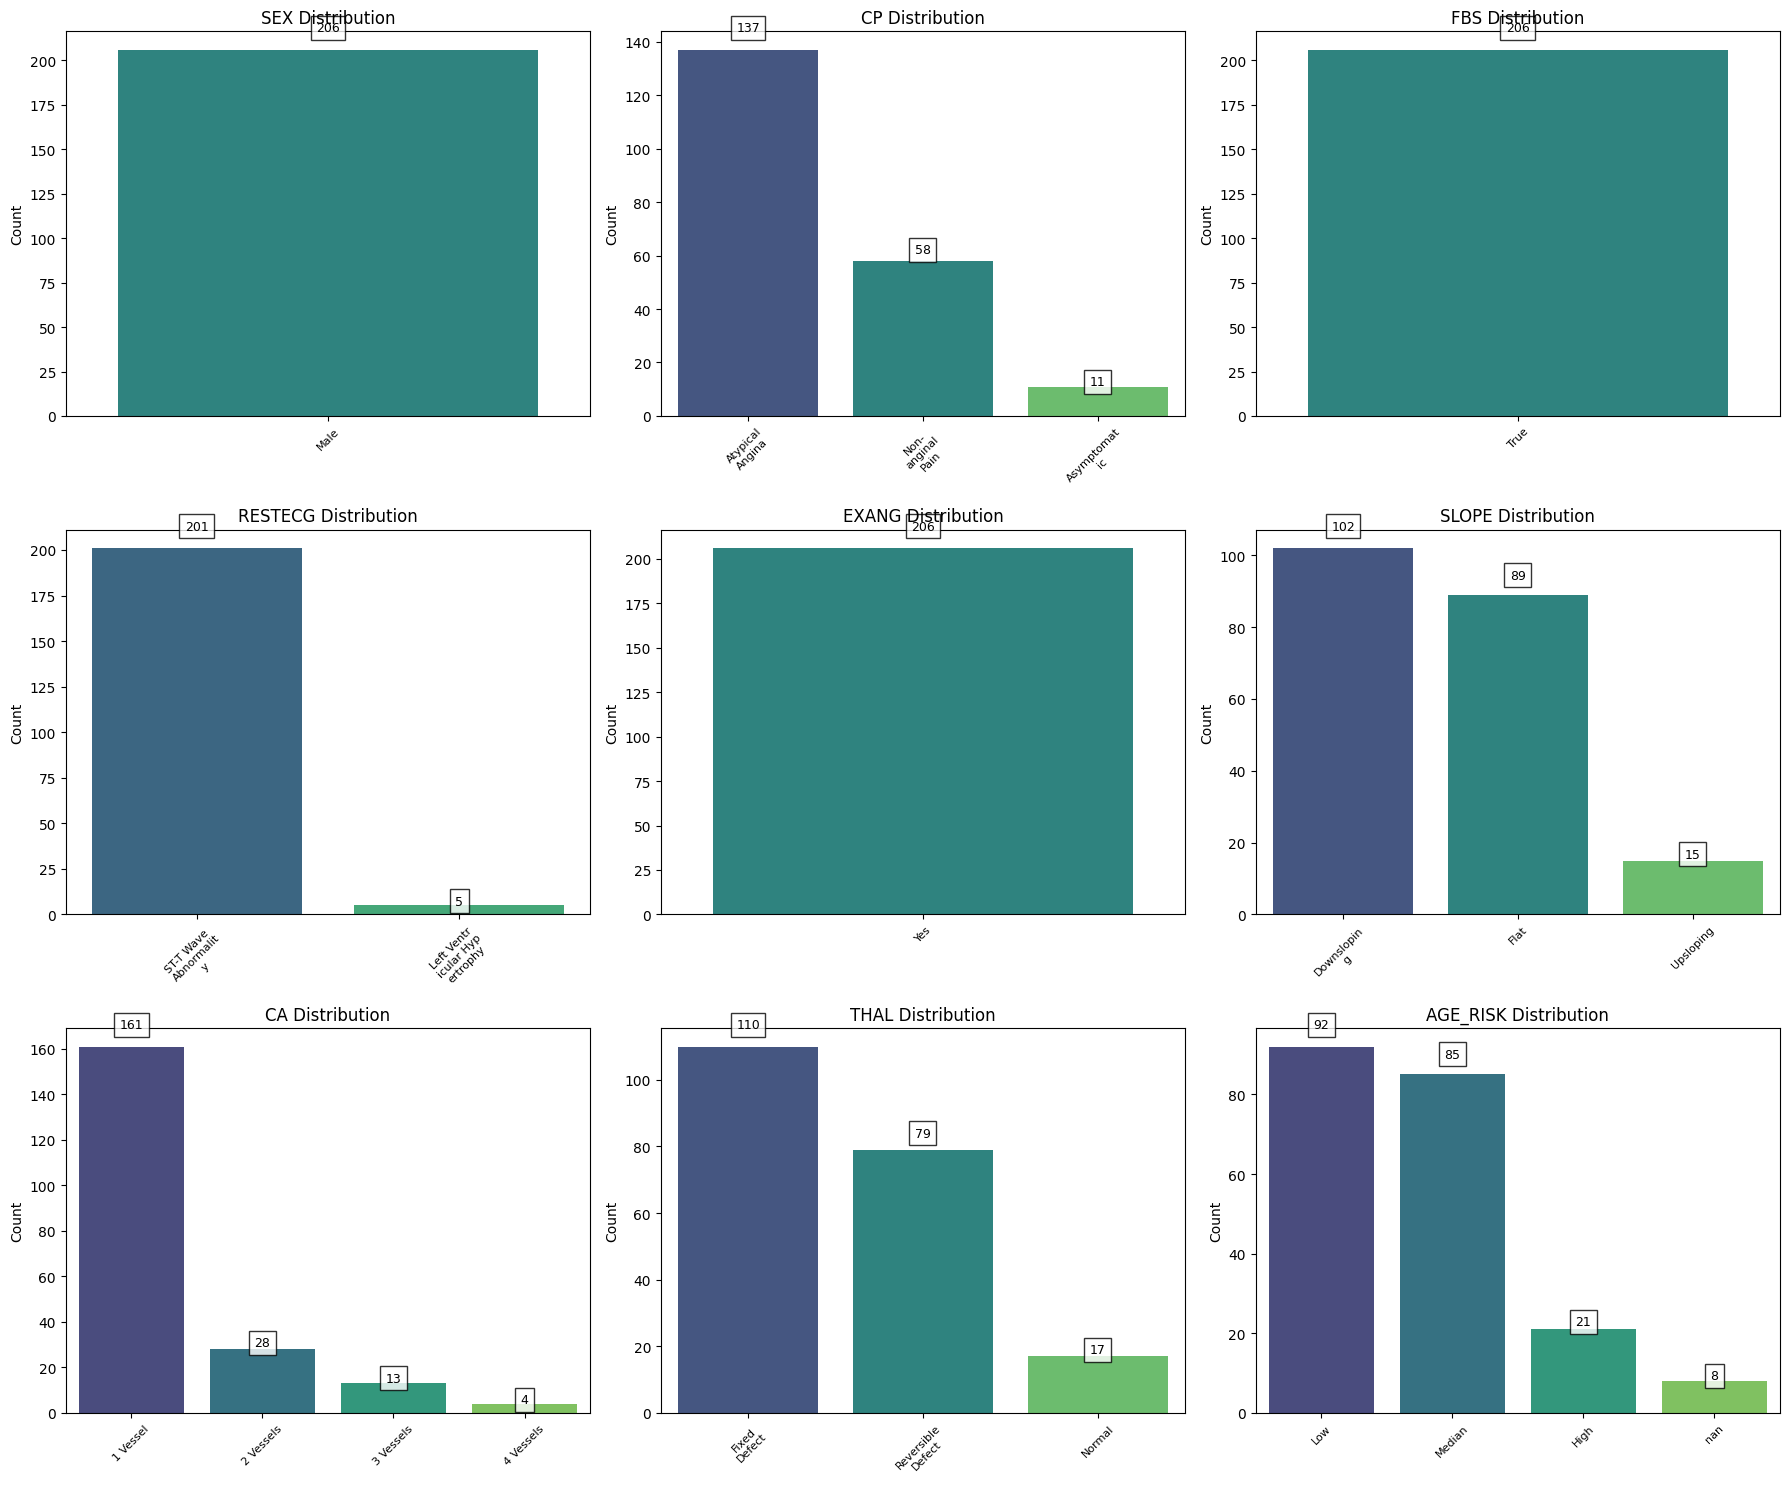

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

def decode_onehot_columns(df, nominal_cols):
    df_decoded = df.copy()
    for col in nominal_cols:
        encoded_cols = [c for c in df.columns if c.startswith(f"{col}_")]
        if encoded_cols:
            df_decoded[col] = (
                df[encoded_cols]
                .idxmax(axis=1)
                .str.replace(f"{col}_", "")
                .astype(float)
                .astype(int)
            )
            df_decoded.drop(columns=encoded_cols, inplace=True)
    return df_decoded

df = pd.read_csv('/content/processed_test.csv')
df = decode_onehot_columns(df, nominal_cols=["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"])


df.info()
print("\n% of missing values per column")
print(df.isnull().sum() / df.shape[0] * 100)
print("\nDetailed missing values (Row numbers): ")
for column in df.columns:
    missing_rows = df[df[column].isnull()].index.tolist()
    if missing_rows:
        raw_numbers = [row + 1 for row in missing_rows]
        print(f"{column} -> Missing Raw Numbers: {raw_numbers}, Total: {len(raw_numbers)}")

numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "cardiac_load", "st_angina_index"]

df_display = df.copy()

plt.figure(figsize = (15, 10))

for i, col in enumerate(numerical_columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[col], color="skyblue")
  plt.title(f"Boxplot of {col}")
  plt.grid(True, linestyle='--', alpha=0.7)

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  median = df[col].median()
  min_val = df[col].min()
  max_val = df[col].max()
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  num_outliers = outliers.count()

  stats_text = (f"Median: {median:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\n"f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nOutliers: {num_outliers}")
  plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

category_mappings = {
    "sex": {1: "Male", 0: "Female"},
    "cp": {0: "Typical\nAngina", 1: "Atypical\nAngina", 2: "Non-anginal\nPain", 3: "Asymptomatic"},
    "fbs": {1: "True", 0: "False"},
    "restecg": {0: "Normal", 1: "ST-T Wave\nAbnormality", 2: "Left Ventricular\nHypertrophy"},
    "exang": {1: "Yes", 0: "No"},
    "slope": {0: "Upsloping", 1: "Flat", 2: "Downsloping"},
    "ca": {0: "0 Vessels", 1: "1 Vessel", 2: "2 Vessels", 3: "3 Vessels", 4: "4 Vessels"},
    "thal": {0: "No", 1: "Normal", 2: "Fixed\nDefect", 3: "Reversible\nDefect"},
    "target": {1: "Disease", 0: "No Disease"},
    "age_risk": {1: "Low", 2: "Median", 3: "High", 4: "Very High"}
}

df_display = df.copy()
for col, mapping in category_mappings.items():
    if col in df_display.columns:
        df_display[col] = df_display[col].map(mapping)

cat_cols = [col for col in category_mappings if col != "target"]
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = df_display[col].value_counts(dropna=False)

    labels = ['\n'.join(wrap(str(label), 10)) for label in counts.index]

    sns.barplot(x=labels, y=counts.values, ax=ax, hue=labels, palette="viridis", legend=False)
    ax.set_title(f"{col.upper()} Distribution", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', labelsize=8, rotation=45)

    for j, v in enumerate(counts.values):
        ax.text(j, v + 0.05*v, str(v), ha='center',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8))

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# #已经完成的 refined 1a

# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer, SimpleImputer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from scipy.stats.mstats import winsorize

# #Differentiate categorical features
# ordinal_cols = ["age_risk", "slope"] #Ordered categorical variables (Order is important)
# nominal_cols = ["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"] #Unordered categorical variables （Order is not important)

# #Replace the extreme values of the top 7% and bottom 7% of the data with more reasonable values
# def winsorize_outliers(data):
#     return np.apply_along_axis(lambda x: winsorize(x, limits=(0.07, 0.07)), 0, data)

# def get_scaler(X_train, numerical_cols):
#     return StandardScaler() if abs(X_train[numerical_cols].skew()).mean() < 0.5 else MinMaxScaler()

# def preprocess_data(input_file, output_file, preprocessor=None, fit=True):
#     df = pd.read_csv(input_file)
#     y = df["target"]
#     X = df.drop(columns=["target"])

#     numerical_cols = [col for col in X.columns if col not in ordinal_cols + nominal_cols]

#     if fit:  # Fit only on train data
#         scaler = get_scaler(X, numerical_cols)
#         numerical_pipeline = Pipeline([
#             ("imputer", KNNImputer(n_neighbors=5)),
#             ("winsorizer", FunctionTransformer(winsorize_outliers, validate=False)),
#             ("scaler", scaler)
#         ])
#         ordinal_pipeline = Pipeline([
#             ("imputer", SimpleImputer(strategy="most_frequent")),
#             ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
#         ])

#         nominal_pipeline = Pipeline([
#             ("imputer", SimpleImputer(strategy="most_frequent")),
#             ("to_int", FunctionTransformer(lambda x: x.astype(int))),
#             ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
#         ])
#         preprocessor = ColumnTransformer([
#             ("num", numerical_pipeline, numerical_cols),
#             ("ord", ordinal_pipeline, ordinal_cols),
#             ("nom", nominal_pipeline, nominal_cols)
#         ], remainder='passthrough')
#         X_processed = preprocessor.fit_transform(X)  # Fit & transform train data
#     else:
#         X_processed = preprocessor.transform(X)  # Only transform val/test

#     # Keep column names consistent
#     feature_names = numerical_cols + ordinal_cols + [f"{col}_{int(cat)}" for col, cats in zip(nominal_cols, preprocessor.named_transformers_['nom'].named_steps['encoder'].categories_) for cat in cats]

#     processed_df = pd.DataFrame(X_processed, columns=feature_names)
#     processed_df["target"] = y.values
#     processed_df.to_csv(output_file, index=False)

#     print(f"{output_file} Done")
#     return preprocessor if fit else None

# # First fit on train, then transform val/test using the same preprocessor
# preprocessor = preprocess_data('/content/heart_train.csv', 'processed_train.csv', fit=True)
# preprocess_data('/content/heart_val.csv', 'processed_val.csv', preprocessor, fit=False)
# preprocess_data('/content/heart_test.csv', 'processed_test.csv', preprocessor, fit=False)


In [ ]:
# 已经完成 refine 2

import pandas as pd
import numpy as np
import joblib
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats.mstats import winsorize

# Differentiate categorical features
ordinal_cols = ["age_risk", "slope"]  # Ordered categorical variables (Order is important)
nominal_cols = ["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"]  # Unordered categorical variables (Order is not important)

# Replace the extreme values of the top 7% and bottom 7% of the data with more reasonable values
def winsorize_outliers(data, lower_limit=0.07, upper_limit=0.07):
    return np.apply_along_axis(lambda x: winsorize(x, limits=(lower_limit, upper_limit)), 0, data)

def get_scaler(X_train, numerical_cols):
    return StandardScaler() if abs(X_train[numerical_cols].skew()).mean() < 0.5 else MinMaxScaler()

def preprocess_data(input_file, output_file, preprocessor=None, fit=True):
    df = pd.read_csv(input_file)
    y = df["target"]
    X = df.drop(columns=["target"])

    numerical_cols = [col for col in X.columns if col not in ordinal_cols + nominal_cols]

    if fit:  # Fit only on train data
        scaler = get_scaler(X, numerical_cols)
        numerical_pipeline = Pipeline([
            ("imputer", KNNImputer(n_neighbors=5)),
            ("winsorizer", FunctionTransformer(winsorize_outliers, validate=False)),
            ("scaler", scaler)
        ])
        ordinal_pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
        ])
        nominal_pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='first')) # Avoid multicollinearity
        ])
        preprocessor = ColumnTransformer([
            ("num", numerical_pipeline, numerical_cols),
            ("ord", ordinal_pipeline, ordinal_cols),
            ("nom", nominal_pipeline, nominal_cols)
        ], remainder='passthrough')
        X_processed = preprocessor.fit_transform(X)  # Fit & transform train data
    else:
        X_processed = preprocessor.transform(X)  # Only transform val/test

    # Keep column names consistent
    feature_names = numerical_cols + ordinal_cols + [f"{col}_{cat}" for col, cats in zip(nominal_cols, preprocessor.named_transformers_['nom'].named_steps['encoder'].categories_) for cat in cats[1:]]

    processed_df = pd.DataFrame(X_processed, columns=feature_names)
    processed_df["target"] = y.values
    processed_df.to_csv(output_file, index=False)

    print(f"{output_file} Done")
    return preprocessor if fit else None

# First fit on train, then transform val/test using the same preprocessor
preprocessor = preprocess_data('/content/heart_train.csv', 'processed_train.csv', fit=True)
preprocess_data('/content/heart_val.csv', 'processed_val.csv', preprocessor, fit=False)
preprocess_data('/content/heart_test.csv', 'processed_test.csv', preprocessor, fit=False)

# save ColumnTransformer
joblib.dump(preprocessor, 'preprocessor.pkl')

processed_train.csv Done
processed_val.csv Done
processed_test.csv Done


['preprocessor.pkl']

**Stage 4: Algorithm Selection**

**Random Forest**


[Cross-validation assessment of base models]
cross-validation AUC: 0.9901 (±0.0074)

[Start trying each combination of parameters]
Fitting 3 folds for each of 36 candidates, totalling 108 fits

[Optimal parameter combination]:
{'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'selector__threshold': 0.01}

[Number of final selection features]: 20

[Evaluation of optimal model performance]

=== Training set ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       299
         1.0       1.00      1.00      1.00       316

    accuracy                           1.00       615
   macro avg       1.00      1.00      1.00       615
weighted avg       1.00      1.00      1.00       615

AUC Score: 1.0000
Confusion Matrix:
[[298   1]
 [  0 316]]


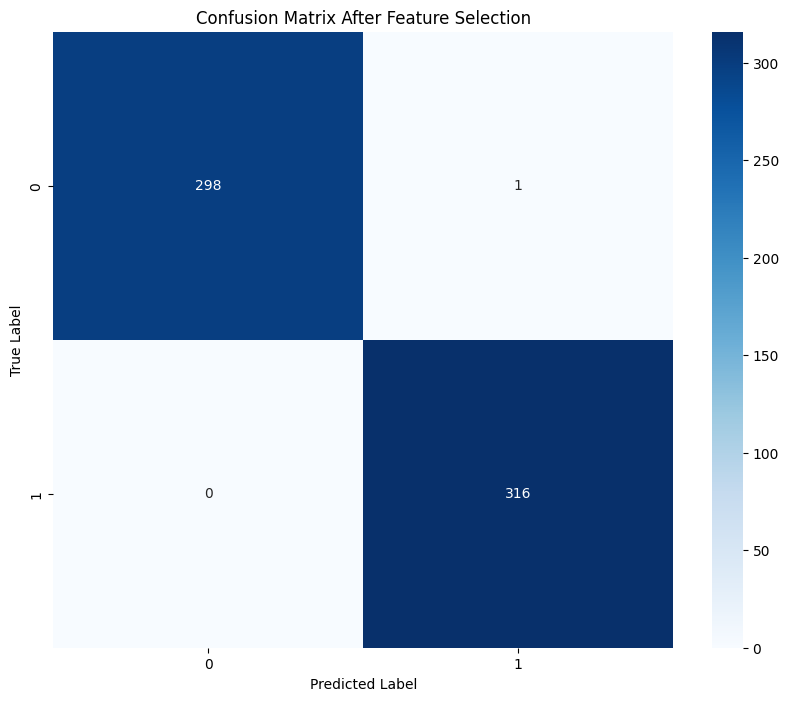


=== Validation set ===
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       100
         1.0       1.00      0.95      0.98       106

    accuracy                           0.98       206
   macro avg       0.98      0.98      0.98       206
weighted avg       0.98      0.98      0.98       206

AUC Score: 0.9975
Confusion Matrix:
[[100   0]
 [  5 101]]


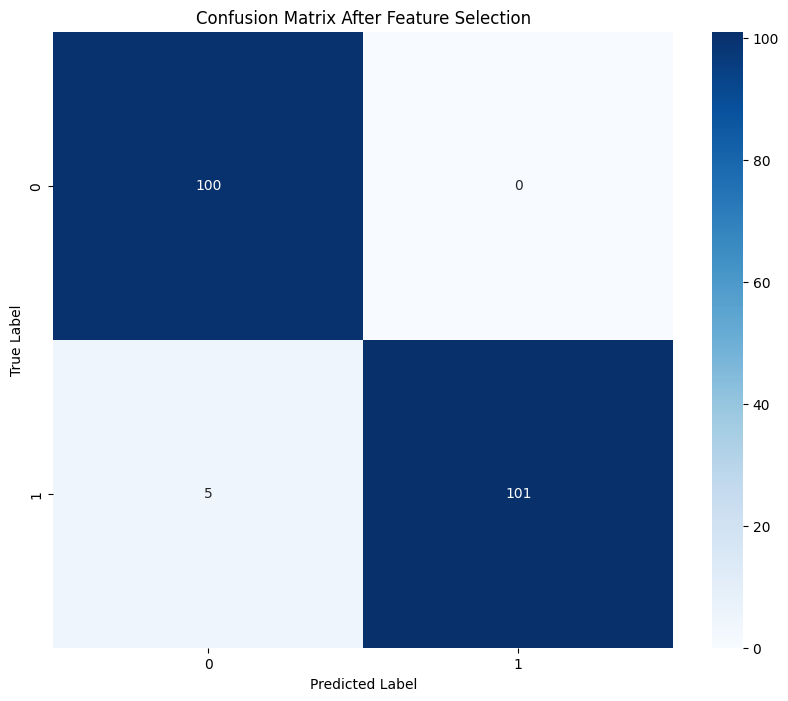


=== Test set ===
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       100
         1.0       1.00      0.96      0.98       106

    accuracy                           0.98       206
   macro avg       0.98      0.98      0.98       206
weighted avg       0.98      0.98      0.98       206

AUC Score: 0.9945
Confusion Matrix:
[[100   0]
 [  4 102]]


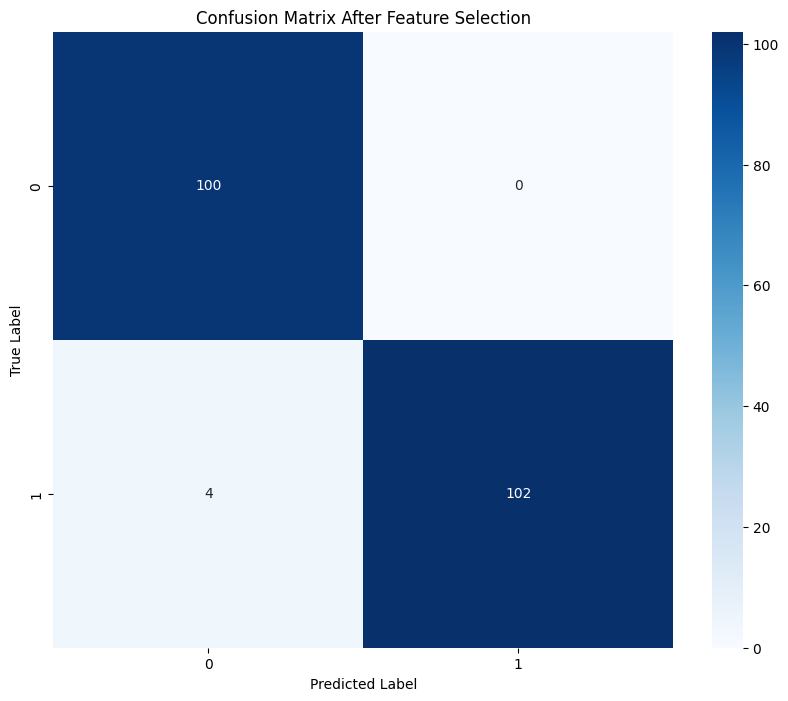


[Learning curve analysis]


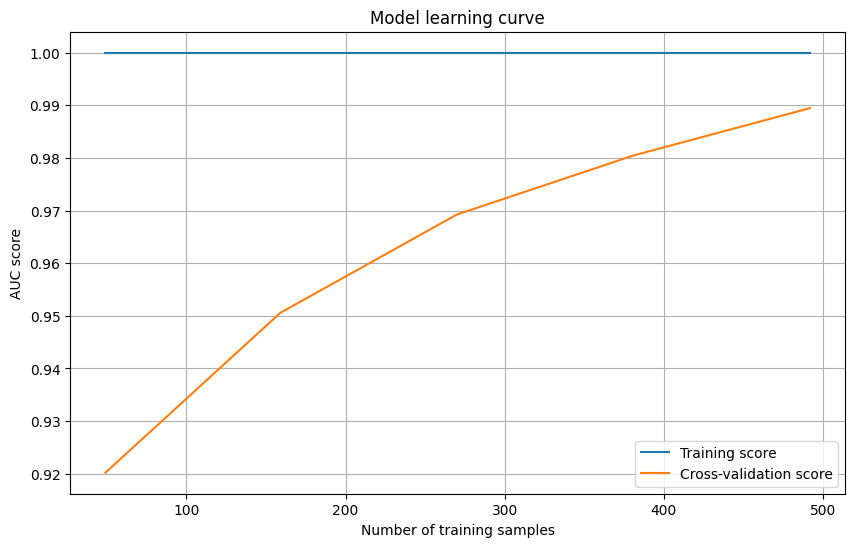

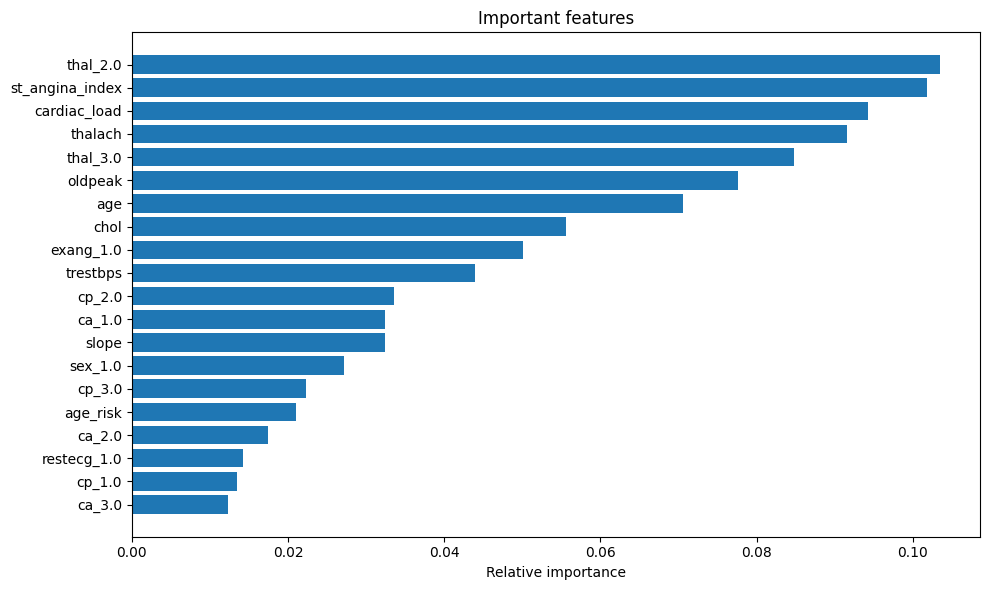

['Random_Forest_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (train_test_split, GridSearchCV, learning_curve, cross_val_score, StratifiedKFold)
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score, make_scorer)
from sklearn.utils.class_weight import compute_class_weight

np.random.seed(42)

train_df = pd.read_csv('/content/processed_train.csv')
valid_df = pd.read_csv('/content/processed_val.csv')
test_df = pd.read_csv('/content/processed_test.csv')

# separate the target and features
def prepare_data(df):
    return df.drop(columns=['target']), df['target']

x_train, y_train = prepare_data(train_df)
x_valid, y_valid = prepare_data(valid_df)
x_test, y_test = prepare_data(test_df)

# automatically calculate class weights based on label distribution
# if the dataset is imbalanced (Exp: more heart disease cases)
# this will assign higher weights to the minority class (Exp: no heart disease)
# helping the model learn more fairly
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# evaluation function
def enhanced_evaluator(model, x, y, dataset_name = "Dataset"):
    y_pred = model.predict(x)
    y_prob = model.predict_proba(x)[:, 1]
    cm = confusion_matrix(y, y_pred)
    auc = roc_auc_score(y, y_prob)

    print(f"\n=== {dataset_name} ===")
    print(classification_report(y, y_pred))
    print(f"AUC Score: {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix After Feature Selection')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# basic model training
base_model = RandomForestClassifier(class_weight=class_weight_dict,random_state=42)

# cross-validation (k = 5)
# use to evaluate the stability and generalization ability of the base model on the training set
print("\n[Cross-validation assessment of base models]")
cv_scores = cross_val_score(
    estimator=base_model,
    X=x_train,
    y=y_train,
    cv=5,
    scoring = 'roc_auc'
)
print(f"cross-validation AUC: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

# select the important features
# use median as default threshold to prevent too many feature to be deleted
feature_selector = Pipeline([
    ('selector', SelectFromModel(RandomForestClassifier(class_weight=class_weight_dict, random_state = 42), threshold="median")),
    ('classifier', RandomForestClassifier(class_weight=class_weight_dict, random_state=42))
])

# automatically select the best hyperparameters
param_grid = {
    'selector__threshold': ['mean', 'median', 0.01],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=feature_selector,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

print("\n[Start trying each combination of parameters]")
grid_search.fit(x_train, y_train)

print("\n[Optimal parameter combination]:")
print(grid_search.best_params_)

# optimal model evaluation
best_model = grid_search.best_estimator_

# get selected features
selected_features = x_train.columns[best_model.named_steps['selector'].get_support()]
print(f"\n[Number of final selection features]: {len(selected_features)}")

# evaluating the best model
print("\n[Evaluation of optimal model performance]")
_ = enhanced_evaluator(best_model, x_train, y_train, "Training set")
_ = enhanced_evaluator(best_model, x_valid, y_valid, "Validation set")
_ = enhanced_evaluator(best_model, x_test, y_test, "Test set")

# use learning curve to see whether the model has overfitting or underfitting
def plot_learning_curve(estimator, title, X, y, cv=5):
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,
        scoring='roc_auc', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score")

    plt.title(title)
    plt.xlabel("Number of training samples")
    plt.ylabel("AUC score")
    plt.legend()
    plt.grid()
    plt.show()

print("\n[Learning curve analysis]")
plot_learning_curve(best_model, "Model learning curve", x_train[selected_features], y_train)

# tell us what features are most valued in a well-trained model
# tell us which features have the greatest impact on the model's judgemental results
importances = best_model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[-len(importances):]

plt.figure(figsize=(10, 6))
plt.title("Important features")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), selected_features[indices])
plt.xlabel("Relative importance")
plt.tight_layout()
plt.show()

# save the random forest model
joblib.dump(best_model, 'Random_Forest_model.pkl')

**SVM**


Training Baseline SVM (Linear)

=== Baseline SVM (Linear) - Train ===
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88       299
         1.0       0.87      0.91      0.89       316

    accuracy                           0.88       615
   macro avg       0.88      0.88      0.88       615
weighted avg       0.88      0.88      0.88       615



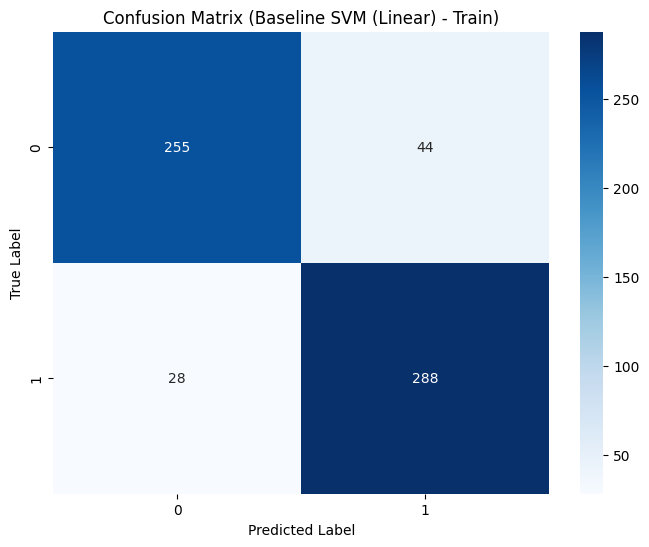


=== Baseline SVM (Linear) - Valid ===
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       100
         1.0       0.84      0.89      0.86       106

    accuracy                           0.85       206
   macro avg       0.86      0.85      0.85       206
weighted avg       0.86      0.85      0.85       206



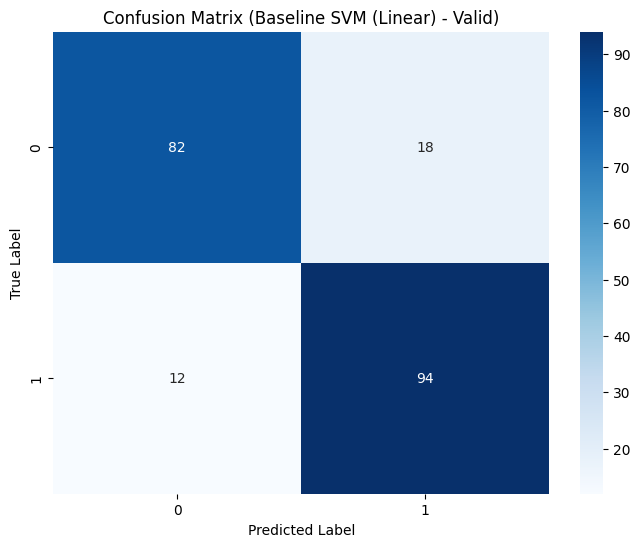


=== Baseline SVM (Linear) - Test ===
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83       100
         1.0       0.82      0.89      0.85       106

    accuracy                           0.84       206
   macro avg       0.85      0.84      0.84       206
weighted avg       0.85      0.84      0.84       206



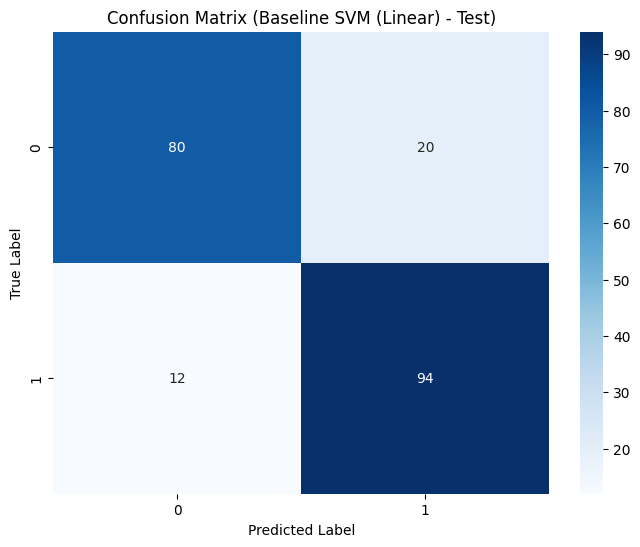


Training SelectKBest + Linear SVM

=== SelectKBest + Linear SVM - Train ===
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       299
         1.0       0.87      0.89      0.88       316

    accuracy                           0.87       615
   macro avg       0.87      0.87      0.87       615
weighted avg       0.87      0.87      0.87       615



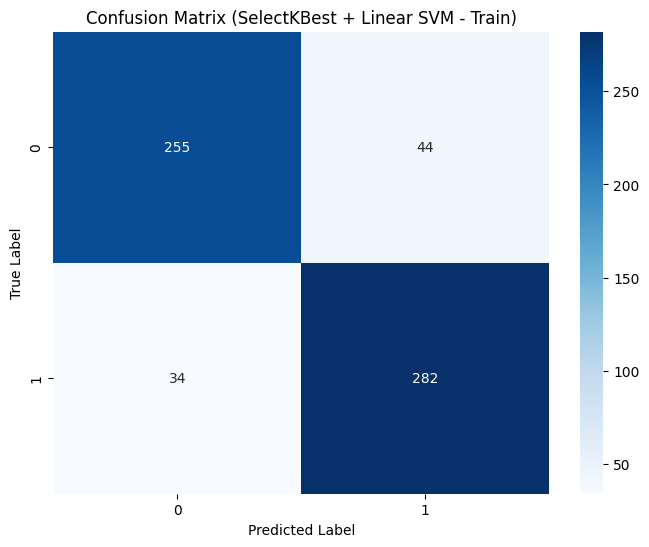


=== SelectKBest + Linear SVM - Valid ===
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       100
         1.0       0.83      0.86      0.85       106

    accuracy                           0.84       206
   macro avg       0.84      0.84      0.84       206
weighted avg       0.84      0.84      0.84       206



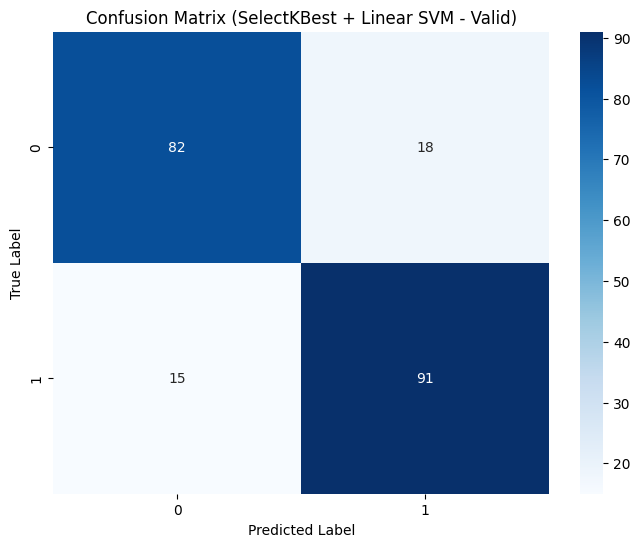


=== SelectKBest + Linear SVM - Test ===
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       100
         1.0       0.83      0.89      0.86       106

    accuracy                           0.85       206
   macro avg       0.85      0.85      0.85       206
weighted avg       0.85      0.85      0.85       206



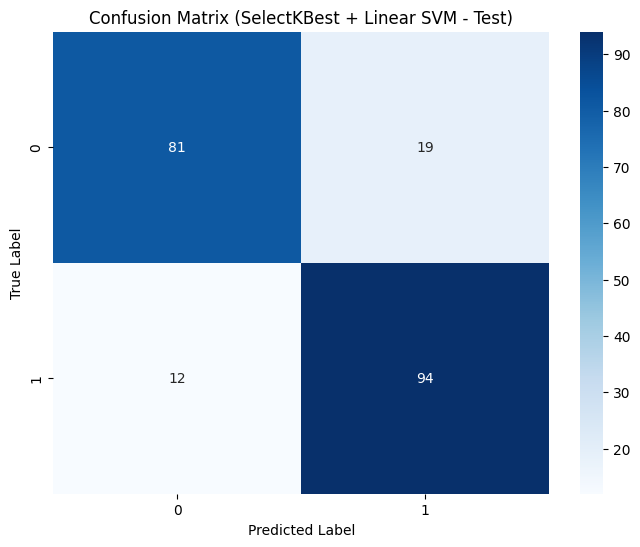


Training PCA + Linear SVM

=== PCA + Linear SVM - Train ===
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       299
         1.0       0.84      0.87      0.86       316

    accuracy                           0.85       615
   macro avg       0.85      0.85      0.85       615
weighted avg       0.85      0.85      0.85       615



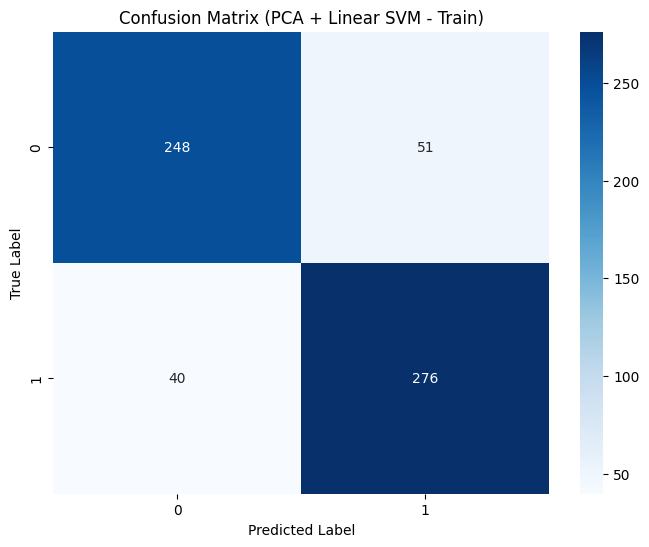


=== PCA + Linear SVM - Valid ===
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       100
         1.0       0.81      0.86      0.83       106

    accuracy                           0.83       206
   macro avg       0.83      0.82      0.82       206
weighted avg       0.83      0.83      0.82       206



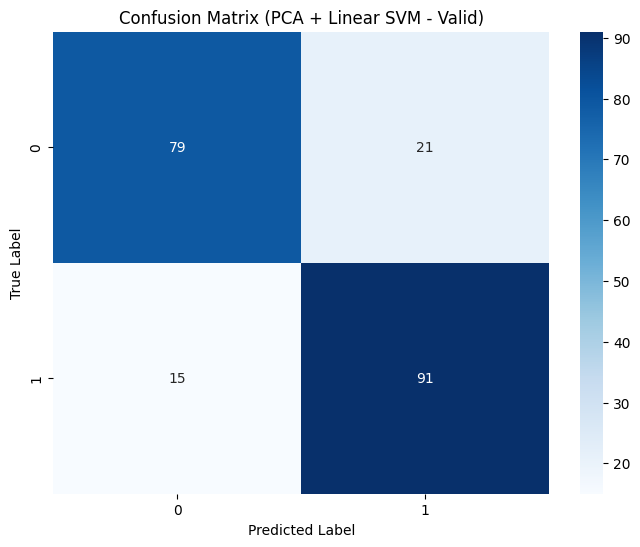


=== PCA + Linear SVM - Test ===
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       100
         1.0       0.82      0.85      0.83       106

    accuracy                           0.83       206
   macro avg       0.83      0.82      0.82       206
weighted avg       0.83      0.83      0.83       206



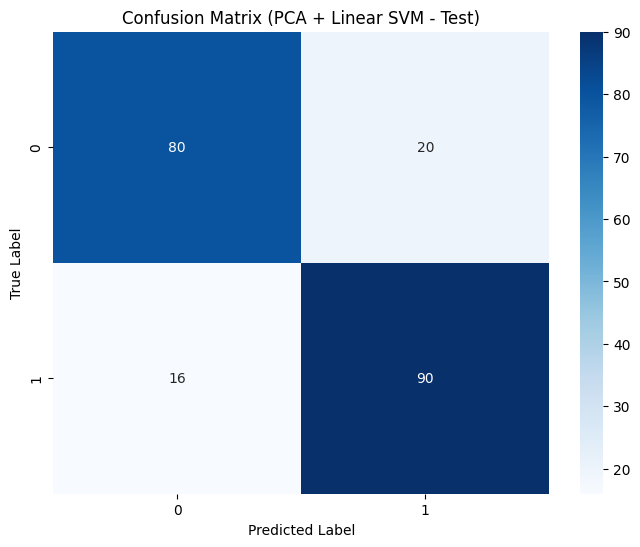


Training SelectKBest + RBF SVM
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'svm__C': 100, 'svm__gamma': 'auto'}

=== SelectKBest + RBF SVM - Train ===
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       299
         1.0       0.95      0.99      0.97       316

    accuracy                           0.97       615
   macro avg       0.97      0.97      0.97       615
weighted avg       0.97      0.97      0.97       615



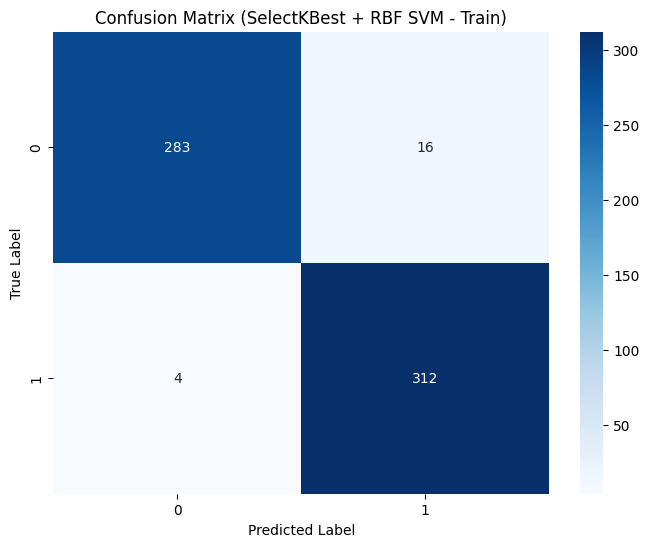


=== SelectKBest + RBF SVM - Valid ===
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       100
         1.0       0.92      0.92      0.92       106

    accuracy                           0.92       206
   macro avg       0.92      0.92      0.92       206
weighted avg       0.92      0.92      0.92       206



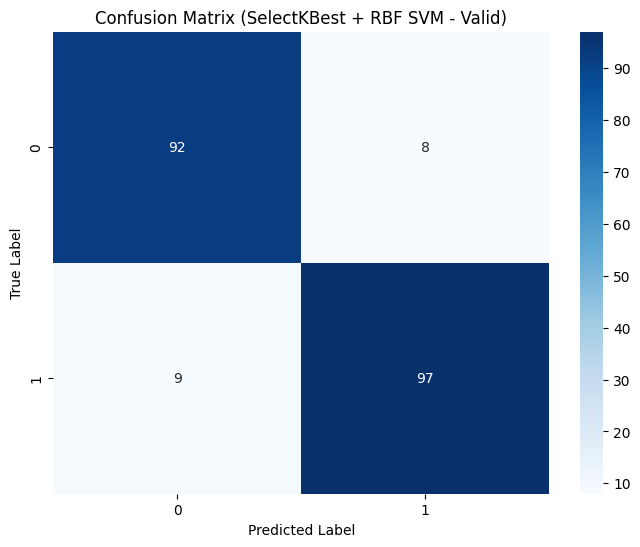


=== SelectKBest + RBF SVM - Test ===
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       100
         1.0       0.91      0.90      0.90       106

    accuracy                           0.90       206
   macro avg       0.90      0.90      0.90       206
weighted avg       0.90      0.90      0.90       206



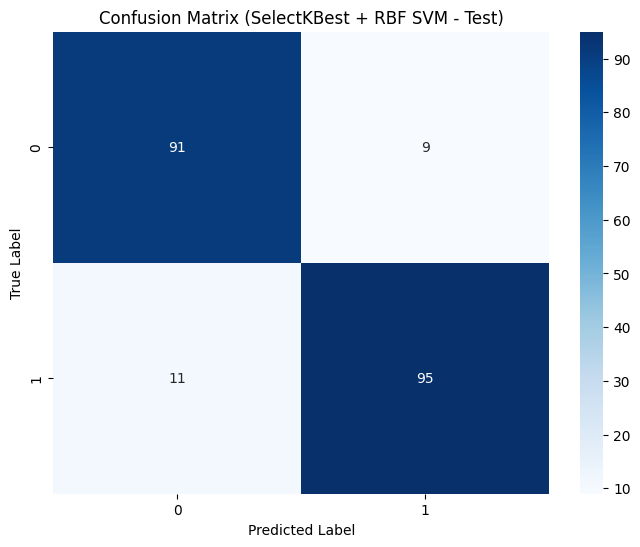


Training PCA + RBF SVM
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'svm__C': 100, 'svm__gamma': 'scale'}

=== PCA + RBF SVM - Train ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       299
         1.0       1.00      1.00      1.00       316

    accuracy                           1.00       615
   macro avg       1.00      1.00      1.00       615
weighted avg       1.00      1.00      1.00       615



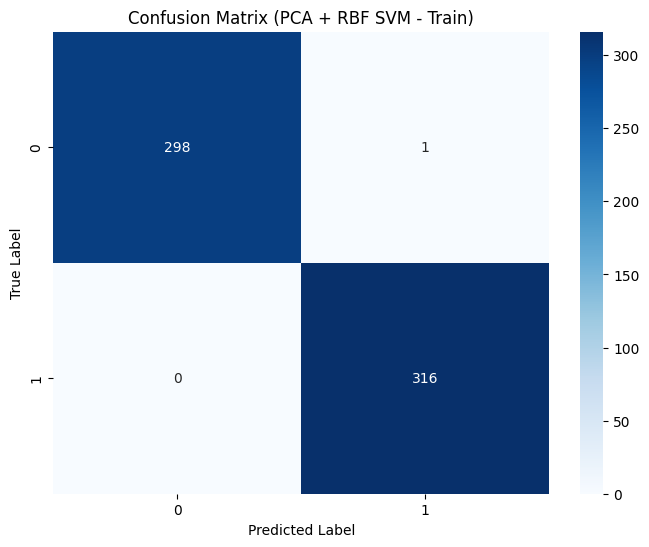


=== PCA + RBF SVM - Valid ===
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       100
         1.0       1.00      0.98      0.99       106

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



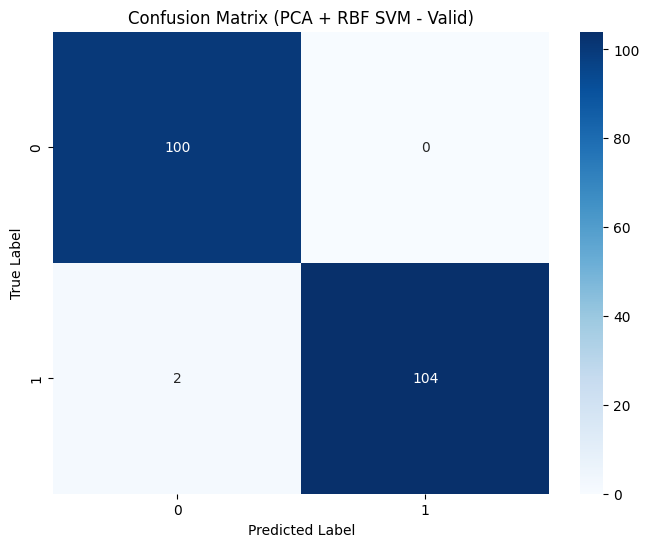


=== PCA + RBF SVM - Test ===
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       100
         1.0       1.00      0.93      0.97       106

    accuracy                           0.97       206
   macro avg       0.97      0.97      0.97       206
weighted avg       0.97      0.97      0.97       206



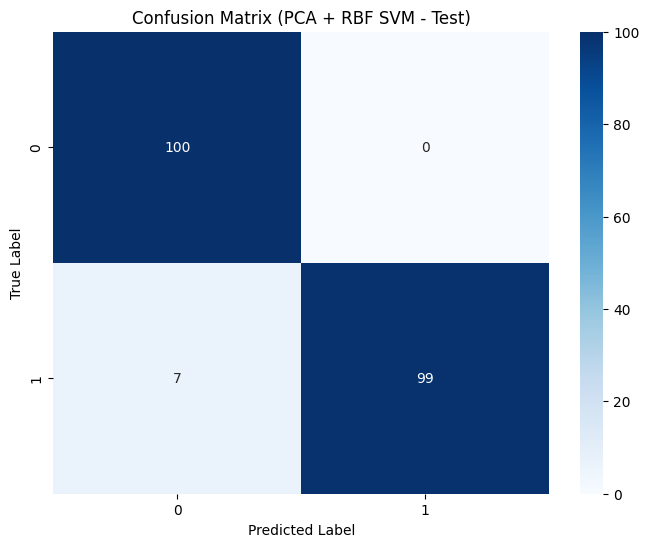

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

def load_data():
    train_df = pd.read_csv('/content/processed_train.csv')
    valid_df = pd.read_csv('/content/processed_val.csv')
    test_df = pd.read_csv('/content/processed_test.csv')
    return train_df, valid_df, test_df

def prepare_data(df):
    return df.drop(columns=['target']), df['target']

# use to evaluate models
def evaluate_model(model, X, y, name="Dataset"):
    print(f"\n=== {name} ===")
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({name})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def main():
    train_df, valid_df, test_df = load_data()
    x_train, y_train = prepare_data(train_df)
    x_valid, y_valid = prepare_data(valid_df)
    x_test, y_test = prepare_data(test_df)

    # select important features
    # Prevents overfitting
    # reduces dimensionality
    k = int(len(x_train.columns) * 0.9)

    # define different combination (5 combinations)
    # find the optimal combination
    models = {
        'Baseline SVM (Linear)': SVC(kernel='linear'),
        'SelectKBest + Linear SVM': Pipeline([
            ('selector', SelectKBest(f_classif, k=k)),
            ('svm', SVC(kernel='linear'))
        ]),
        'PCA + Linear SVM': Pipeline([
            ('pca', PCA(n_components=0.9)),
            ('svm', SVC(kernel='linear'))
        ]),
        'SelectKBest + RBF SVM': Pipeline([
            ('selector', SelectKBest(f_classif, k=k)),
            ('svm', SVC(kernel='rbf'))
        ]),
        'PCA + RBF SVM': Pipeline([
            ('pca', PCA(n_components=0.9)),
            ('svm', SVC(kernel='rbf'))
        ])
    }

    # automatically select the best hyperparameters
    param_grids = {
        'SelectKBest + RBF SVM': {'svm__C': [0.1, 1, 10, 100], 'svm__gamma': ['scale', 'auto']},
        'PCA + RBF SVM': {'svm__C': [0.1, 1, 10, 100], 'svm__gamma': ['scale', 'auto']}
    }

    #  training, tuning, evaluating models
    best_models = {}
    for name, model in models.items():
        print(f"\n{'='*30}\nTraining {name}\n{'='*30}")

        if name in param_grids:
            grid = GridSearchCV(model, param_grids[name], cv=3, verbose=3, n_jobs=-1)
            grid.fit(x_train, y_train)
            best_model = grid.best_estimator_
            print(f"Best parameters: {grid.best_params_}")
        else:
            model.fit(x_train, y_train)
            best_model = model

        # evaluate how well the model's performance on 3 datasets
        for dataset, X, y in [('Train', x_train, y_train),
                            ('Valid', x_valid, y_valid),
                            ('Test', x_test, y_test)]:
            evaluate_model(best_model, X, y, f"{name} - {dataset}")

        best_models[name] = best_model

    # save models
    joblib.dump(best_models['PCA + RBF SVM'], 'PCA_RBF_SVM.pkl')
    joblib.dump(best_models['SelectKBest + RBF SVM'], 'SelectKBest_RBF_SVM.pkl')

if __name__ == "__main__":
    main()

**Naive Bayes**

Best features value(k) = 19
Accuracy in Validating dataset = 0.8301
Best features list: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cardiac_load', 'st_angina_index', 'age_risk', 'slope', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'fbs_1.0', 'exang_1.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_2.0', 'thal_3.0']


Training dataset Accuracy: 0.8293
Precision: 0.8307
Recall: 0.8386
F1 Score: 0.8346
Log Loss: 1.0082

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       299
         1.0       0.83      0.84      0.83       316

    accuracy                           0.83       615
   macro avg       0.83      0.83      0.83       615
weighted avg       0.83      0.83      0.83       615


Confusion Matrix:
[[245  54]
 [ 51 265]]


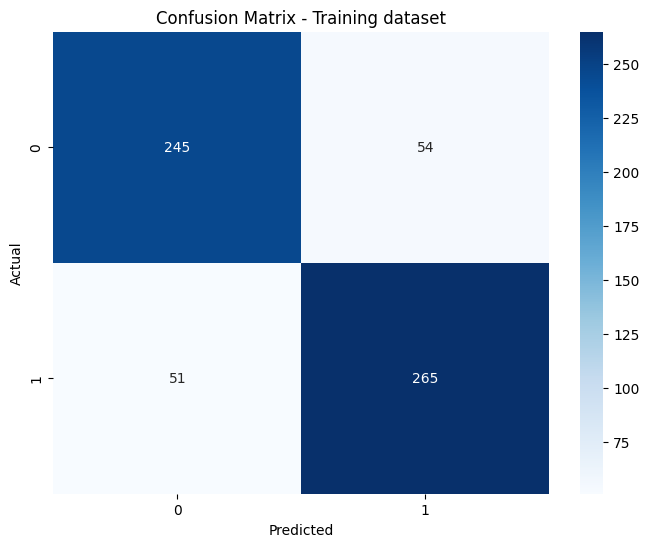

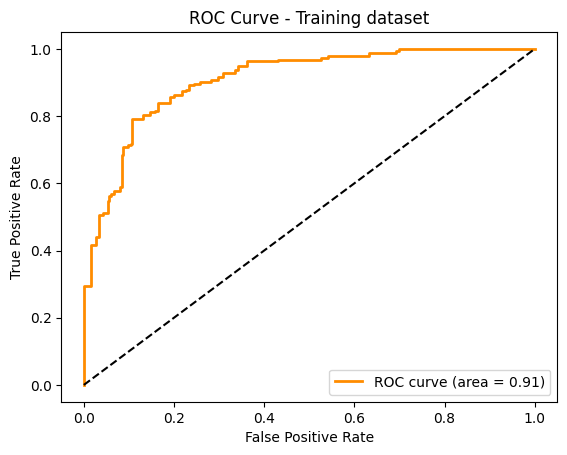



Validating dataset Accuracy: 0.8301
Precision: 0.8381
Recall: 0.8302
F1 Score: 0.8341
Log Loss: 1.1104

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       100
         1.0       0.84      0.83      0.83       106

    accuracy                           0.83       206
   macro avg       0.83      0.83      0.83       206
weighted avg       0.83      0.83      0.83       206


Confusion Matrix:
[[83 17]
 [18 88]]


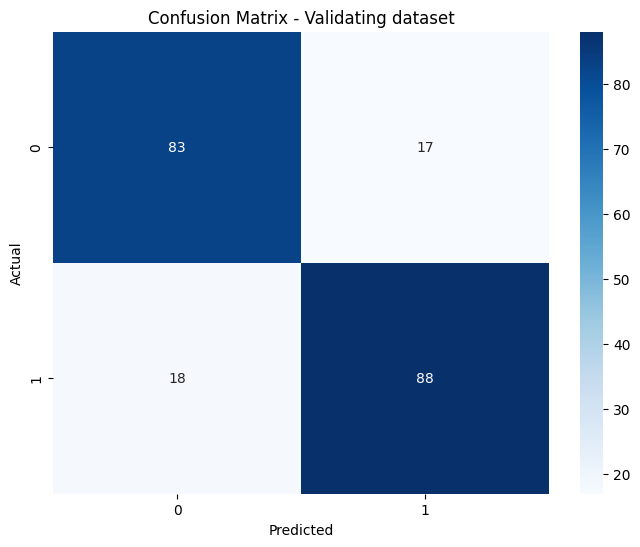

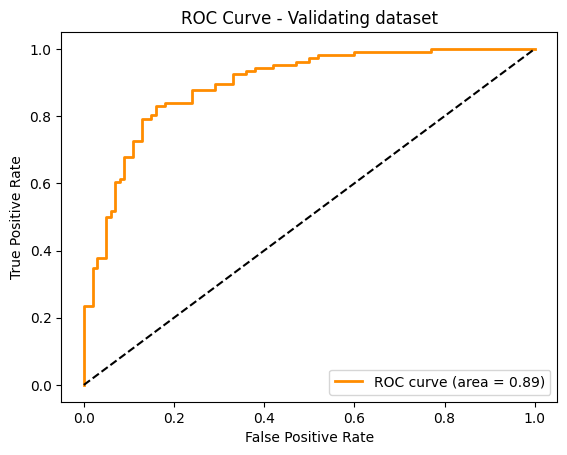



Testing dataset Accuracy: 0.8301
Precision: 0.8381
Recall: 0.8302
F1 Score: 0.8341
Log Loss: 1.0546

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       100
         1.0       0.84      0.83      0.83       106

    accuracy                           0.83       206
   macro avg       0.83      0.83      0.83       206
weighted avg       0.83      0.83      0.83       206


Confusion Matrix:
[[83 17]
 [18 88]]


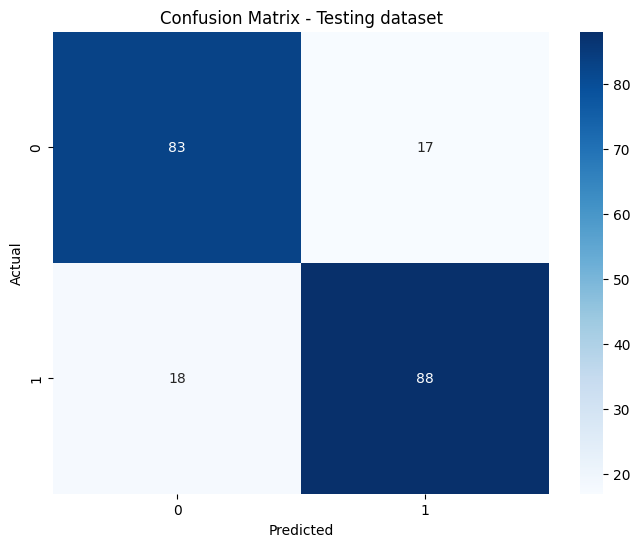

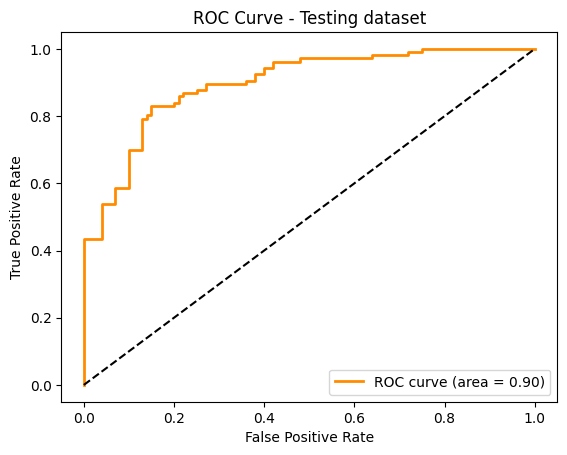

['Naive_Bayes_Model.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

#Load Training, validating & testing dataset & preprocessed
train_df = pd.read_csv('/content/processed_train.csv')
valid_df = pd.read_csv('/content/processed_val.csv')
test_df = pd.read_csv('/content/processed_test.csv')

X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

x_valid = valid_df.drop(columns=['target'])
y_valid = valid_df['target']

x_test = test_df.drop(columns=['target'])
y_test = test_df['target']

#Finding out important features using mutual information
best_k = 0
best_acc = 0
best_features = None

mutual_info_classif(X_train, y_train, random_state=101)

for k in range(5, len(X_train.columns) + 1):
  selector = SelectKBest(score_func=mutual_info_classif, k=k)
  selector.fit(X_train, y_train)
  selected_columns = X_train.columns[selector.get_support()]

#Use validating dataset accuracy for choosing the best features value of K
  bestK_model = GaussianNB()
  bestK_model.fit(X_train[selected_columns], y_train)
  y_pred = bestK_model.predict(x_valid[selected_columns])

  acc = accuracy_score(y_valid, y_pred)

  if acc > best_acc:
        best_acc = acc
        best_k = k
        best_features = selected_columns

print(f"Best features value(k) = {best_k}")
print(f"Accuracy in Validating dataset = {best_acc:.4f}")
print(f"Best features list: {list(best_features)}")

#Use the best features that selected by mutual informationn to build & training Naive Bayes model
model = GaussianNB()
model.fit(X_train[best_features], y_train)

#Define the model in the Training, Validating & Testing dataset
def evaluate_NBModel(name, X, y):
    y_pred = model.predict(X[best_features])
    y_proba = model.predict_proba(X[best_features])

    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    logloss = log_loss(y, y_proba)

    print(f"\n\n{name} Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")

    #Classification report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    #Confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #ROC Curve
    if len(np.unique(y)) == 2:
        fpr, tpr, _ = roc_curve(y, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()


evaluate_NBModel("Training dataset", X_train, y_train)
evaluate_NBModel("Validating dataset", x_valid, y_valid)
evaluate_NBModel("Testing dataset", x_test, y_test)

model_package ={
    'model': model,
    'best_features': best_features
}
joblib.dump(model, 'Naive_Bayes_Model.pkl')


**Logistic Regression**

Training Dataset Accuracy: 0.8715
Precision: 0.8580
Recall: 0.8987
F1 Score: 0.8779
Log Loss: 4.6300

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       299
         1.0       0.86      0.90      0.88       316

    accuracy                           0.87       615
   macro avg       0.87      0.87      0.87       615
weighted avg       0.87      0.87      0.87       615


Confusion Matrix:
[[252  47]
 [ 32 284]]


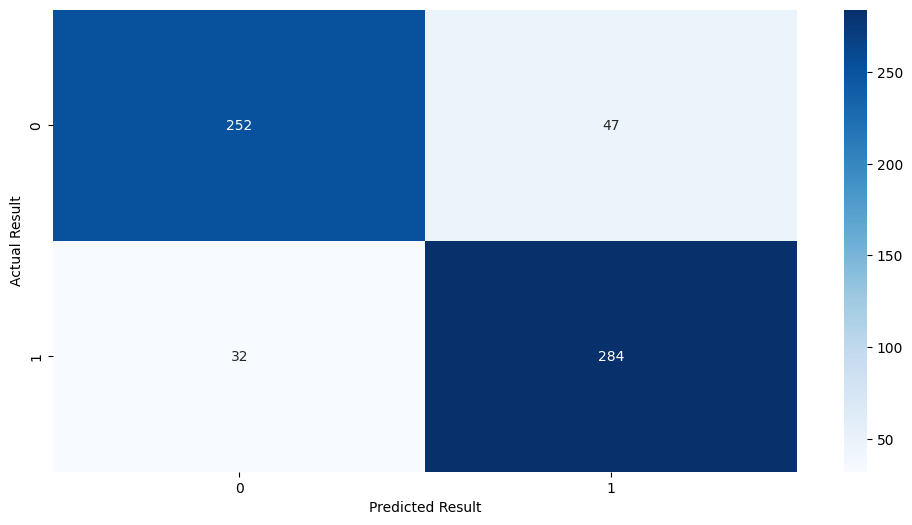

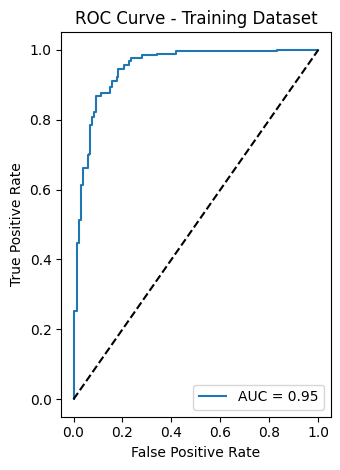

Validating Dataset Accuracy: 0.8495
Precision: 0.8319
Recall: 0.8868
F1 Score: 0.8584
Log Loss: 5.4240

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       100
         1.0       0.83      0.89      0.86       106

    accuracy                           0.85       206
   macro avg       0.85      0.85      0.85       206
weighted avg       0.85      0.85      0.85       206


Confusion Matrix:
[[81 19]
 [12 94]]


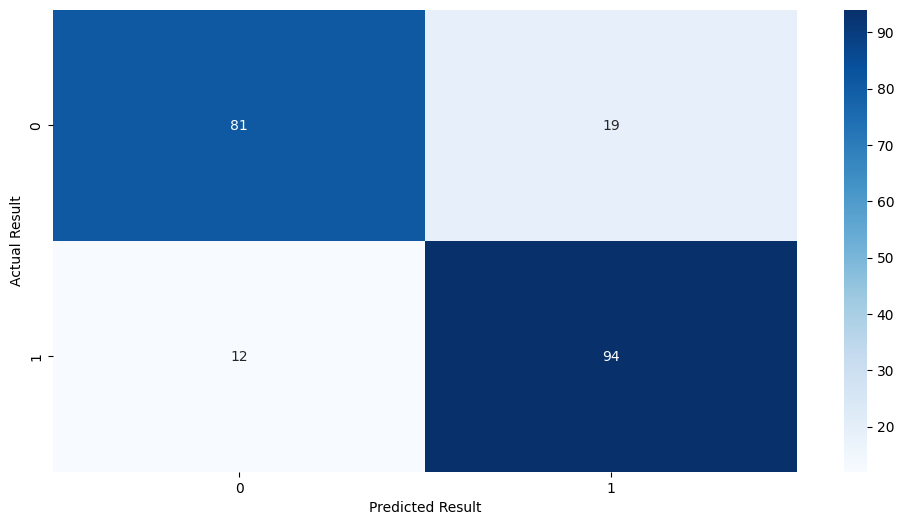

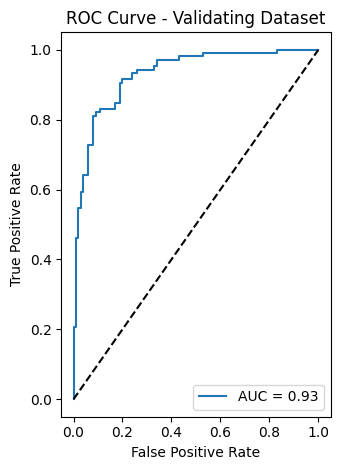

Testing Dataset Accuracy: 0.8204
Precision: 0.7949
Recall: 0.8774
F1 Score: 0.8341
Log Loss: 6.4739

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       100
         1.0       0.79      0.88      0.83       106

    accuracy                           0.82       206
   macro avg       0.82      0.82      0.82       206
weighted avg       0.82      0.82      0.82       206


Confusion Matrix:
[[76 24]
 [13 93]]


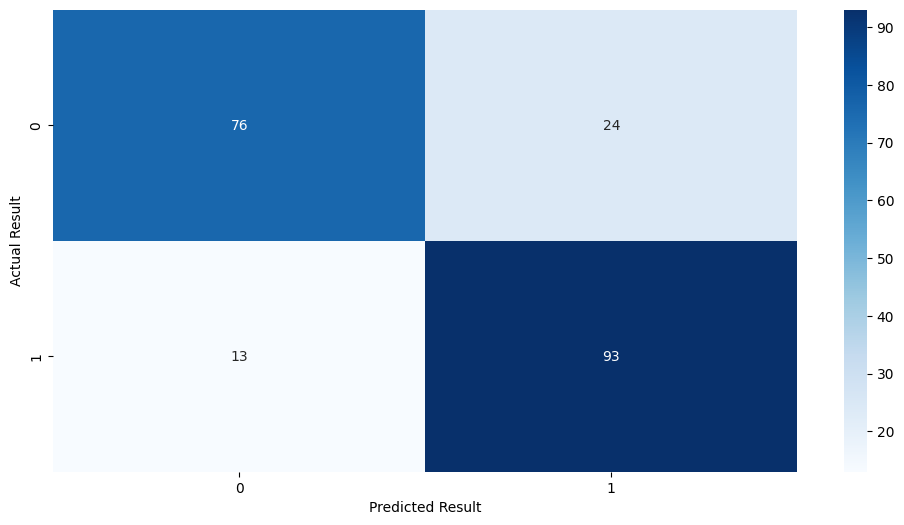

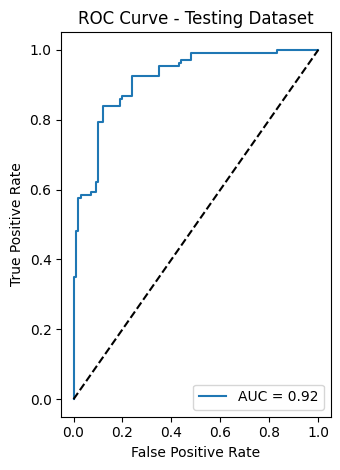


Model Coefficients Analysis:
Feature names: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cardiac_load', 'st_angina_index', 'age_risk', 'slope', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_4.0', 'thal_1.0', 'thal_2.0', 'thal_3.0']

Coefficients (log-odds): [ 0.19233251 -0.47102083 -1.02138501  1.05677999 -0.58484301 -0.71804774
 -0.78896633  0.03565167  0.50799948 -1.29476692  1.04538687  1.71098391
  1.84540027  0.23054358  0.39024647 -0.1692281  -0.64752526 -1.62358091
 -2.15523935 -1.03571317  0.84466212  0.15508468  0.97879415 -0.57562524]

Odds Ratios (e^coef): [1.21207348 0.62436457 0.36009586 2.8770918  0.55719333 0.48770345
 0.45431417 1.03629481 1.66196308 0.27396171 2.84449877 5.53440416
 6.33063326 1.25928434 1.47734486 0.84431629 0.5233393  0.19719131
 0.11587545 0.35497313 2.32719137 1.16775684 2.66124523 0.56235315]

Intercept (log-odds): 0.32739797727923653


['Logistic_Regression_Model.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, confusion_matrix, roc_curve, auc, log_loss
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

#Load Traning, validating, testing dataset and preprocessed
train_df = pd.read_csv('/content/processed_train.csv')
valid_df = pd.read_csv('/content/processed_val.csv')
test_df = pd.read_csv('/content/processed_test.csv')

X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

X_valid = valid_df.drop('target', axis=1)
y_valid = valid_df['target']

X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

#Training the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

#Define the model in the Training, Validating & Testing dataset
def evaluate_LRModel(name, X, y_true):
    plt.figure(figsize=(12, 6))
    y_predict = model.predict(X)
    y_probability = model.predict_proba(X)[:, 1]

    acc = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)
    logloss = log_loss(y_true, y_predict)

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_predict))

    #Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_predict))
    cm = confusion_matrix(y_true, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Result')
    plt.ylabel('Actual Result')
    plt.show()

    #ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_true, y_probability)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

evaluate_LRModel("Training Dataset", X_train, y_train)
evaluate_LRModel("Validating Dataset", X_valid, y_valid)
evaluate_LRModel("Testing Dataset", X_test, y_test)

#Print model coefficient
print("\nModel Coefficients Analysis:")
print("="*40)
if hasattr(X_train, 'columns'):
    print("Feature names:", list(X_train.columns))
print("\nCoefficients (log-odds):", model.coef_[0])
print("\nOdds Ratios (e^coef):", np.exp(model.coef_[0]))
print("\nIntercept (log-odds):", model.intercept_[0])

model_package = {
    "model": model,
    "feature": list(X_train.columns)
}

joblib.dump(model, 'Logistic_Regression_Model.pkl')


**Neural Network**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5189 - loss: 0.7098 - val_accuracy: 0.6359 - val_loss: 0.6424
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6901 - loss: 0.6185 - val_accuracy: 0.7476 - val_loss: 0.5710
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.5282 - val_accuracy: 0.8010 - val_loss: 0.4849
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8402 - loss: 0.4323 - val_accuracy: 0.8252 - val_loss: 0.4275
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8618 - loss: 0.3584 - val_accuracy: 0.8204 - val_loss: 0.4005
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8553 - loss: 0.3474 - val_accuracy: 0.8204 - val_loss: 0.3834
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8788 - loss: 0.3072 - val_accuracy: 0.8155 - val_loss: 0.3722
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8361 - loss: 0.3487 - val_accuracy: 0.8155 - val_loss: 0.3681
Epo

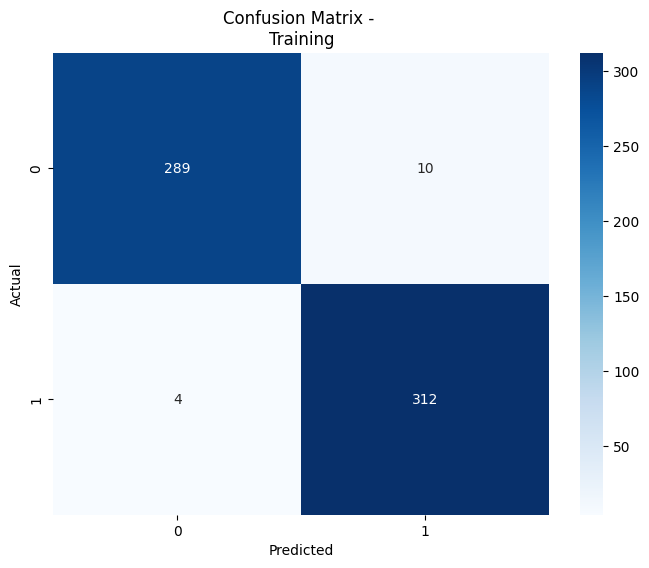

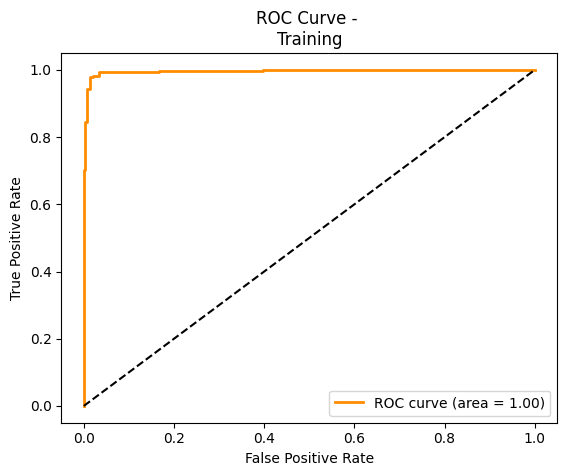

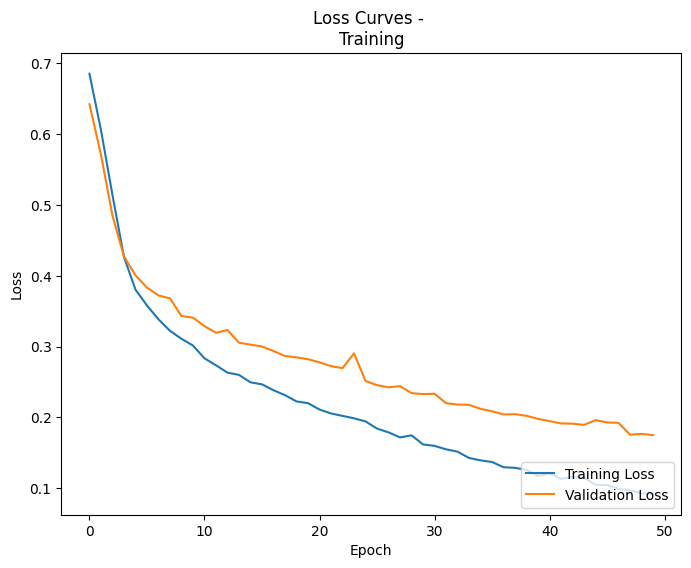

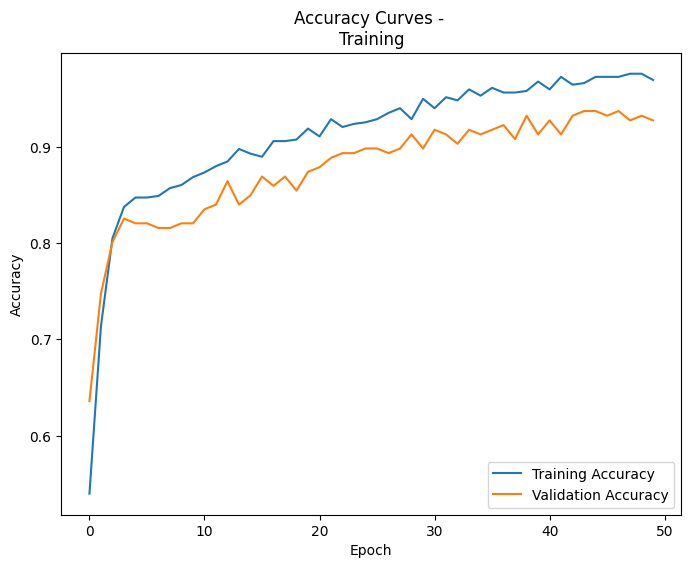

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Validation Accuracy: 0.9272
Precision: 0.9283
Recall: 0.9272
F1 Score: 0.9272
Log Loss: 0.1750

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       100
         1.0       0.95      0.91      0.93       106

    accuracy                           0.93       206
   macro avg       0.93      0.93      0.93       206
weighted avg       0.93      0.93      0.93       206


Confusion Matrix:
[[95  5]
 [10 96]]


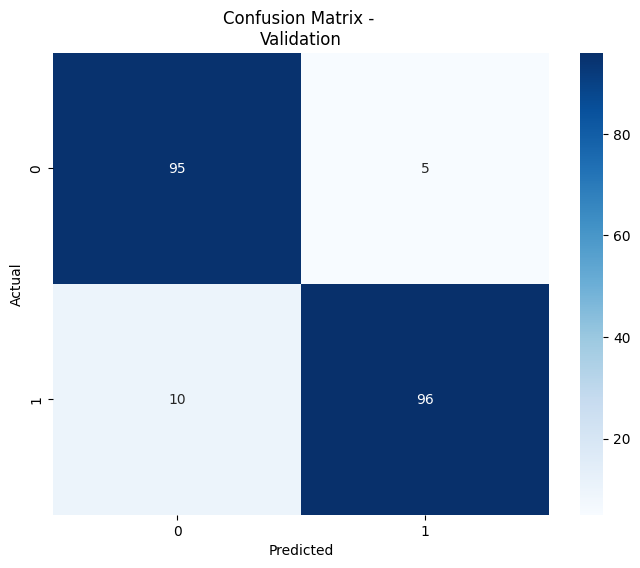

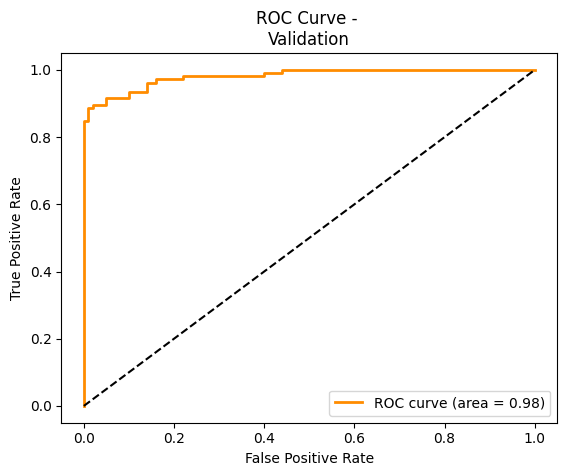

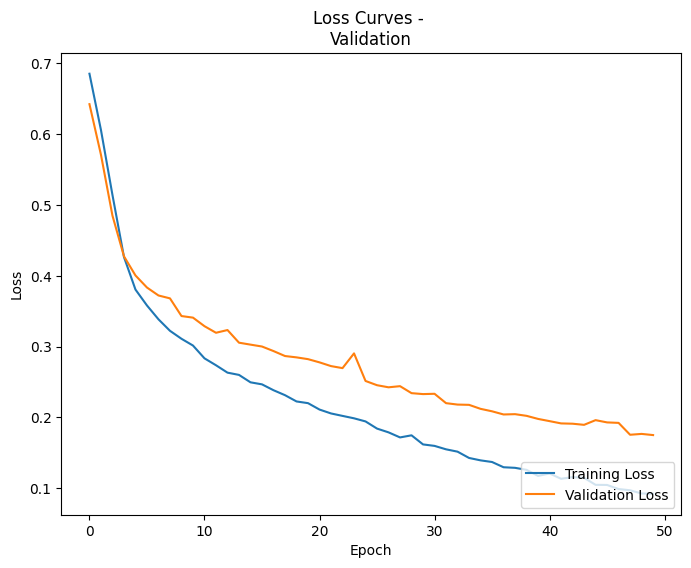

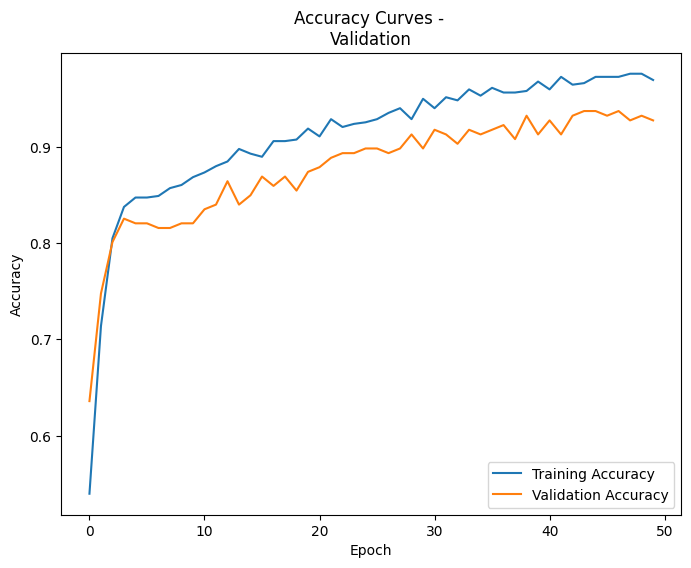

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Test Accuracy: 0.9126
Precision: 0.9128
Recall: 0.9126
F1 Score: 0.9126
Log Loss: 0.2339

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       100
         1.0       0.92      0.91      0.91       106

    accuracy                           0.91       206
   macro avg       0.91      0.91      0.91       206
weighted avg       0.91      0.91      0.91       206


Confusion Matrix:
[[92  8]
 [10 96]]


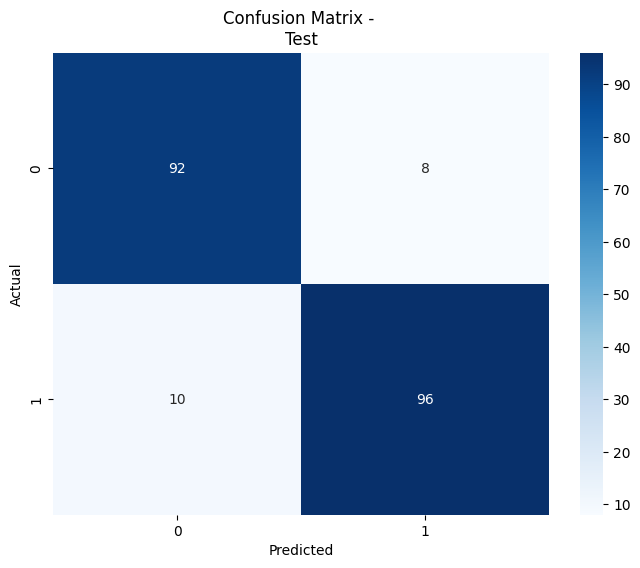

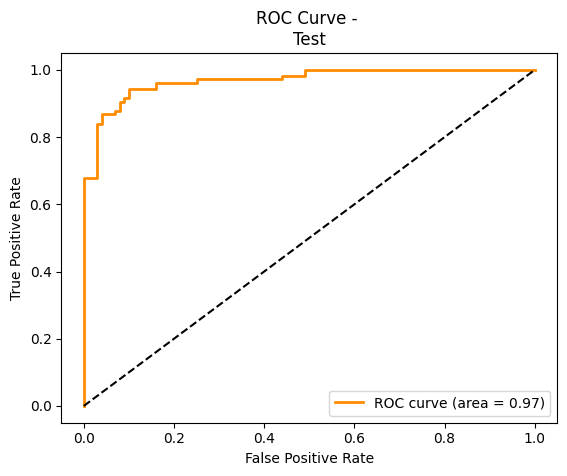

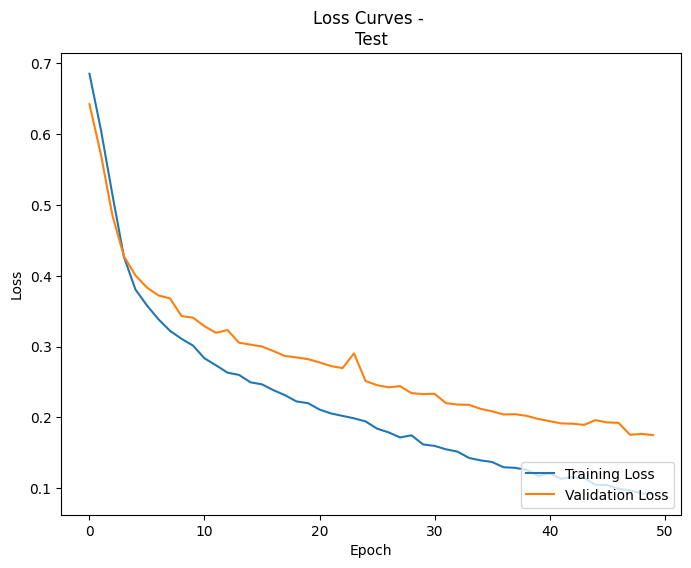

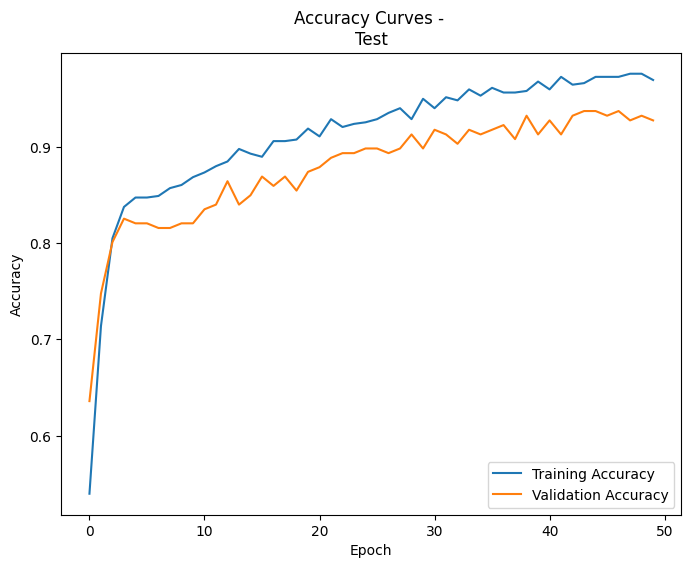

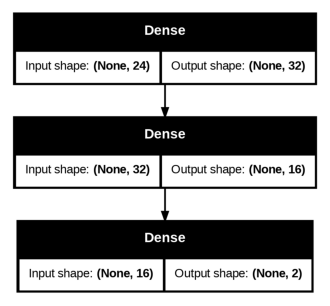

['Neural_Network_Model_Package.pkl']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from tensorflow.keras.utils import plot_model
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, confusion_matrix, roc_curve, auc, log_loss
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


#Load Training, validating & testing dataset & preprocessed
train_df = pd.read_csv('/content/processed_train.csv')
valid_df = pd.read_csv('/content/processed_val.csv')
test_df = pd.read_csv('/content/processed_test.csv')

X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_valid = valid_df.drop(columns=['target'])
y_valid = valid_df['target']

X_test = test_df.drop(columns=['target'])
y_test = test_df['target']

num_classes = len(y_train.unique())
y_train_cat = to_categorical(y_train, num_classes)
y_valid_cat = to_categorical(y_valid, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

#Build & training the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat,
          epochs=50,
          batch_size=16,
          validation_data=(X_valid, y_valid_cat))

#Define the model in the Training, Validating, & Testing dataset
def evalute_NNModel(name, X, y_true, y_cat):
  y_pred = model.predict(X)
  y_pred_cat = np.argmax(y_pred, axis=1)

  acc = accuracy_score(y_true, y_pred_cat)
  precision = precision_score(y_true, y_pred_cat, average='weighted')
  recall = recall_score(y_true, y_pred_cat, average='weighted')
  f1 = f1_score(y_true, y_pred_cat, average='weighted')
  logloss = log_loss(y_cat, y_pred)

  print(f"{name} Accuracy: {acc:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score: {f1:.4f}")
  print(f"Log Loss: {logloss:.4f}")

  #Classification report
  print("\nClassification Report:")
  print(classification_report(y_true, y_pred_cat))

  #Confusion matrix
  print("\nConfusion Matrix:")
  print(confusion_matrix(y_true, y_pred_cat))
  cm = confusion_matrix(y_true, y_pred_cat)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix - {name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  #ROC Curve
  if num_classes == 2:
    fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Loss Curves - {name}')
  plt.legend(loc='lower right')
  plt.show()

  plt.figure(figsize=(8, 6))
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(f'Accuracy Curves - {name}')
  plt.legend(loc='lower right')
  plt.show()

#Evaluate the model
evalute_NNModel("\nTraining", X_train, y_train, y_train_cat)
evalute_NNModel("\nValidation", X_valid, y_valid, y_valid_cat)
evalute_NNModel("\nTest", X_test, y_test, y_test_cat)

#Plot model architecture
plot_model(model, to_file='model.png', show_shapes=True)
img = Image.open('model.png')
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

model_package = {
    "model": model,
    "features":list(X_train.columns)
}

joblib.dump(model_package, "Neural_Network_Model_Package.pkl")


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

new_patient_data = pd.read_csv('/content/HeartNewPatients.csv')

#Create new features same as previous
new_patient_data['cardiac_load'] = new_patient_data['trestbps'] * new_patient_data['age'] / (new_patient_data['thalach'] + 1e-6)
new_patient_data['st_angina_index'] = new_patient_data['oldpeak'] * (new_patient_data['exang'] + 1)
bins = [20, 40, 55, 65, 100]
labels = ['1', '2', '3', '4']
new_patient_data['age_risk'] = pd.cut(new_patient_data['age'], bins=bins, labels=labels)

#Arrange the new features
original_cols = [col for col in new_patient_data.columns if col not in ['cardiac_load', 'st_angina_index', 'age_risk', 'target']]
new_patient_data = new_patient_data[original_cols + ['cardiac_load', 'st_angina_index', 'age_risk', 'target']]

#Save to a new file
new_patient_data.to_csv('/content/HeartNewPatients_more_features.csv', index=False)

preprocessor = joblib.load('/content/preprocessor.pkl')

new_patient_data_more_features = pd.read_csv('/content/HeartNewPatients_more_features.csv')

X_new = new_patient_data_more_features.drop(columns=['target'])
y_true = new_patient_data_more_features['target']

X_new_scaled = preprocessor.transform(X_new)

nominal_cols = ["sex", "cp", "fbs", "restecg", "exang", "ca", "thal"]
ordinal_cols = ["age_risk", "slope"]
numerical_cols = [col for col in new_patient_data_more_features.columns if col not in ordinal_cols + nominal_cols + ['target']]

feature_names = numerical_cols + ordinal_cols + [
    f"{col}_{cat}"
    for col, cats in zip(nominal_cols, preprocessor.named_transformers_['nom'].named_steps['encoder'].categories_)
    for cat in cats[1:]
]

X_new_df = pd.DataFrame(X_new_scaled, columns=feature_names)


Random_Forest_model = joblib.load('/content/Random_Forest_model.pkl')

#Print the result
y_true = new_patient_data_more_features['target']
predictions = Random_Forest_model.predict(X_new_df)
print(predictions)
accuracy = accuracy_score(y_true, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_true,predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true,predictions))
cm = confusion_matrix(y_true, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Result')
plt.ylabel('Actual Result')
plt.show()